# BUSINESS UNDERSTANDING

You can’t build a future on a dry well, yet millions of Tanzanians are forced to try. Millions of Tanzanians wake up each day unsure if the nearest well will provide safe, reliable water. Despite significant investments in rural water supply, wells; the backbone of access for much of the country, remain fragile infrastructure.

In 2025, Tanzania’s population is estimated at 70.5 million, with nearly one in three people (24–25 million) depending on wells and boreholes as their primary source of drinking water. These wells represent not just infrastructure, but lifelines for health, livelihoods, and dignity. Unfortunately, many fail within just a few years due to poor construction, lack of spare parts, environmental stress, or limited maintenance capacity.

The consequences are devastating:

* Health risks: Communities without functioning wells often turn to unsafe surface water, exposing themselves to waterborne diseases like cholera and dysentery.

* Economic loss: When wells fail, households spend time and money securing alternatives, reducing productivity and straining already limited resources.

* Education & gender equity: The burden of fetching water falls disproportionately on women and children, pulling girls out of classrooms and limiting women’s participation in economic activity.

* Wasted investment: Donor funds and government budgets spent on drilling wells are wasted if infrastructure collapses prematurely.

This challenge is not unique to Tanzania. It echoes across sub-Saharan Africa, but the scale here is stark. The Water Sector Development Program (WSDP), aligned with Sustainable Development Goal 6 (Clean Water and Sanitation), recognizes that simply drilling more wells is not enough. Sustainability is the frontier: keeping existing water points functional is as critical as expanding new access.

The guiding question becomes:

**Can we predict the operational status of a well, functional, needs repair, or non-functional, before communities are left dry?**

Framing this as a data science problem unlocks powerful opportunities:

* Proactive maintenance: Predictive insights can direct scarce technical teams to wells most at risk, preventing breakdowns before they occur.

* Smarter investments: Policymakers and NGOs can channel resources into areas where the risk of failure is highest, stretching limited budgets further.

* Community resilience: Reduced downtime means families, schools, and clinics can count on reliable access to water, improving overall well-being.

* Accountability & transparency: Data-driven decisions strengthen trust between communities, government, and development partners.

This project is more than a technical exercise. It is about ensuring that the promise of safe water lasts longer than the photo-op of a ribbon-cutting ceremony. It is about shifting the narrative from building wells to building resilience. If successful, predictive modeling can turn reactive repairs into proactive strategies, and help ensure that every drop counts toward Tanzania’s development journey.

## PROBLEM STATEMENT

Despite heavy investments in rural water infrastructure, a significant share of Tanzania’s wells are non-functional or in disrepair at any given time. This creates severe health, economic, and social burdens for the millions of people who rely on them. Traditional monitoring methods are often reactive, costly, and slow, leaving communities without reliable water for extended periods.

The challenge is to develop a predictive model that can classify the operational status of wells, functional, functional but needs repair, or non-functional. By identifying at-risk wells in advance, decision-makers can prioritize maintenance, reduce downtime, and improve the sustainability of rural water access.

This problem is fundamentally a multi-class classification task, where the goal is to use historical and environmental data about wells (e.g., location, construction type, usage, and water quality) to predict their current functionality.

## OBJECTIVES

### General Objective

To develop a data-driven framework that predicts the functionality of water wells in Tanzania, enabling proactive maintenance and sustainable water access for communities.

### Specific Objectives

* Identify the key drivers of well failures by analyzing historical, geographic, and infrastructural data.

* Build and evaluate predictive models to classify wells into three categories: functional, functional but needs repair, and non-functional.

* Generate actionable insights and visualizations that help policymakers and NGOs prioritize interventions.

* Assess the relative importance of features (e.g construction type, location, usage) to guide future data collection and infrastructure planning.

* Provide a scalable, reproducible approach that can be adapted to other regions facing similar water access challenges.

## SUCCESS METRICS

### Model Performance

* Achieve at least 75% overall accuracy in classifying well status (functional, needs repair, non-functional).

* Attain ≥75% recall on non-functional wells, ensuring at-risk communities are not overlooked.

* Reach balanced precision-recall trade-offs across all classes to avoid bias toward majority classes.

### Interpretability and Insights

* Deliver clear, interpretable feature importance rankings that explain drivers of well failure.

* Provide easy-to-understand visualizations and dashboards that policymakers, NGOs, and engineers can act upon without technical expertise.

### Practical Impact

* Enable prioritization of maintenance interventions, reducing downtime of critical wells.

* Ensure the framework is scalable and reproducible, so it can be applied to other regions or expanded with new data sources.

# DATA UNDERSTANDING

This project uses the Tanzania water wells dataset, compiled by **Taarifa** in collaboration with the **Tanzanian Ministry of Water**, and made public through the [DrivenData “Pump It Up” competition](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/). It provides detailed records of rural water points across Tanzania, making it a rich source for understanding well functionality. 

The dataset is split into three parts:  

- **Training set values.csv:** Feature data for training.  
- **Training set labels.csv:** Target labels linked to the training set.  
- **Test set values.csv:** Feature data for the test set.

Since our ultimate goal is predictive modeling, we treat these datasets differently:  

- Training data: Merged (values and labels) and used for a full exploratory deep dive. This is where we study feature distributions, relationships, and the drivers of well failure.  
- Test data: Kept separate. Only used for sanity checks (consistency of categories, ranges, and missing values) and final model evaluation. No target-based exploration is possible here. 

At this stage, we’re focusing on:  

- Dataset overview: Rows, columns, data types, and overall structure.  
- Data quality check: Missing values, outliers, and duplicates that could distort analysis.  
- Feature exploration (train only): Distributions of numeric and categorical features.  
- Target variable deep dive (train only): Breakdown of the three classes (functional, needs repair, non-functional), checking for balance or skew.  
- Initial insights: Early signals such as pump types that fail more often, or regions with higher breakdown rates.

## TRAINING DATASETS

### DATASET OVERVIEW

We first import all the necessary libraries.

In [2]:
# Utilities
import warnings
warnings.filterwarnings('ignore')

# Mathematical Operations
import numpy as np

# Data Manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# Datetime
import datetime

# Statistics & Scientific Computing
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import randint

# Machine Learning - Preprocessing
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder,
    StandardScaler
)
from sklearn.impute import SimpleImputer

# Machine Learning - Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    RandomizedSearchCV, 
    cross_val_score
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score, 
    balanced_accuracy_score,
    f1_score
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Advanced Models
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# Handling Class Imbalance
from imblearn.over_sampling import SMOTE, SMOTEN

Then load the datasets.

In [3]:
# Training values (features)
train_values_df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\tanzania-water-well-status-prediction\\Data\\Training set values.csv")

# Training labels (targets)
train_labels_df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\tanzania-water-well-status-prediction\\Data\\Training set labels.csv")

# Test values (features only)
test_df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\tanzania-water-well-status-prediction\\Data\\Test set values.csv")

Since the training labels (Training set labels) file contains only the target variable, we’ll merge it with the training features (Training set values) file using the shared 'id' column. This gives us a single, consolidated dataset that’s ready for full exploratory data analysis (EDA).  

In [4]:
# Merge training values and labels
train_df = train_values_df.merge(train_labels_df, on = 'id')

Convert date columns to datetime and check dataset recency.

In [5]:
# Convert date columns to datetime
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])
test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])

# Check date ranges
print(f"Training data: {train_df['date_recorded'].min().date()} to {train_df['date_recorded'].max().date()}")
print(f"Test data: {test_df['date_recorded'].min().date()} to {test_df['date_recorded'].max().date()}")

# Records by year
print("\nRecords by year:")
print(train_df['date_recorded'].dt.year.value_counts().sort_index())

# Data age
latest_date = train_df['date_recorded'].max()
days_old = (pd.Timestamp.today() - latest_date).days
years_old = round(days_old / 365.25, 3)
print(f"\nData age: {years_old} years ({days_old} days)")

Training data: 2002-10-14 to 2013-12-03
Test data: 2001-03-26 to 2013-12-03

Records by year:
date_recorded
2002        1
2004       30
2011    28674
2012     6424
2013    24271
Name: count, dtype: int64

Data age: 11.778 years (4302 days)


*Observation:*

- The dataset spans approximately 11.8 years (4,299 days).

- Training set: October 2002 to December 2013.

- Test set: March 2001 to December 2013 (note: test data slightly precedes the training start date).

- Distribution is highly imbalanced across years:

- Minimal records before 2010 (only 1 in 2002 and 30 in 2004).

- A massive spike in 2011 (28,674 records), followed by 2012 (6,424) and 2013 (24,271).

This suggests the dataset is heavily backloaded, with the bulk of records concentrated in the last 3 years.

*Implication:*

Early years (2002–2009) provide almost no usable temporal variation; likely not reliable for time-series modeling.

Any temporal modeling (e.g trends, seasonality) will be skewed toward 2011–2013.

Next, we will check the overall structure for the new training dataset.

In [6]:
# Load entire dataset
train_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [7]:
# Check the shape of the dataset
print(f"The training dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The training dataset has 59400 rows and 41 columns.


*Observation:* This is a sizable dataset; over **59,000 rows** across **41 columns**. Plenty of information to work with!  

Next, let’s take a look at the column names to see how clean and intuitive they are.  

In [8]:
# Check column names
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

*Observation:* The column names are already well-structured, no typos, no trailing spaces, no random casing issues.  

1. Identification & Tracking

id: Unique identifier, no analytical value beyond indexing.

recorded_by: Likely constant (data collector), minimal predictive value.

2. Geospatial Features

longitude, latitude, gps_height: Core spatial markers. Useful for mapping, clustering, and environmental correlations. Note: gps_height often contains 0 or missing values.

region, region_code, district_code, lga, ward, subvillage: Hierarchical administrative features. Redundancy possible, but valuable for aggregation and regional analysis.

3. Socioeconomic & Administrative

funder, installer: High-cardinality, messy (spelling/duplicates). Requires cleaning and grouping (e.g top contributors vs. “others”).

scheme_name, scheme_management, management, management_group: Indicate ownership/operation models. Strong predictors of long-term sustainability.

4. Technical Infrastructure

extraction_type, extraction_type_group, extraction_type_class: Hierarchical categories of water extraction methods.

waterpoint_type, waterpoint_type_group: Define delivery structure (standpipe, well, etc.).

source, source_type, source_class: Capture the origin of water (spring, borehole, river).

5. Usage & Accessibility

population → Number of people served.

num_private: Mostly zeros, limited analytical utility.

public_meeting, permit: Boolean/categorical variables. Missing values are common but may reflect governance/community involvement.

payment, payment_type: Indicate cost recovery models, linked to sustainability.

6. Water Quality & Quantity

water_quality, quality_group: Overlapping; may require consolidation.

quantity, quantity_group: Flow availability.

7. Temporal

date_recorded: Record date, not construction date. Useful for cohort or data freshness analysis.

construction_year: Frequently unreliable (0 as default missing). Needs cleaning/imputation.

8. Target Variable

status_group: Core outcome variable (functional, functional needs repair, non-functional). Central to classification tasks.

Next, we’ll move into metadata inspection. Metadata is essentially *data about the data*. It helps us understand the overall structure and quality of the dataset. This step lets us:  
- Spot null distributions.  
- Distinguish between numerical and categorical features.  
- Get an early sense of how tidy (or messy) things really are. 

Afterwards, we will separate the categorical and numerical features.

Let’s dive in.  

In [9]:
# Get metadata
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55763 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59398 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

### FEATURE EXPLORATION

In [10]:
# Get numerical columns
train_df.select_dtypes(include = 'number').columns.tolist()

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

*Observation:* No obvious type mismatches here. The features that should be numeric are indeed stored as numeric.  

To confirm, let’s dig deeper by checking the summary statistics. This not only validates the data types but also gives us a first glimpse into the distribution and range of these features.  

In [11]:
# Get descriptive statistics for numerical columns
train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,59400.0,37115.131768,0.0,18519.75,37061.5,55656.5,74247.0,21453.128371
amount_tsh,59400.0,317.650385,0.0,0.0,0.0,20.0,350000.0,2997.574558
date_recorded,59400,2012-03-29 09:11:33.818181888,2002-10-14 00:00:00,2011-04-01 00:00:00,2012-10-10 00:00:00,2013-02-09 00:00:00,2013-12-03 00:00:00,NaN
gps_height,59400.0,668.297239,-90.0,0.0,369.0,1319.25,2770.0,693.11635
longitude,59400.0,34.077427,0.0,33.090347,34.908743,37.178387,40.345193,6.567432
latitude,59400.0,-5.706033,-11.64944,-8.540621,-5.021597,-3.326156,-0.0,2.946019
num_private,59400.0,0.474141,0.0,0.0,0.0,0.0,1776.0,12.23623
region_code,59400.0,15.297003,1.0,5.0,12.0,17.0,99.0,17.587406
district_code,59400.0,5.629747,0.0,2.0,3.0,5.0,80.0,9.633649
population,59400.0,179.909983,0.0,0.0,25.0,215.0,30500.0,471.482176


Let's visualise this so it's clearer.

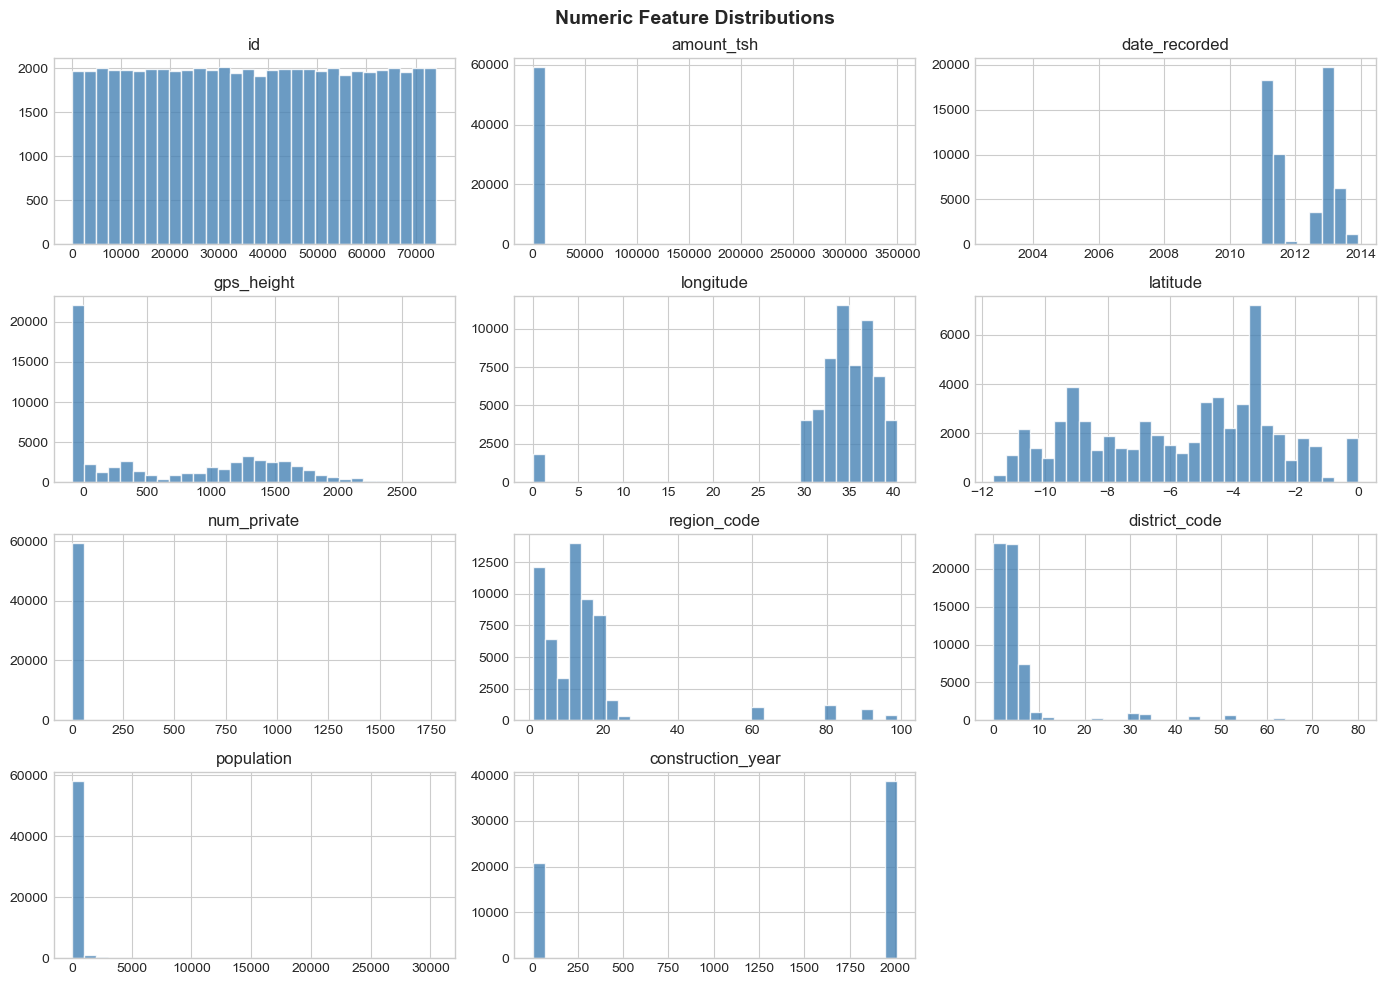

In [12]:
# Histograms for numeric features
train_df.hist(
    figsize = (14, 10), 
    bins = 30, 
    edgecolor = 'white',
    color = 'steelblue',
    alpha = 0.8
)

plt.suptitle('Numeric Feature Distributions', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

See features that have outliers. We will use boxplots for this.

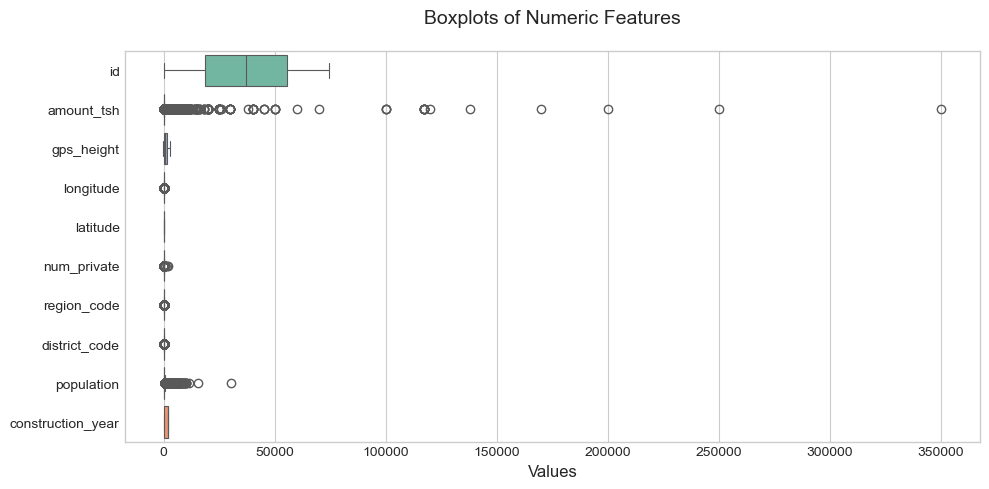

In [13]:
# Save numerical features into a variable
numeric_cols = train_df.select_dtypes(include = np.number).columns

# Plot boxplots
plt.figure(figsize = (10, 5))
sns.boxplot(
    data = train_df[numeric_cols], 
    orient = 'h',
    palette = 'Set2',
    linewidth = 0.8
)

plt.title('Boxplots of Numeric Features', fontsize = 14, pad = 20)
plt.xlabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()

*Observation:* 

A few things jump out immediately:  
- **gps_height** has negative values (wells below sea level? Likely data entry errors).  
- **longitude** and **latitude** include zeros, which don’t make geographical sense for Tanzania. Could they be placeholders for missing data?  
- **amount_tsh** is heavily skewed, with most values at zero but an extreme max of 350,000. That screams outliers, albeit they could be genuine.  
- **num_private** is basically all zeros, with a wild outlier at 1,776. Likely a useless feature. Subject for further scrutiny. 
- **construction_year** has suspicious zeros, even though we know wells can’t be built in year 0.  
- **population** is wildly imbalanced: many zeros, but a max of 30,500, suggesting poor recording or aggregation issues.  

In short: while the dataset is large and rich, it carries its fair share of quirks that need cleaning before any serious modeling. 

Now let's shift our focus to the categorical variables.

In [14]:
# Get categorical columns
train_df.select_dtypes(include = 'object').columns.tolist()

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

*Observation:* Looks like our data is mostly categorical. We will do the same as we did with numerical features and check summary statistics

In [15]:
# Get descriptive statistics for categorical columns
train_df.describe(include = 'object')

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,55763,55745,59398,59400,59029,59400,59400,59400,56066,59400,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1896,2145,37399,9,19287,21,125,2092,2,1,...,8,6,5,5,10,7,3,7,6,3
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,9084,17402,3563,10248,508,5294,2503,307,51011,59400,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


Because of their large number, we will save the visualisations for the data cleaning phase.

*Observation:* 

The categorical landscape is just as messy as the numeric side:
- Target distribution: status_group is imbalanced; functional dominates (32,259), followed by non-functional (24,660), with needs repair trailing (3,481). That skew will need attention during modeling.    
- High cardinality: Features like 'funder' (1,896 unique), 'installer' (2,145 unique), and 'wpt_name' (37,399 unique!) are way too granular. Many of these are variations of the same entity (e.g “Government of Tanzania” vs “Govt Tanzania”). These will need collapsing or encoding strategies.  
- Dominant modes: Some variables are massively imbalanced; 'public_meeting' is “True” for 51,011 out of 56,066 records, and 'payment_type = never pay' accounts for 25,348 records.  
- Geographic hierarchy: 'region', 'lga', and 'ward' provide location granularity at different levels. Useful, but they’ll need careful handling to avoid multicollinearity.  
- Waterpoint design: 'waterpoint_type' and 'waterpoint_type_group' overlap heavily. Likely redundant features.  
- Suspicious entries: The most common 'wpt_name' is literally “none” (3,563 times), which isn’t very informative. Similar issues exist for subvillage names.  

Overall: categorical features offer valuable signals but are cluttered with inconsistencies, redundancies, and heavy skew. Cleaning and grouping will be critical here.  

Because of their large number, we will save the visualisations for the cleaning and EDA (Exploratory Data Analysis) phase.

Next we check for data completeness and sanity. This is all about checking for missing values distribution and duplicated values.

### DATA QUALITY CHECK

In [16]:
# Check for duplicates
print("Duplicate:", train_df.duplicated().sum())

# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Duplicate: 0

Missing values and percentage:
                    Missing Values  Percentage
funder                       3637    6.122896
installer                    3655    6.153199
wpt_name                        2    0.003367
subvillage                    371    0.624579
public_meeting               3334    5.612795
scheme_management            3878    6.528620
scheme_name                 28810   48.501684
permit                       3056    5.144781


*Observation:*

Duplicates aren’t an issue (zero found), but missing values definitely are:  
- Moderate gaps (5–6%) in 'funder', 'installer', 'public_meeting', 'scheme_management', and 'permit'. Manageable, but they’ll need imputation or categorical grouping.  
- Negligible gaps (<1%) in 'wpt_name' and 'subvillage', easy wins for cleanup.  
- Massive hole (49%) in 'scheme_name', making it essentially unusable in raw form. Either it gets dropped, or we engineer a high-level indicator (e.g “has_scheme_name” vs “no_scheme_name”).  

Overall, the dataset is mostly complete, but there are pockets of systematic missingness (especially around water management schemes) that hint at recording inconsistencies in the field.  

## TESTING DATASET

### DATASET OVERVIEW

Awesome! Now, let’s turn to the test dataset. Unlike the training data, we won’t merge this with labels. Doing so would be both invalid and a source of data leakage. 

However, it’s still important to **audit and clean the test set** to ensure it follows the same structure and quality standards as the training data. That way, when our model is deployed, it will be working with reliable and consistent inputs.  

In [17]:
# Load entire dataset
test_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [18]:
# Check the shape of the dataset
print(f"The testing dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The testing dataset has 14850 rows and 40 columns.


*Observation:* The test dataset is equally substantial, with over **14,000 rows** spanning **40 columns**. While it mirrors the training set in structure, it naturally lacks the target variable. This still gives us a rich feature space to validate and refine our preprocessing steps, ensuring consistency between training and testing pipelines.  

Next, let’s review the column names to check how clean, consistent, and intuitive they are.  

In [19]:
# Check column names
test_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

*Observation:* The test dataset also comes with well-structured column names; neat, intuitive, and free from the usual suspects like typos, stray spaces, or inconsistent casing.   

Our next step is a metadata check. From there, we’ll classify the features into numerical and categorical groups to set the stage for cleaning.  

In [20]:
# Get metadata
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     14850 non-null  int64         
 1   amount_tsh             14850 non-null  float64       
 2   date_recorded          14850 non-null  datetime64[ns]
 3   funder                 13980 non-null  object        
 4   gps_height             14850 non-null  int64         
 5   installer              13973 non-null  object        
 6   longitude              14850 non-null  float64       
 7   latitude               14850 non-null  float64       
 8   wpt_name               14850 non-null  object        
 9   num_private            14850 non-null  int64         
 10  basin                  14850 non-null  object        
 11  subvillage             14751 non-null  object        
 12  region                 14850 non-null  object        
 13  r

### FEATURE EXPLORATION

In [21]:
# Get numerical columns
test_df.select_dtypes(include = 'number').columns.tolist()

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

*Observation:* No apparent type mismatches here either. The numeric features in the test dataset are stored correctly as numeric.  

As with the training set, we’ll validate this by reviewing the summary statistics. This step not only reconfirms the integrity of the data types but also offers a quick snapshot of the feature distributions and ranges.  

Reassuringly, the numerical columns have been kept consistent between the training and test datasets, which makes preprocessing and modeling much smoother.  

In [22]:
# Get descriptive statistics for numerical columns
test_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,14850.0,37161.972929,10.0,18727.0,37361.5,55799.75,74249.0,21359.364833
amount_tsh,14850.0,322.826983,0.0,0.0,0.0,25.0,200000.0,2510.968644
date_recorded,14850,2012-03-24 12:32:52.363636480,2001-03-26 00:00:00,2011-03-31 00:00:00,2012-10-07 00:00:00,2013-02-08 00:00:00,2013-12-03 00:00:00,NaN
gps_height,14850.0,655.147609,-57.0,0.0,344.0,1308.0,2777.0,691.261185
longitude,14850.0,34.061605,0.0,33.069455,34.901215,37.196594,40.325016,6.593034
latitude,14850.0,-5.684724,-11.564592,-8.44397,-5.04975,-3.320594,-0.0,2.940803
num_private,14850.0,0.415084,0.0,0.0,0.0,0.0,669.0,8.16791
region_code,14850.0,15.139057,1.0,5.0,12.0,17.0,99.0,17.191329
district_code,14850.0,5.626397,0.0,2.0,3.0,5.0,80.0,9.673842
population,14850.0,184.114209,0.0,0.0,20.0,220.0,11469.0,469.499332


Visualise this distribution

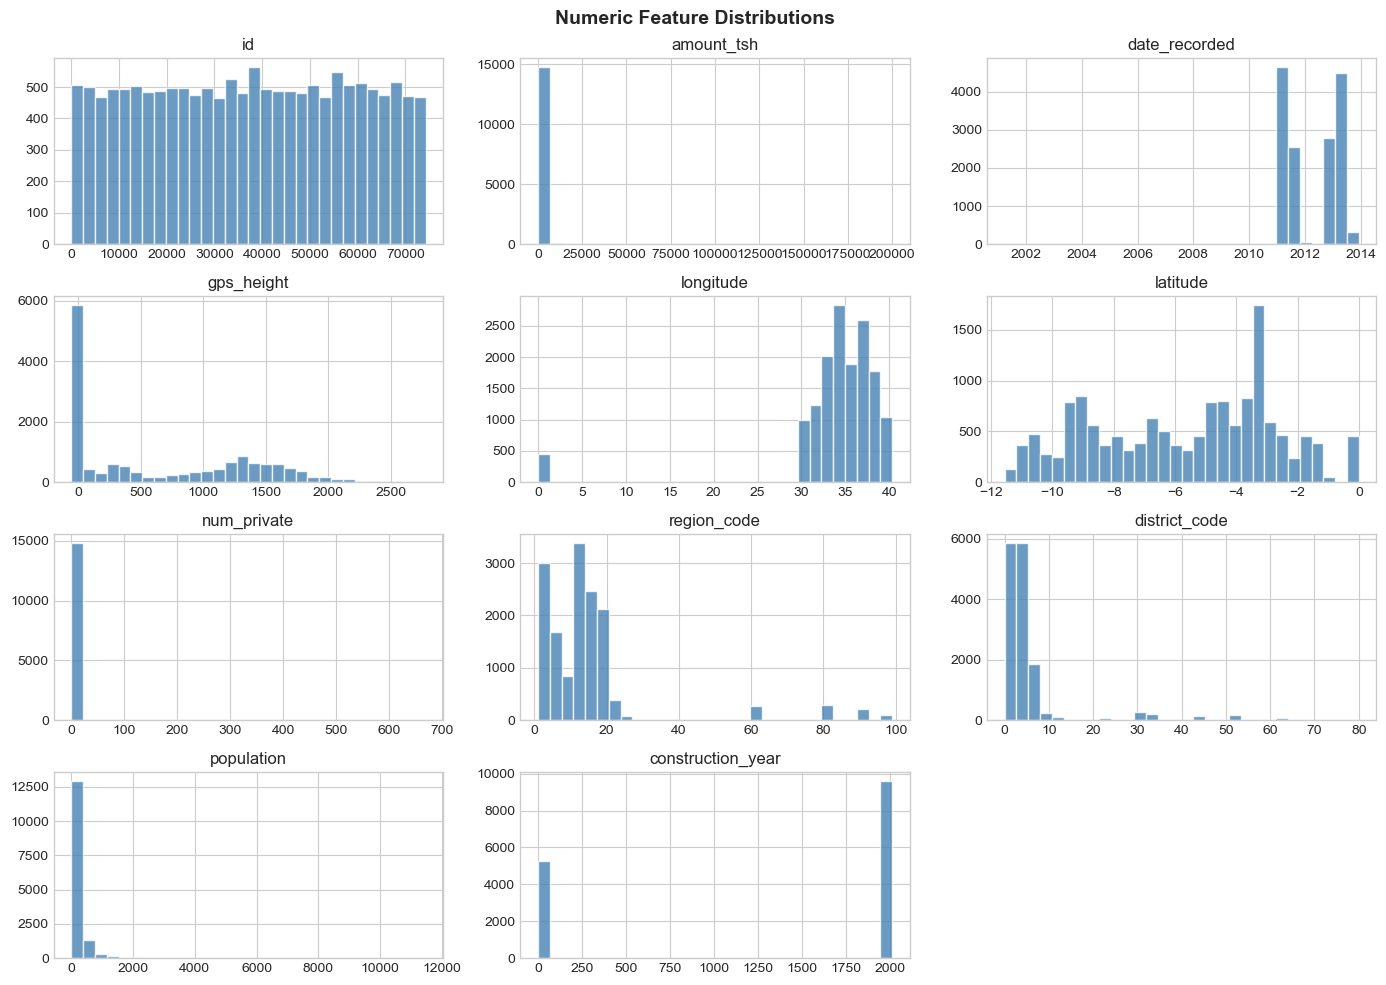

In [23]:
# Histograms for numeric features
test_df.hist(
    figsize = (14, 10), 
    bins = 30, 
    edgecolor = 'white',
    color = 'steelblue',
    alpha = 0.8
)

plt.suptitle('Numeric Feature Distributions', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [24]:
# Get categorical columns
test_df.select_dtypes(include = 'object').columns.tolist()

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [25]:
# Get descriptive statistics for categorical columns
test_df.describe(include = 'object')

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,13980,13973,14850,14850,14751,14850,14850,14850,14029,14850,...,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850
unique,979,1091,10840,9,8443,21,125,1959,2,1,...,7,8,6,5,5,10,7,3,7,6
top,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,GeoData Consultants Ltd,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,2215,4349,877,2623,140,1311,625,79,12738,14850,...,6364,12687,12687,8336,8336,4316,4316,11492,7106,8614


*Observation:* 

The categorical profile of the test set mirrors the quirks of training:  
- High cardinality persists variables like 'funder', 'installer', and especially 'wpt_name' still carry thousands of unique values, many of which are near-duplicates or inconsistencies.  
- Dominant categories reappear for instance, 'public_meeting' skews heavily toward “True,” and 'payment_type' is once again dominated by “never pay.”  
- Hierarchical geography remains intact features like 'region', 'lga', and 'ward' are consistent, but the overlap suggests potential multicollinearity if all levels are used naively.  
- Overlap and redundancy variables such as 'waterpoint_type' and 'waterpoint_type_group' continue to carry nearly the same information.  
- Suspicious placeholders entries like “none” for 'wpt_name' or vague subvillage names are still common, signaling data quality issues.  

Overall: the categorical landscape in the test set is consistent with training, which is exactly what we want. That means our eventual cleaning strategies can be applied uniformly across both datasets.  

### DATA QUALITY CHECK

Next, we’ll check for data completeness and sanity, i.e. missing values distribution and duplicate records.  

In [26]:
# Check for duplicates
print("Duplicate:", test_df.duplicated().sum())

# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = test_df.isnull().sum()
missing_percentage = (missing_values / len(test_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Duplicate: 0

Missing values and percentage:
                    Missing Values  Percentage
funder                        870    5.858586
installer                     877    5.905724
subvillage                     99    0.666667
public_meeting                821    5.528620
scheme_management             969    6.525253
scheme_name                  7242   48.767677
permit                        737    4.962963


*Observation:* 

The test data shows nearly identical missingness patterns to the training set. Proportions are consistent across the board:  
- funder and installer each drop by approximately 6%.  
- public_meeting, scheme_management, and permit fall in the 5–6% range.  
- subvillage barely registers (<1%).  
- scheme_name is the real weak spot again, with approximatelt 49% absent.  

This alignment is encouraging: whatever imputation or feature engineering we apply on the training side can be carried over to the test set without major adjustment.  

## DATA UNDERSTANDING RECAP

### DATA DICTIONARY

The following table provides a comprehensive data dictionary for the Tanzanian waterpoint dataset, as documented by Taarifa and the Tanzanian Ministry of Water. This dataset uses the same schema as the DrivenData *Pump it Up* challenge. Each column is described below.

| Column | Description |
|--------|-------------|
| id | Unique identifier for each waterpoint. |
| amount_tsh | Total static head (amount of water available to waterpoint), in Tanzania Shillings (TSH). Often 0 when unknown. |
| date_recorded | Date the row was entered into the dataset. |
| funder | Organization or individual that funded the waterpoint. |
| gps_height | Altitude of the waterpoint in meters above sea level. |
| installer | Organization or individual who installed the waterpoint. |
| longitude | Geographical coordinate (East). |
| latitude | Geographical coordinate (South). |
| wpt_name | Name of the waterpoint. |
| num_private | Private permit code (rarely used; almost always 0). |
| basin | Geographic water basin of the waterpoint. |
| subvillage | Subvillage where the waterpoint is located. |
| region | Region where the waterpoint is located. |
| region_code | Numeric code for the region. |
| district_code | Numeric code for the district. |
| lga | Name of the local government authority. |
| ward | Ward where the waterpoint is located. |
| population | Estimated population served by the waterpoint. |
| public_meeting | Boolean indicating if a public meeting was held regarding the waterpoint. |
| recorded_by | Name of the data collector (almost always "GeoData Consultants Ltd"). |
| scheme_management | Entity responsible for managing the waterpoint scheme. |
| scheme_name | Name of the water management scheme (often missing). |
| permit | Boolean indicating if the waterpoint has a legal permit. |
| construction_year | Year the waterpoint was constructed. |
| extraction_type | Type of extraction device (e.g gravity, handpump, submersible). |
| extraction_type_group | Grouping of extraction type (e.g hand pump vs. motor pump). |
| extraction_type_class | Broad classification of extraction type (e.g gravity, handpump, motorized). |
| management | Who manages the waterpoint (e.g community, water authority, private). |
| management_group | Grouping of management type (e.g user group vs. authority). |
| payment | How users pay for water (e.g monthly, per bucket, never pay). |
| payment_type | Simplified payment type (e.g free, pay per use, pay monthly). |
| water_quality | Quality of water (e.g soft, salty, milky). |
| quality_group | Grouping of water quality (e.g good, salty, colored). |
| quantity | Quantity of water observed (e.g enough, insufficient, dry). |
| quantity_group | Grouping of water quantity (e.g enough vs. insufficient). |
| source | Source of water (e.g spring, river, machine-drilled borehole). |
| source_type | Broad type of source (e.g surface water, groundwater). |
| source_class | Class of source (e.g groundwater, surface). |
| waterpoint_type | Type of waterpoint (e.g communal standpipe, hand pump, dam). |
| waterpoint_type_group | Grouping of waterpoint type (e.g communal standpipe vs. hand pump). |
| status_group | Target variable: functionality status of the waterpoint:<br>• functional – operational<br>• functional needs repair – operational but needs maintenance<br>• non functional – not working |

### TRAINING DATA OVERVIEW

- **Size**: 59,400 rows × 41 columns  
- **Balance**: Reasonable size for robust EDA; large enough to uncover patterns  
- **Data types**: Mostly categorical (31), some numeric (10), with a clear target (status_group)  
- **Duplicates**: None detected  

#### Data Quality Observations
- **Missing values**:  
  - Heavy: scheme_name (approximately 48%)  
  - Moderate: funder, installer, public_meeting, scheme_management, permit (approximately5–7%)  
  - Minimal: wpt_name, subvillage  
- **Zeros / miscoded values**:  
  - construction_year: many zeros (represents missing, not valid years)  
  - population: some entries are zero or extremely high (likely errors)  
  - gps_height, longitude, latitude; contain zeros/negative values (invalid)  

#### Numeric Features
- **amount_tsh**: Highly skewed; most entries are zero, with few extreme values (up to 350,000)  
- **gps_height**: Range from -90 to 2,770; negative values are unrealistic  
- **population**: Skewed; many villages <500 people, but some values >30,000  
- **construction_year**: Spread from early 1900s to 2013, but many zeros present  

#### Categorical Features
- **funder & installer**: Highly fragmented (1,800–2,000 unique values), but dominated by a few large organizations (e.g Government, World Bank, UNICEF)  
- **region, basin, lga, ward**: Strong geographic detail with multiple levels  
- **waterpoint_type, source, extraction_type**: Rich engineering information, likely tied to functionality  
- **recorded_by**: Only one unique value, not useful for analysis  

#### Target Variable: status_group
- Three categories: *functional*, *non functional*, *functional needs repair*  
- Requires class distribution check to assess balance before deeper analysis  

#### Initial Takeaways
- Data is well-structured overall, but missingness and skew need careful handling  
- Some columns (e.g scheme_name, recorded_by) may not provide analytical value  
- Strong potential in geographic and technical features to explain well functionality  
- Dataset is well-positioned to support decision-making in water resource allocation 

### TESTING DATA OVERVIEW

- **Rows:** 14,850  
- **Columns:** 40  

This dataset mirrors the structure of the training data but without the target label. It is used for evaluation and prediction.

#### Column Types
- **Numerical:** id, amount_tsh, gps_height, longitude, latitude, num_private, region_code, district_code, population, construction_year
- **Categorical:** All other fields such as funder, installer, basin, region, lga, ward, extraction_type, payment_type, source, waterpoint_type, etc.  
- **Datetime-like:** date_recorded

#### Key Statistics (Numerical Columns)
- **id**: 10 – 74,249 (unique identifiers)  
- **amount_tsh**: heavily skewed, most values are **0**, max = 200,000  
- **gps_height**: -57 to 2,777 (some negative/implausible values)  
- **longitude**: 0.0 values present (invalid); normal range 33–40  
- **latitude**: -11.56 to near 0 (Tanzania location, but a few suspicious near-zero values)  
- **population**: many zeros; max = 11,469 (outliers)  
- **construction_year**: many 0s (unknown); valid range up to 2013  

#### Categorical Features (Highlights)
- **funder:** 979 unique values, highly skewed (e.g "Government Of Tanzania" dominant)  
- **installer:** 1,091 unique values (common: "DWE")  
- **wpt_name:** 10,840 unique (very high granularity, limited modeling value)  
- **basin:** 9 categories (e.g Lake Victoria most frequent)  
- **region:** 21 unique values  
- **lga:** 125 unique  
- **ward:** 1,959 unique (very high granularity)  
- **public_meeting:** Boolean, but 5.5% missing  
- **scheme_name:** extremely sparse (48.7% missing)  
- **waterpoint_type:** 7 categories (communal standpipe dominant)  
- **payment_type:** 7 categories (e.g “never pay” most frequent)

#### Duplicates
- **0 duplicates**

#### Missing Values
| Column             | Missing | % Missing |
|--------------------|---------|------------|
| funder             | 870     | 5.86% |
| installer          | 877     | 5.91% |
| subvillage         | 99      | 0.67% |
| public_meeting     | 821     | 5.53% |
| scheme_management  | 969     | 6.53% |
| scheme_name        | 7,242   | 48.77% |
| permit             | 737     | 4.96% |

#### Key Takeaways
- **High missingness** in scheme_name makes it unreliable.  
- **Many zeros** in amount_tsh, population, and construction_year; signals poor data quality.  
- **Location fields** (longitude, latitude, gps_height) contain invalid entries (0s, negatives).  
- **High-cardinality categorical fields** (wpt_name, ward, lga) may not generalize well and will need encoding strategies.  
- Overall structure is consistent with training data, making it suitable for evaluation after preprocessing.

# DATA PREPARATION AND EXPLORATORY DATA ANALYSIS (EDA)

Before diving into EDA or modeling, it is crucial to clean, transform, and engineer the dataset to ensure optimal performance of machine learning algorithms and accurate insight generation. The following steps outline a comprehensive data preparation workflow:

* Data Cleaning/Wrangling
* Handling Outliers
* Feature Transformation
* Feature Engineering
* Target Preparation
* Final Dataset Check

Since our focus is currently EDA, we will save the modeling steps for later.

## 1. DATA WRANGLING
- **Drop unnecessary columns:** We will inspect all columns and drop those that have very limited analytical or modelling value. (e.g unique identifiers).
- **Handle missing values**: Decide whether to impute, drop, or treat missing values as a separate category.
- **Correct data types**: Ensure numerical columns are indeed numeric and categorical columns are of type category, object or string. This has already been verified.
- **Remove duplicates**: Both datasets contain 0 duplicated values.
- **Variable Analysis**: Carry out variable analysis (Univariate, Bivariate and Multivariate)

We will do this cleaning excercise on the training data in tandem with the test data.

Let's begin.

In [27]:
# Columns to be dropped
dropped_columns = ['extraction_type', 'extraction_type_class', 'payment', 'scheme_name', 'quality_group',
                   'quantity_group', 'source_type', 'waterpoint_type', 'recorded_by', 'num_private', 
                   'id', 'subvillage', 'wpt_name', 'ward', 'funder', 'date_recorded', 'public_meeting', 
                   'region_code', 'district_code', 'lga', 'scheme_management', 'source_class', 'management']

train_df.drop(columns = dropped_columns, inplace = True)
test_df.drop(columns = dropped_columns, inplace = True)

region

In [28]:
# Inspect 'region'
print(f"Unique 'region' values: {train_df['region'].nunique()}")
print(f"\nRegion values: \n{(train_df['region'].unique())}")

# Check value counts
region_counts = train_df['region'].value_counts(dropna = False) 
print("\nRegion Value Counts:\n", region_counts)

Unique 'region' values: 21

Region values: 
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']

Region Value Counts:
 region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64


*Observation:*

The are 17 unique unevenly distributed regions where Iringa, Kilimanjaro, and Morogoro contribute the largest share of water points, while Shinyanga, Mwanza, and Dar es Salaam have very few records. This imbalance means regional effects will be driven mostly by high-volume areas, and the sparsely represented regions may not provide reliable signals unless grouped or treated carefully. Overall, the column is squeaky clean.

Extraction Type Group

In [29]:
# extraction_type_group
print(f"Unique 'extraction_type_group' values: {train_df['extraction_type_group'].nunique()}")
print(f"\nExtraction type group values: \n{(train_df['extraction_type_group'].unique())}")

# Check value counts
extraction_type_group_counts = train_df['extraction_type_group'].value_counts(dropna = False) 
print("\nExtraction Type Group Value Counts:\n", extraction_type_group_counts)

Unique 'extraction_type_group' values: 13

Extraction type group values: 
['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump']

Extraction Type Group Value Counts:
 extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64


*Observation:*
- Gravity dominates heavily (26,780 instances), suggesting that gravity-fed systems are by far the most common extraction method in Tanzania.
- Nira/Tanira, Other, Submersible, and SWN 80 form a strong secondary cluster of extraction methods (6k–8k each).
- A long tail of rare categories exists, especially India Mark III (98), Wind-powered (117), and Other motorpump (122).
- There are multiple overlapping "other" categories (other, other handpump, other motorpump).

*Cleaning Strategy:* Standardize labels: merge categories like other motorpump to motorpump and other handpump to handpump for clearer grouping.

In [30]:
# ========================= [CLEAN TRAINING DATA] =========================

# Standardize the group names
train_df['extraction_type_group'] = train_df['extraction_type_group'].str.strip().str.lower()
train_df['extraction_type_group'] = train_df['extraction_type_group'].str.replace(r'\s+', ' ', regex = True)

# Rename other motorpump to other motorpump
# and other handpump to other handpump
train_df['extraction_type_group'] = train_df['extraction_type_group'].replace({
    'other motorpump': 'motorpump',
    'other handpump': 'handpump'
})

# ============================ [CLEAN TEST DATA] =========================

# Standardize the group names
test_df['extraction_type_group'] = test_df['extraction_type_group'].str.strip().str.lower()
test_df['extraction_type_group'] = test_df['extraction_type_group'].str.replace(r'\s+', ' ', regex = True)

# Rename other motorpump to other motorpump
# and other handpump to other handpump
test_df['extraction_type_group'] = test_df['extraction_type_group'].replace({
    'other motorpump': 'motorpump',
    'other handpump': 'handpump'
})

# Check the cleaned values
print(train_df['extraction_type_group'].value_counts(dropna = False))

extraction_type_group
gravity           26780
nira/tanira        8154
other              6430
submersible        6179
swn 80             3670
mono               2865
india mark ii      2400
afridev            1770
rope pump           451
handpump            364
motorpump           122
wind-powered        117
india mark iii       98
Name: count, dtype: int64


### 2. HANDLING MISSING VALUES

In [31]:
# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Missing values and percentage:
            Missing Values  Percentage
installer            3655    6.153199
permit               3056    5.144781


permit

Number of unique values in 'permit': 2

Unique values in 'permit': [False True nan]

Permits Distribution:
 permit
True     38852
False    17492
NaN       3056
Name: count, dtype: int64


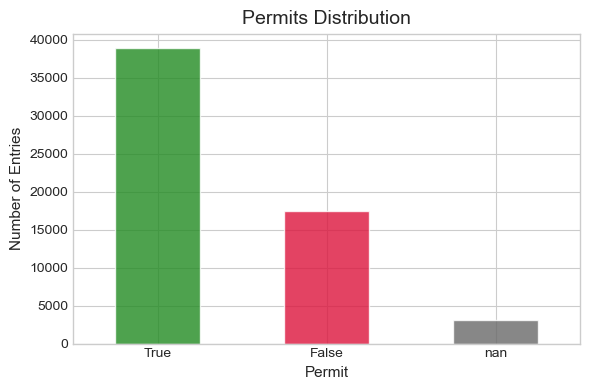

In [32]:
# Check for unique values
print("Number of unique values in 'permit':", train_df['permit'].nunique())
print("\nUnique values in 'permit':", train_df['permit'].unique())

# Count occurrences
permit_counts = train_df['permit'].value_counts(dropna = False)
print("\nPermits Distribution:\n", permit_counts)

# Create clean plot
plt.figure(figsize=(6, 4))

colors = []
for x in permit_counts.index:
    if x == True:
        colors.append('forestgreen')
    elif x == False:
        colors.append('crimson')
    else:  
        colors.append('dimgray')
        
ax = permit_counts.plot(kind = 'bar', color = colors, alpha = 0.8, edgecolor = 'white')

# Labels and title
plt.title("Permits Distribution", fontsize = 14, pad = 7)
plt.ylabel("Number of Entries", fontsize = 11)
plt.xlabel("Permit", fontsize = 11)
ax.set_xticklabels(permit_counts.index, rotation = 0, ha = 'center')
plt.tight_layout()
plt.show()

> *Observation:* The permit column is a categorical boolean feature with three distinct values: True, False, and NaN. Out of 59,400 total entries:

* True (has permit): 38,852 (approximately 65%)

* False (no permit): 17,492 (approximately 29%)

* Missing (NaN): 3,056 (approximately 5%)

In [33]:
# Fill nulls with unknown in train data
train_df['permit'] = train_df['permit'].fillna('Unknown')

# Fill nulls with unknown in test data
test_df['permit'] = test_df['permit'].fillna('Unknown')


# Sanity check
print("Null values in 'permit' after cleaning:", train_df['permit'].isna().sum())

Null values in 'permit' after cleaning: 0


Installer

In [34]:
# Inspect 'installer' column
print(f"Unique 'installer' values: {train_df['installer'].nunique()}")
print(f"\nInstaller values: \n{(train_df['installer'].unique())}")

# Count occurrences
installer_counts = train_df['installer'].value_counts(dropna = False)
print("\nInstaller Distribution:\n", installer_counts)

Unique 'installer' values: 2145

Installer values: 
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']

Installer Distribution:
 installer
DWE                     17402
NaN                      3655
Government               1825
RWE                      1206
Commu                    1060
                        ...  
Rilayo water project        1
Sent Tho                    1
UPM                         1
Magul                       1
Magoma ADP                  1
Name: count, Length: 2146, dtype: int64


In [35]:
# Remove leading or trailing white spaces and excessive internal spaces
train_df['installer'] = train_df['installer'].str.strip()
train_df['installer'] = train_df['installer'].str.replace(r'\s+', ' ', regex = True)

# Do the same for test data
test_df['installer'] = test_df['installer'].str.strip()
test_df['installer'] = test_df['installer'].str.replace(r'\s+', ' ', regex = True)

# Count occurrences
installer_counts = train_df['installer'].value_counts(dropna = False)

# Top 20 most common installers
top20 = installer_counts.head(20)
print(top20)

installer
DWE                   17402
NaN                    3655
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
District Council        555
Community               553
DANID                   552
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
Name: count, dtype: int64


*Observations:*
- The installer column has 2,145 unique values, which is excessively high for categorical data.  
- The distribution is highly skewed: a few installers dominate (e.g DWE with approximately 17k, Government with approximately 1.8k), while the majority occur very rarely.  
- There are clear inconsistencies in spelling/capitalization (e.g DWE vs dwe, World vision vs WORLD VISION).  
- Some entries are partial or truncated (e.g Commu, Danid), which are likely variants of more complete names (Community, Danida).  
- Noise exists: numeric-only values (e.g 0) or ambiguous entries (NaN, empty strings).  
- Large long-tail problem exists: the majority of installers appear only once or twice.  

*Cleaning Strategy*  
1. Standardize Text: 
   - Lowercase, strip whitespace, collapse multiple spaces.  
   - Title case for final readability.  
2. Handle Missing & Noisy Values:  
   - Replace NaN, empty strings, and ambiguous numeric codes (0) with "Unknown".  
3. Canonicalize Common Installers: 
   - Map frequent variants to a single standardized label, e.g:  
     - Dwe to DWE  
     - Govt, Government, Central Government to Government of Tanzania  
     - Commu, Community to Community  
     - Danid, Danida to Danida  
     - World vision, World Vision Tanzania to World Vision  
     - Similar mappings for KKKT, RWE, District Council, Hesawa, Tasaf, etc.  
4. Group Rare Installers: Installers with counts below a frequency threshold (e.g <400) should be grouped under "Other Installers".  

In [36]:
# Dictionary mapping variations/misspellings to correct installer names
installer_corrections = {
    # Central Government variations
    'Central Government': ['Central government', 'Tanzania Government', 'Cental Government','Tanzania government',
                           'Cebtral Government', 'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                           'TANZANIA GOVERNMENT','Central govt', 'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania'],

    # District Council variations
    'District Council': ['District COUNCIL', 'DISTRICT COUNCIL','Counc','District council','District Counci', 
                         'Council', 'COUN', 'Distri', 'District  Council'],

    # Villagers variations
    'Villagers': ['villigers', 'villager', 'villagers', 'Villa', 'Village','Villi', 'Village Council', 'Village Counil', 
                  'Villages', 'Vill', 'Village community', 'Villaers', 'Village Community','Villag','Villege Council', 
                  'Village council','Village Council','Villagerd','Villager','Village Technician','Village Office',
                  'VILLAGE COUNCIL','Village community members','VILLAG','Village Government','Village govt',
                  'VILLAGERS','Village  Council'],

    # District water department variations
    'District water department': ['District Water Department', 'District water depar','Distric Water Department'],

    # Fini Water variations
    'Fini Water': ['FinW', 'Fini water', 'FINI WATER', 'FIN WATER','Finwater', 'FINN WATER', 'FW', 'FinWater', 'FiNI WATER'],

    # RC Church variations
    'RC Church': ['RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH','RC church', 'RC CATHORIC', 'Ch'],

    # World Vision variations
    'World Vision': ['world vision', 'World Division', 'World vision', 'WORLD VISION', 'World Vission'],

    # UNICEF variations
    'UNICEF': ['Unisef','Unicef'],

    # DANIDA
    'DANIDA': ['DANID'],

    # Community
    'Community': ['Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 'Adra /Community', 'Adra/Community', 'Adra/ Community'],

    # Government
    'Government': ['GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN','Gover', 'Gove', 'Governme', 'Governmen'],

    # HESAWA
    'HESAWA': ['Hesawa', 'hesawa'],

    # Jaica
    'Jaica': ['JAICA', 'JICA', 'Jica', 'Jeica', 'JAICA CO'],

    # KKKT
    'KKKT': ['KKKT _ Konde and DWE', 'KKT', 'KKKT Church', 'KkKT'],

    # Unknown / 0
    'Unknown': ['0']
}

# ========================= [CLEAN TRAINING DATA] =========================

# Apply the corrections to train
for correct_name, variants in installer_corrections.items():
    train_df['installer'] = train_df['installer'].replace(variants, correct_name)

# Dimensionality reduction
# Keep only top 20 installers as unique values
installer_20 = train_df['installer'].value_counts(normalize=True).head(20).index.tolist()

# Replace installers not in the top 20 with "OTHER"
train_df['installer'] = [inst if inst in installer_20 else "OTHER" for inst in train_df['installer']]

# ========================= [CLEAN TEST DATA] =========================

# Apply the corrections to test
for correct_name, variants in installer_corrections.items():
    test_df['installer'] = test_df['installer'].replace(variants, correct_name)

# Dimensionality reduction for test data
# Keep only top 20 installers as unique values
installer_20_test = test_df['installer'].value_counts(normalize=True).head(20).index.tolist()

# Replace installers not in the top 20 with "OTHER"
test_df['installer'] = [inst if inst in installer_20_test else "OTHER" for inst in test_df['installer']]


# Sanity check for training data
train_df['installer'].value_counts().head(25)

installer
OTHER                 23585
DWE                   17402
Government             2660
Community              1806
DANIDA                 1602
HESAWA                 1394
RWE                    1206
District Council       1179
Central Government     1118
KKKT                   1107
Fini Water              952
Unknown                 780
World Vision            713
TCRS                    707
CES                     610
RC Church               495
Villagers               487
LGA                     408
WEDECO                  397
TASAF                   396
Jaica                   396
Name: count, dtype: int64

basin

In [37]:
# Inspect basin
print(f"Unique 'basin' values: {train_df['basin'].nunique()}")
print(f"\nBasin values: \n{(train_df['basin'].unique())}")

# Count occurrences
installer_counts = train_df['basin'].value_counts(dropna = False)
print("\nBasin Distribution:\n", installer_counts)

Unique 'basin' values: 9

Basin values: 
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']

Basin Distribution:
 basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64


*Observation:* The basin variable contains 9 unique values that capture the major hydrological regions where the water points are located. The data is dominated by a few key basins: Lake Victoria (10,248), Pangani (8,940), and Rufiji (7,976), together accounting for a substantial portion of Tanzania's water point suppliers. Other significant basins include Internal, Lake Tanganyika, and Wami/Ruvu, while smaller contributions come from Lake Nyasa, Ruvuma/Southern Coast, and Lake Rukwa.

The distribution is right-skewed, with a few basins having very high representation and several basins appearing less frequently. 

*Cleaning Strategy:* Remove extra spaces around slashes to standardize names like "Ruvuma / Southern Coast" to "Ruvuma/Southern Coast", ensuring consistency for analysis and visualization.

In [38]:
# ============================= [CLEAN TRAIN DATA] =========================

# Remove leading/trailing spaces
train_df['basin'] = train_df['basin'].str.strip()

# Replace multiple internal spaces with single space
train_df['basin'] = train_df['basin'].str.replace(r'\s+', ' ', regex=True)

# Remove spaces around slashes
train_df['basin'] = train_df['basin'].str.replace(r'\s*/\s*', '/', regex=True)

# ========================= [CLEAN TEST DATA] ================================

# Remove leading/trailing spaces
test_df['basin'] = test_df['basin'].str.strip()

# Replace multiple internal spaces with single space
test_df['basin'] = test_df['basin'].str.replace(r'\s+', ' ', regex=True)

# Remove spaces around slashes
test_df['basin'] = test_df['basin'].str.replace(r'\s*/\s*', '/', regex=True)


# Sanity check
train_df['basin'].value_counts()

basin
Lake Victoria            10248
Pangani                   8940
Rufiji                    7976
Internal                  7785
Lake Tanganyika           6432
Wami/Ruvu                 5987
Lake Nyasa                5085
Ruvuma/Southern Coast     4493
Lake Rukwa                2454
Name: count, dtype: int64

Final check for missingness.

In [39]:
# Final check for missingness
train_df.isnull().sum()

amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_group    0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type_group    0
status_group             0
dtype: int64

### CHECK FOR OUTLIERS

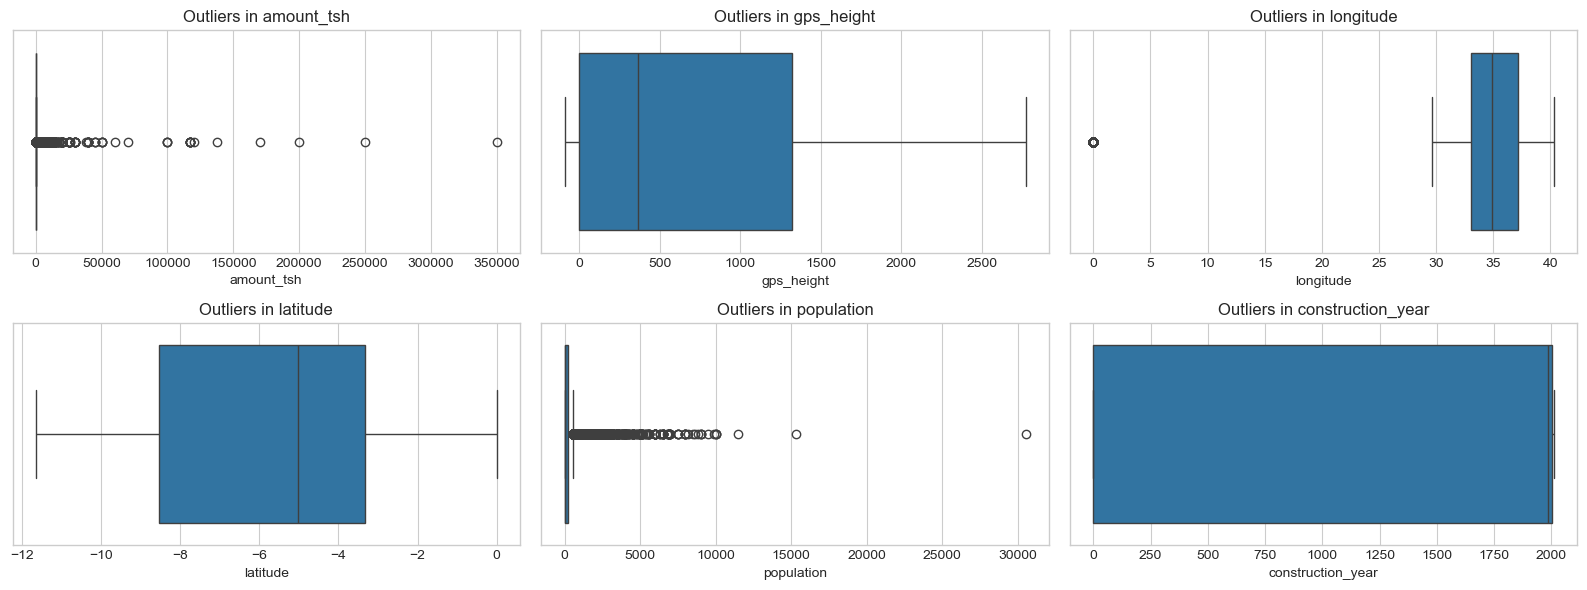

In [40]:
# Check for outliers in all numerical features
numerical_cols = train_df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (16, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x = train_df[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

*Observation:* 

The test dataset shows similar quirks to what we saw in training:  
- gps_height still contains negative values, which don’t make physical sense and likely reflect data entry issues.  
- longitude and latitude feature zeros again. Almost certainly placeholders for missing or invalid coordinates.  
- amount_tsh remains heavily skewed, with a bulk of zeros contrasted by very large outliers.   
- construction_year includes zeros, which are unrealistic and should be treated carefully.  
- population carries the same imbalance as in training. Large clusters of zeros alongside extreme highs, pointing to inconsistent reporting.  

In short: the test set mirrors the messiness of the training set, which is a good thing. It means our cleaning strategy can stay consistent.   

## UNIVARIATE ANALYSIS

In this section, we explore each feature individually to understand its distribution, variability, and quality.  
Univariate analysis helps answer questions such as:  

- How are values distributed for numeric features?  
- Which categorical classes dominate, and are there rare categories?  
- Are there missing values, noise, or outliers?  
- Do any variables need transformation (e.g., scaling, binning, or log transform)?  

The goal is to build intuition about each variable on its own, spot potential data quality issues, and prepare the ground for deeper bivariate and multivariate exploration.  

### NUMERIC FEATURES

#### 1. amount_tsh

Unique 'amount_tsh' values: 98

Amount TSH values: 
[6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04 2.50e+05 2.00e+05 2.60e+04 1.80e+04 2.60e+01 5.90e+02
 9.00e+02 9.00e+00 1.40e+03 1.70e+05 2.20e+02 3.80e+04 2.50e-01 1.20e+01
 6.00e+04 5.90e+01]

Summary Statistics for Total Static Head:
count    

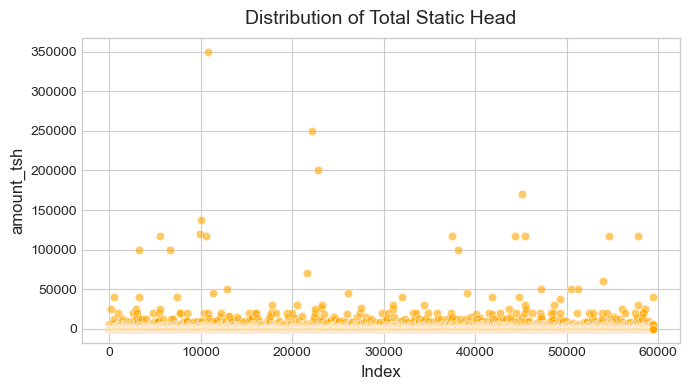

In [41]:
# Inspect 'amount_tsh'
print(f"Unique 'amount_tsh' values: {train_df['amount_tsh'].nunique()}")
print(f"\nAmount TSH values: \n{(train_df['amount_tsh'].unique())}")

# Get descriptive statistics
summary_stats = train_df['amount_tsh'].describe()
print("\nSummary Statistics for Total Static Head:")
print(summary_stats)

# Scatter plot of amount_tsh
plt.figure(figsize = (7, 4))
sns.scatterplot(
    x = range(len(train_df)), 
    y = 'amount_tsh', 
    data = train_df, 
    color = 'orange', 
    alpha = 0.6, 
    edgecolor = 'white'
)
plt.title('Distribution of Total Static Head', fontsize = 14, pad = 10)
plt.ylabel('amount_tsh', fontsize = 12)
plt.xlabel('Index', fontsize = 12)
plt.tight_layout()
plt.show()

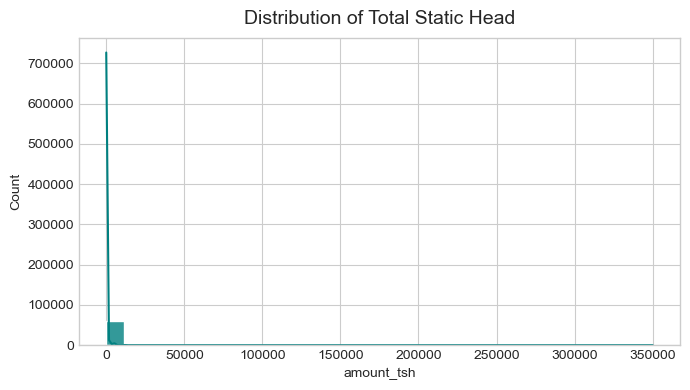

In [42]:
# Normality check
plt.figure(figsize = (7, 4))
sns.histplot(train_df['amount_tsh'], bins = 30, kde = True, color = 'teal', edgecolor = 'white', alpha = 0.8)
plt.title('Distribution of Total Static Head', fontsize = 14, pad = 10)
plt.tight_layout()
plt.show()

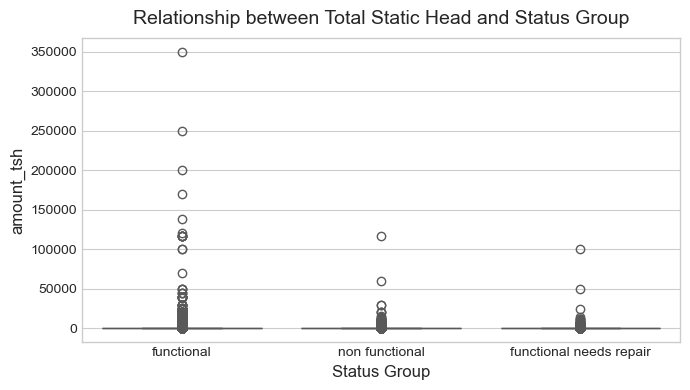

In [43]:
# Check it's relationship with the target
plt.figure(figsize = (7, 4))
sns.boxplot(x = 'status_group', y = 'amount_tsh', data = train_df, palette = 'Set2')
plt.title('Relationship between Total Static Head and Status Group', fontsize = 14, pad = 10)
plt.ylabel('amount_tsh', fontsize = 12)
plt.xlabel('Status Group', fontsize = 12)
plt.tight_layout()
plt.show()

*Observation:* amount_tsh is a heavily zero-inflated and outlier-ridden variable. Most wells have either no value recorded or very small values, while a tiny fraction contain implausibly large numbers. 

Upon checking for it's relationship with the target, we find it has no meaningful relationship. This column will thus be dropped

In [44]:
# Drop amount_tsh
train_df.drop(columns = ['amount_tsh'], inplace = True)
test_df.drop(columns = ['amount_tsh'], inplace = True)

#### 2. gps_height

Unique 'gps_height' values: 2428

GPS Height values: 
[1390 1399  686 ...  -90 2091 2366]

Descriptive Statistics for GPS Height:
count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64


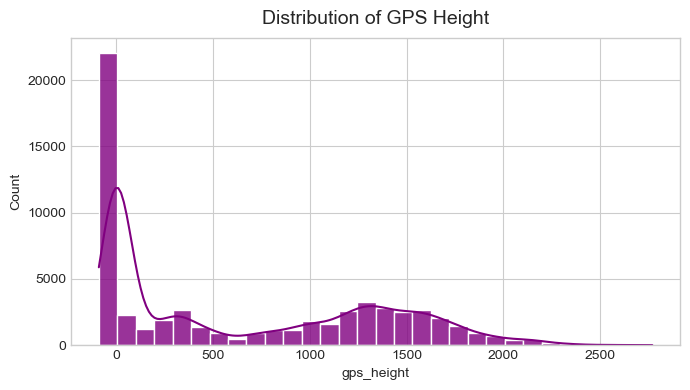

In [45]:
# Inspect 'gps_height'
print(f"Unique 'gps_height' values: {train_df['gps_height'].nunique()}")
print(f"\nGPS Height values: \n{(train_df['gps_height'].unique())}")

# Get descriptive statistics
gps_height_stats = train_df['gps_height'].describe()
print("\nDescriptive Statistics for GPS Height:")
print(gps_height_stats)

# Visualise this distribution
plt.figure(figsize = (7, 4))
sns.histplot(train_df['gps_height'], bins = 30, kde = True, color = 'purple', edgecolor = 'white', alpha = 0.8)
plt.title('Distribution of GPS Height', fontsize = 14, pad = 10) 
plt.tight_layout()
plt.show()     

In [46]:
# Quick peek at rows with negative gps_height
train_df[train_df['gps_height'] < 0].head()

,gps_height,installer,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_group,management_group,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
34,-41,OTHER,39.812912,-7.889986,Rufiji,Pwani,100,False,0,nira/tanira,user-group,never pay,salty,enough,shallow well,hand pump,functional
152,-15,Unknown,39.527114,-6.988748,Wami/Ruvu,Dar es Salaam,50,False,1970,mono,user-group,never pay,salty,dry,machine dbh,other,non functional
181,-21,OTHER,39.670943,-7.906606,Rufiji,Pwani,32,False,0,submersible,user-group,never pay,soft,enough,machine dbh,communal standpipe,functional
184,-16,OTHER,39.854320,-7.783063,Rufiji,Pwani,230,False,0,nira/tanira,user-group,never pay,salty,enough,shallow well,hand pump,functional
249,-19,OTHER,39.244178,-7.368293,Rufiji,Pwani,500,False,2007,swn 80,user-group,never pay,soft,dry,shallow well,hand pump,non functional


In [47]:
# Count negative gps_height values
neg_count = (train_df['gps_height'] < 0).sum()
total = train_df.shape[0]
perc = (neg_count / total) * 100

print(f"Negative gps_height values: {neg_count} ({perc:.2f}% of dataset)")

# Distribution by region
train_df[train_df['gps_height'] < 0]['region'].value_counts()

Negative gps_height values: 1496 (2.52% of dataset)


region
Pwani            721
Mtwara           249
Lindi            187
Dar es Salaam    180
Tanga            159
Name: count, dtype: int64

*Observations:*

- Range: Values span from −90 m to 2770 m. Tanzania’s geography supports elevations from sea level (0 m) up to approximately 5895 m at Kilimanjaro.  
- Negative values: Found 1,496 rows (2.52%), all clustered in coastal regions:  
  - Pwani (721)  
  - Mtwara (249)  
  - Lindi (187)  
  - Dar es Salaam (180)  
  - Tanga (159)  
  These negatives are small (e.g −15, −41) and occur only in low-lying coastal zones. They likely represent GPS error around sea level, not true below-sea-level terrain.  
- Zeros**: At least 25% of wells have gps_height = 0. While some are valid coastal wells, the sheer proportion is suspicious. Many are probably missing values encoded as 0.  
- Distribution: Median (369 m) vs mean (668 m) shows skew towards higher inland elevations. Standard deviation (693 m) reflects Tanzania’s diverse terrain.  
- Data quality flags:  
  - Negative values (GPS noise near the coast).  
  - Zeros (a mix of true sea-level wells and missing placeholders).  

*Cleanup Strategy:*

1. Negative values  
   - Recode all negatives (in coastal regions) as **0 (sea level)**.  
   - Justification: Tanzania has no land below sea level; these values are measurement noise around 0.  

2. Zeros 
   - Cross-check by region and coordinates.  
   - If gps_height = 0 and region is coastal we keep as valid.  
   - If gps_height = 0 and region is inland we treat as missing, mark as NaN.  

3. Imputation (optional)  
   - For inland missing values, impute using regional median elevation.  
   - This preserves geographic variation while fixing invalid entries.   

In [48]:
# Convert negative gps_height to 0
neg_count = (train_df['gps_height'] < 0).sum()
train_df.loc[train_df['gps_height'] < 0, 'gps_height'] = 0
print(f"Converted {neg_count} negative gps_height values to 0.")

# Drop inland zero gps_height values (retain coastal zeros)
coastal_regions = ["Pwani", "Dar es Salaam", "Lindi", "Mtwara", "Tanga", "Morogoro"]

# Count inland zero rows before dropping
inland_zero_count = ((train_df['gps_height'] == 0) & (~train_df['region'].isin(coastal_regions))).sum()
print(f"Inland zero gps_height rows to drop: {inland_zero_count}")

# Drop them directly
train_df = train_df[~((train_df['gps_height'] == 0) & (~train_df['region'].isin(coastal_regions)))]

# Confirm dataset shape
print(f"Remaining rows after cleanup: {train_df.shape[0]}")

# Sanity check - remaining zeros per region
zero_counts = train_df[train_df['gps_height'] == 0].groupby('region').size()
print("\nZero gps_height counts by region after cleanup:")
print(zero_counts)

Converted 1496 negative gps_height values to 0.
Inland zero gps_height rows to drop: 19668
Remaining rows after cleanup: 39732

Zero gps_height counts by region after cleanup:
region
Dar es Salaam    183
Lindi            191
Morogoro         244
Mtwara           251
Pwani            745
Tanga            652
dtype: int64


Do the same for test data to ensure it is also clean

In [49]:
# Do the same for test data
# Convert negative gps_height to 0
neg_count = (test_df['gps_height'] < 0).sum()
test_df.loc[test_df['gps_height'] < 0, 'gps_height'] = 0
print(f"Converted {neg_count} negative gps_height values to 0.")

# Drop inland zero gps_height values (retain coastal zeros)
coastal_regions = ["Pwani", "Dar es Salaam", "Lindi", "Mtwara", "Tanga", "Morogoro"]

# Count inland zero rows before dropping
inland_zero_count = ((test_df['gps_height'] == 0) & (~test_df['region'].isin(coastal_regions))).sum()
print(f"Inland zero gps_height rows to drop: {inland_zero_count}")

# Drop them directly
test_df = test_df[~((test_df['gps_height'] == 0) & (~test_df['region'].isin(coastal_regions)))]

# Confirm dataset shape
print(f"Remaining rows after cleanup: {test_df.shape[0]}")

# Sanity check - remaining zeros per region
zero_counts = test_df[test_df['gps_height'] == 0].groupby('region').size()
print("\nZero gps_height counts by region after cleanup:")
print(zero_counts)

Converted 385 negative gps_height values to 0.
Inland zero gps_height rows to drop: 5011
Remaining rows after cleanup: 9839

Zero gps_height counts by region after cleanup:
region
Dar es Salaam     47
Lindi             39
Morogoro          66
Mtwara            55
Pwani            210
Tanga            168
dtype: int64


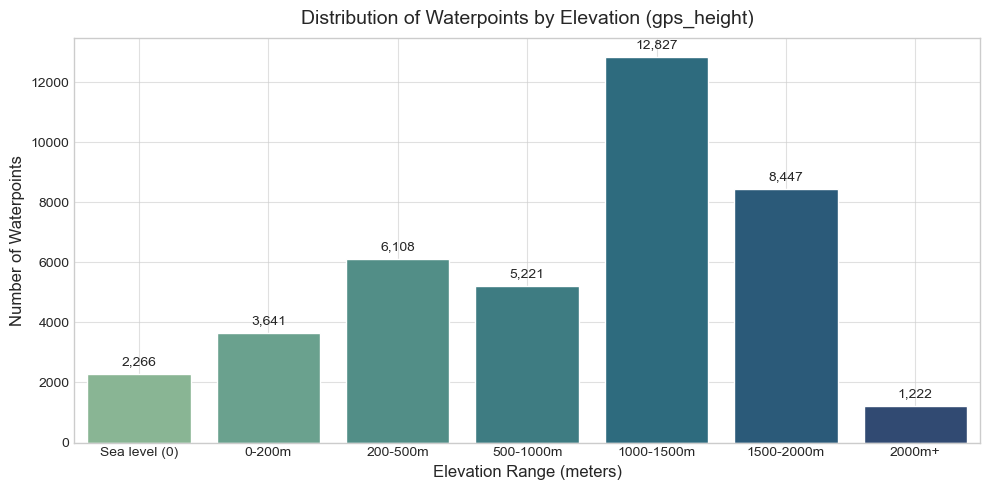

In [50]:
# Create a copy of the cleaned dataset
df = train_df.copy()

# Define bins and labels
bins = [-1, 0, 200, 500, 1000, 1500, 2000, 3000]
labels = ["Sea level (0)", "0-200m", "200-500m", "500-1000m", 
          "1000-1500m", "1500-2000m", "2000m+"]

df["gps_height_bin"] = pd.cut(df["gps_height"], bins=bins, labels=labels)

# Get counts
bin_counts = df["gps_height_bin"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=bin_counts.index,
    y=bin_counts.values,
    palette="crest",
    edgecolor="white"
)

# Add value labels on bars
for i, count in enumerate(bin_counts.values):
    ax.text(i, count + 200, f"{count:,}", ha="center", va="bottom", fontsize=10)

# Titles and labels
plt.title("Distribution of Waterpoints by Elevation (gps_height)", fontsize=14, pad = 10)
plt.xlabel("Elevation Range (meters)", fontsize=12)
plt.ylabel("Number of Waterpoints", fontsize=12)
plt.xticks(rotation=0)

# Grid styling
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

#### 3. Population

Unique 'population' values: 1049

Population values: 
[109 280 250 ... 845 976 788]

Summary Statistics for Population:
count    39732.000000
mean       268.968413
std        555.323006
min          0.000000
25%         25.000000
50%        150.000000
75%        300.000000
max      30500.000000
Name: population, dtype: float64


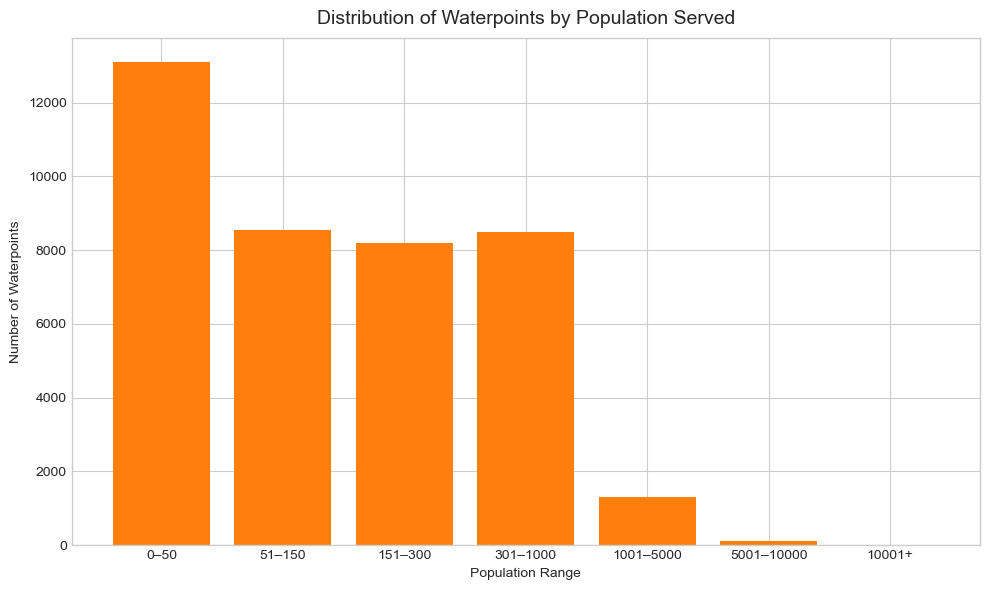

In [51]:
# Inspect 'population'
print(f"Unique 'population' values: {train_df['population'].nunique()}")
print(f"\nPopulation values: \n{(train_df['population'].unique())}")

# Get descriptive statistics
summary_stats = train_df['population'].describe()
print("\nSummary Statistics for Population:")
print(summary_stats)

# Visualise
# Make a copy
df_copy = train_df.copy()

# Define bins for population
bins = [0, 50, 150, 300, 1000, 5000, 10000, 30500]
labels = ["0–50", "51–150", "151–300", "301–1000", "1001–5000", "5001–10000", "10001+"]

# Bin population
df_copy["population_bin"] = pd.cut(df_copy["population"], bins=bins, labels=labels, include_lowest=True)

# Get value counts
popn_counts = df_copy["population_bin"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(popn_counts.index.astype(str), popn_counts.values, color = '#ff7f0e')
plt.title("Distribution of Waterpoints by Population Served", fontsize = 14, pad = 10)
plt.xlabel("Population Range")
plt.ylabel("Number of Waterpoints")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*Observation:* Population is complete, with no missing values. Its distribution is right-skewed, with a median of 150 and a mean of 269, while 75% of waterpoints serve 300 people or fewer. The values range from 0, which likely reflects abandoned or unused waterpoints, up to 30,500, representing large peri-urban or urban settlements. This feature carries strong analytical value since population directly reflects community size and service demand. Higher populations imply greater stress on waterpoints and an increased risk of breakdown, while zeros likely indicate disuse. 

#### 4. Longitude

=============== Longitude Summary ===============
count    39732.000000
mean        36.013867
std          2.555582
min         29.607122
25%         34.692020
50%         36.653585
75%         37.859554
max         40.345193
Name: longitude, dtype: float64

Rows with longitude = 0: 0

=============== Min/Max Longitude per Region ===============
                     min        max
region                             
Arusha         34.986908  37.402648
Dar es Salaam  39.039088  39.537132
Iringa         33.910329  36.522248
Kigoma         29.607122  31.195144
Kilimanjaro    36.923908  38.111964
Lindi          37.404880  39.963363
Manyara        34.871954  37.877825
Mara           33.207952  35.221310
Morogoro       35.365377  38.484931
Mtwara         38.013947  40.345193
Mwanza         32.843112  33.350897
Pwani          37.917781  39.878767
Rukwa          30.306693  32.492944
Ruvuma         34.597521  37.962002
Shinyanga      33.982075  34.398348
Singida        33.520271  35.344760
Tang

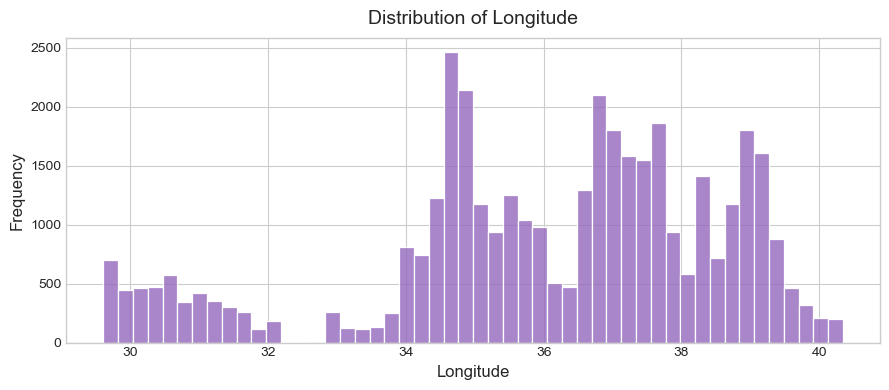

In [52]:
# Summary stats for longitude
print("=============== Longitude Summary ===============")
print(train_df['longitude'].describe())

# Check how many rows have longitude = 0
zero_long_count = (train_df['longitude'] == 0).sum()
print(f"\nRows with longitude = 0: {zero_long_count}")

# Min/Max longitude per region
print("\n=============== Min/Max Longitude per Region ===============")
print(train_df.groupby('region')['longitude'].agg(['min','max']))

# Histogram of longitude
plt.figure(figsize=(9, 4))
sns.histplot(train_df['longitude'], bins=50, color='#9467bd', alpha=0.8, edgecolor='white')
plt.title('Distribution of Longitude', fontsize=14, pad=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

*Observation:* The longitude values range from 29.61° to 40.35° with a mean of 36.01° and no missing or zero entries, indicating complete coverage. Regionally, western regions like Kigoma have the lowest longitudes, eastern regions like Dar es Salaam and Lindi have the highest, and most other regions fall between 34° and 38°, reflecting a realistic geographic spread across Tanzania.

#### 5. Latitude

=============== Latitude Summary ===============
count    39732.000000
mean        36.013867
std          2.555582
min         29.607122
25%         34.692020
50%         36.653585
75%         37.859554
max         40.345193
Name: longitude, dtype: float64

Rows with longitude = 0: 0

=============== Min/Max Latitude per Region ===============
                     min        max
region                             
Arusha         -3.766608  -1.822960
Dar es Salaam  -7.162921  -6.576367
Iringa        -10.524710  -7.128747
Kigoma         -5.416756  -2.861526
Kilimanjaro    -4.606940  -2.959012
Lindi         -10.639987  -8.284239
Manyara        -5.952854  -3.475012
Mara           -2.442619  -1.042375
Morogoro       -9.191424  -5.816946
Mtwara        -11.366974 -10.128340
Mwanza         -2.530601  -1.714486
Pwani          -8.477555  -5.990801
Rukwa          -8.990321  -5.502425
Ruvuma        -11.649440  -9.527207
Shinyanga      -3.075578  -2.855968
Singida        -6.947457  -3.962064
Tanga 

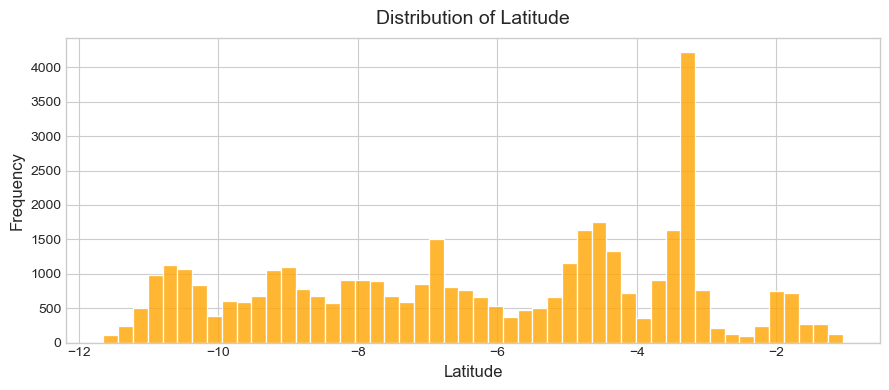

In [53]:
# Summary stats for longitude
print("=============== Latitude Summary ===============")
print(train_df['longitude'].describe())

# Check how many rows have longitude = 0
zero_long_count = (train_df['latitude'] == 0).sum()
print(f"\nRows with longitude = 0: {zero_long_count}")

# Min/Max longitude per region
print("\n=============== Min/Max Latitude per Region ===============")
print(train_df.groupby('region')['latitude'].agg(['min','max']))

# Histogram of longitude
plt.figure(figsize=(9, 4))
sns.histplot(train_df['latitude'], bins=50, color='orange', alpha=0.8, edgecolor='white')
plt.title('Distribution of Latitude', fontsize=14, pad=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

*Observation:* Latitude ranges from -11.65 to -1.04, with a mean of approximately -36.01 and a standard deviation of 2.56, indicating moderate dispersion. The column is also very clean.

Looking at the min/max latitude per region, the values align with Tanzania’s geography:
- Northern regions like Arusha, Kilimanjaro, and Mara have latitudes closer to the equator (-2 to -4 range).
- Southern regions like Ruvuma and Lindi extend further south (-9 to -11 range).
- Coastal regions like Dar es Salaam have latitudes around -6 to -7.

Overall, the latitude distribution appears geographically consistent and plausible, supporting spatial analyses without obvious outliers.

#### 6. construction_year

In [54]:
# Inspect 'construction_year'
print(f"Unique 'construction_year' values: {train_df['construction_year'].nunique()}")
print(f"\nConstruction Year values: \n{train_df['construction_year'].unique()}")

# Get descriptive statistics
construction_year_stats = train_df['construction_year'].describe()
print("\nDescriptive Statistics for Construction Year:")
print(construction_year_stats)

Unique 'construction_year' values: 55

Construction Year values: 
[1999 2010 2009 1986 2011 1987 1991 1978 1992 2008 1974 2000 2002 2004
 1972    0 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]

Descriptive Statistics for Construction Year:
count    39732.000000
mean      1944.497055
std        319.195105
min          0.000000
25%       1985.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64



Value Counts for Construction Year:
construction_year
0       1041
1960     102
1961      21
1962      30
1963      85
1964      40
1965      19
1966      17
1967      88
1968      77
1969      59
1970     411
1971     145
1972     708
1973     184
1974     676
1975     437
1976     414
1977     202
1978    1037
1979     192
1980     811
1981     238
1982     744
1983     488
1984     779
1985     945
1986     434
1987     302
1988     521
1989     316
1990     954
1991     324
1992     640
1993     608
1994     738
1995    1014
1996     811
1997     644
1998     966
1999     979
2000    2091
2001     540
2002    1075
2003    1286
2004    1123
2005    1011
2006    1471
2007    1587
2008    2613
2009    2533
2010    2645
2011    1256
2012    1084
2013     176
Name: count, dtype: int64


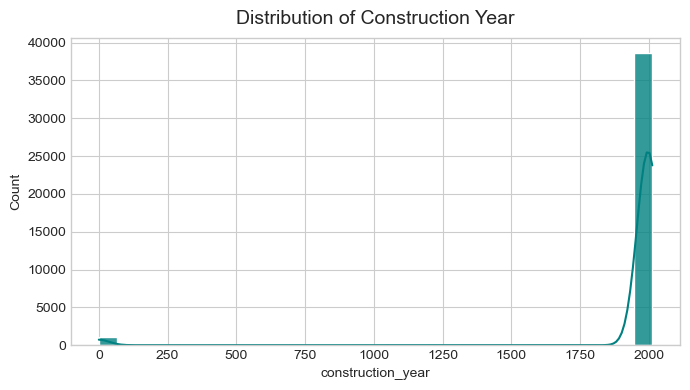

In [55]:
# Get value counts
print("\nValue Counts for Construction Year:")
print(train_df['construction_year'].value_counts().sort_index())

# Visualise this distribution
plt.figure(figsize=(7, 4))
sns.histplot(
    train_df['construction_year'], 
    bins=30, 
    kde=True, 
    color='teal', 
    edgecolor='white', 
    alpha=0.8
)
plt.title('Distribution of Construction Year', fontsize=14, pad=10)
plt.tight_layout()
plt.show()

In [56]:
# Copy dataset
df = train_df.copy()

# Define bins (including 0 for unknown)
bins = [0, 1979, 1999, 2013]   # 0 is special, rest are ranges
labels = ["Unknown", "1960-1979", "1980-1999", "2000-2013"]

# Create binned feature
df['construction_year_binned'] = pd.cut(
    df['construction_year'],
    bins=[-1, 0, 1979, 1999, 2013], 
    labels=labels
)

print(df['construction_year_binned'].value_counts())

construction_year_binned
2000-2013    20491
1980-1999    13256
1960-1979     4944
Unknown       1041
Name: count, dtype: int64


### CATEGORICAL FEATURES

#### 1. status_group

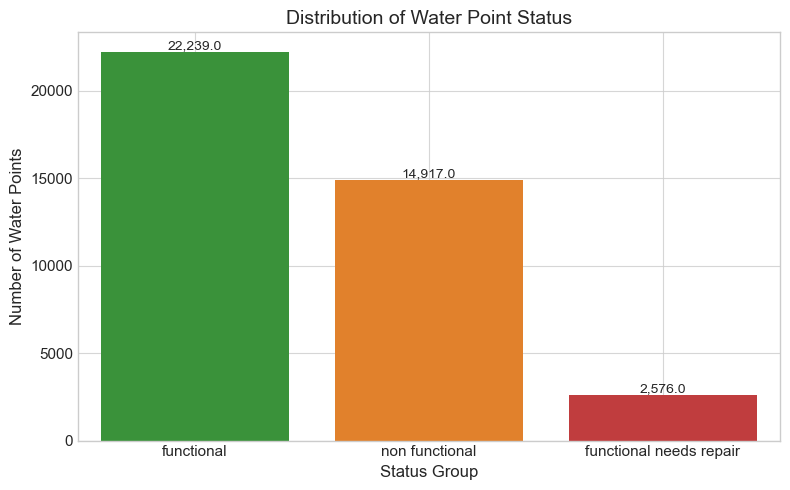

In [57]:
# Color palette
colors = ['#2ca02c', '#ff7f0e', '#d62728'] 

# Create bar chart
plt.figure(figsize=(8,5))
sns.countplot(
    data=train_df, 
    x='status_group', 
    order=train_df['status_group'].value_counts().index, 
    palette=colors
)

# Add title and labels
plt.title("Distribution of Water Point Status", fontsize=14)
plt.xlabel("Status Group", fontsize=12)
plt.ylabel("Number of Water Points", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Annotate bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
    
plt.grid(axis='both', alpha = 0.8)
plt.tight_layout()
plt.show()

*Observation:* The majority of water points are functional (22,239). A significant portion is non-functional (14,917), indicating maintenance or infrastructure challenges. Only a small fraction, 2,576 water points, are functional but need repair, suggesting that most issues are severe enough to render the system completely non-operational rather than partially functional.

#### 2. installer

Top 20 installers:
installer
OTHER                 16575
DWE                   11342
DANIDA                 1332
Community              1328
Government             1165
RWE                    1089
District Council       1031
Fini Water              952
Unknown                 780
TCRS                    650
CES                     610
HESAWA                  473
RC Church               417
LGA                     408
Villagers               349
Jaica                   311
TASAF                   257
Central Government      254
World Vision            248
KKKT                    158
Name: count, dtype: int64


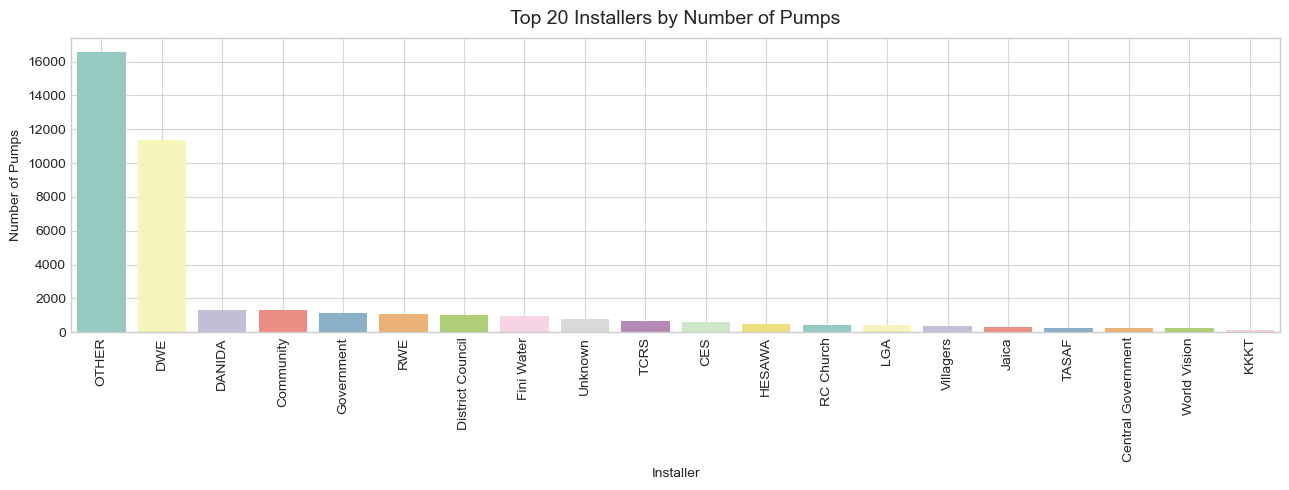

In [58]:
# Get top 20 installers
top_installers = df['installer'].value_counts().head(20)
print("Top 20 installers:")
print(top_installers)

plt.figure(figsize=(13,5))
sns.barplot(x=top_installers.index, y=top_installers.values, palette="Set3")

plt.xticks(rotation=90)
plt.ylabel("Number of Pumps")
plt.xlabel("Installer")
plt.title("Top 20 Installers by Number of Pumps", fontsize = 14, pad = 10)
plt.grid(axis = 'both', alpha = 0.8)
plt.tight_layout()
plt.show()

*Observation:* The installer variable is dominated by a few key entities. The top 20 installers account for a significant portion of installations, with “Other Installers” and “Dwe” together representing nearly half of all records. A notable number of entries are “Unknown” (2,337), highlighting some missing or unrecorded data. Beyond the top few, the counts drop sharply, indicating that most installers handle relatively few projects.

#### 3. basin

Unique 'basin' values: 9

Basin values: 
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma/Southern Coast'
 'Wami/Ruvu' 'Lake Tanganyika' 'Rufiji' 'Internal' 'Lake Rukwa'] 

Basin Counts:
basin
Pangani                  8940
Rufiji                   6831
Wami/Ruvu                4972
Internal                 4676
Ruvuma/Southern Coast    4493
Lake Tanganyika          3621
Lake Nyasa               2655
Lake Victoria            2532
Lake Rukwa               1012
Name: count, dtype: int64


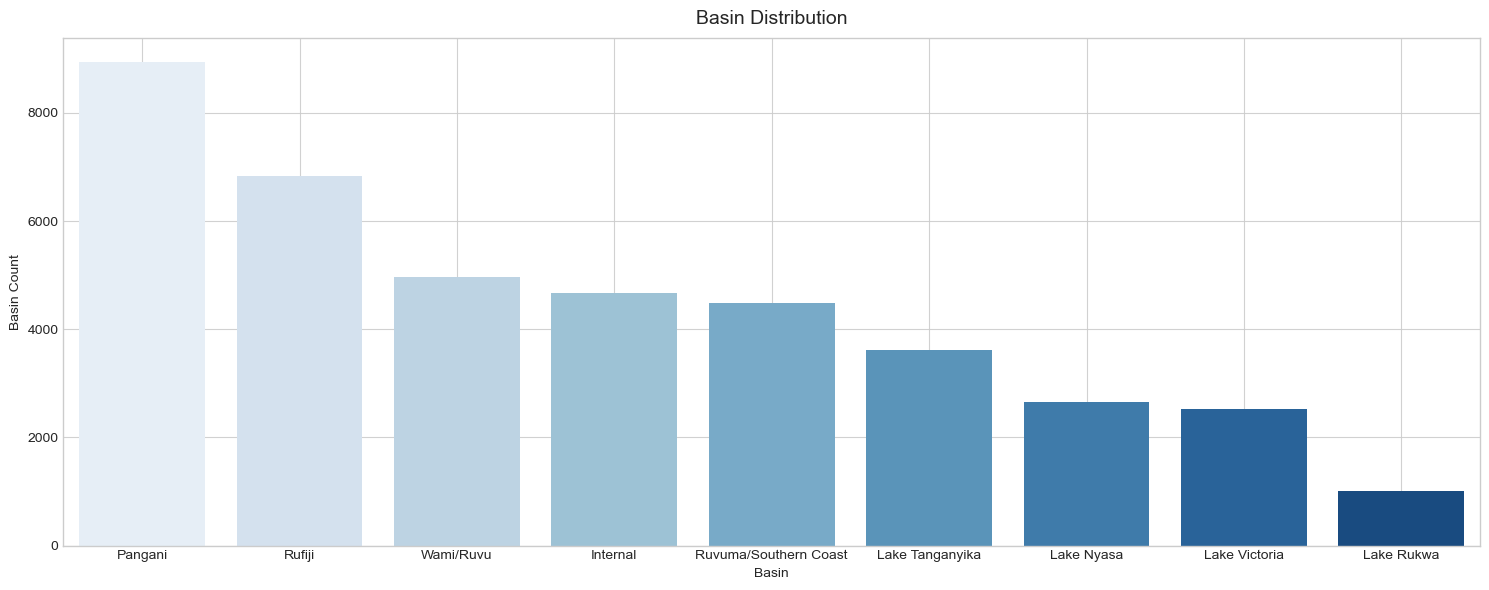

In [59]:
# Get unique values
print(f"Unique 'basin' values: {train_df['basin'].nunique()}")
print(f"\nBasin values: \n{(train_df['basin'].unique())} \n")

# Get value counts
basin_count = df['basin'].value_counts()
print("Basin Counts:")
print(basin_count)

plt.figure(figsize=(15, 6))
sns.barplot(x=basin_count.index, y=basin_count.values, palette="Blues")

plt.xticks(rotation=0)
plt.ylabel("Basin Count")
plt.xlabel("Basin")
plt.title("Basin Distribution", fontsize = 14, pad = 10)
plt.grid(axis='both', alpha = 0.9)
plt.tight_layout()
plt.show()

*Observation:* 
- There are 9 unique basin values, representing major river basins and lakes in Tanzania. 
- Pangani is the most common basin, with 8,940 water points, followed by Rufiji (6,831) and Wami/Ruvu (4,972). 
- Internal and Ruvuma/Southern Coast also have substantial representation, while Lake Rukwa has the fewest water points (1,012).

The distribution is skewed, with a few basins (Pangani, Rufiji, Wami/Ruvu) containing the majority of water points, reflecting either population density or water accessibility patterns in Tanzania.

#### 4. region

Unique 'region' values: 17

Region values: 
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Tanga' 'Pwani' 'Ruvuma' 'Kilimanjaro'
 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Arusha' 'Singida' 'Morogoro'
 'Dar es Salaam' 'Shinyanga'] 

Number of water points per region:
region
Iringa           5294
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Singida          2093
Mara             1969
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Mwanza            367
Shinyanga         164
Name: count, dtype: int64


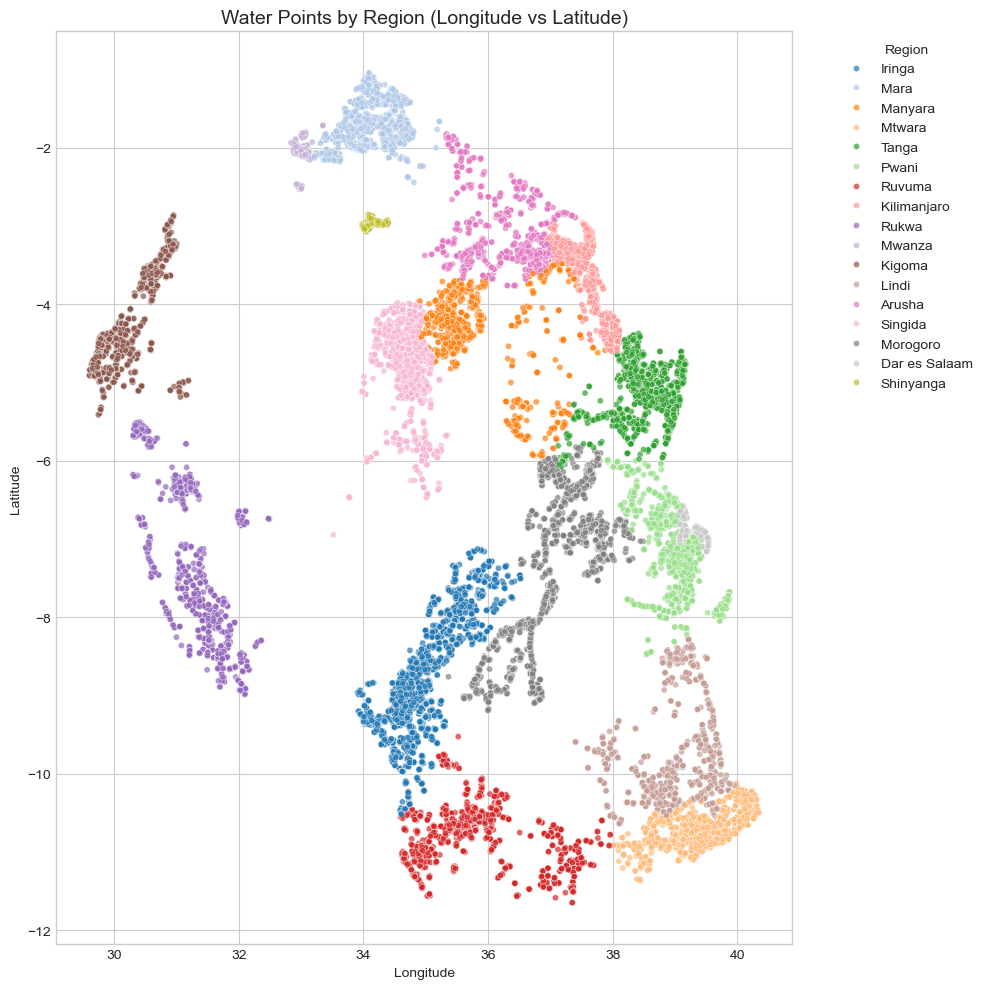

In [60]:
# Get unique values
print(f"Unique 'region' values: {train_df['region'].nunique()}")
print(f"\nRegion values: \n{(train_df['region'].unique())} \n")

# Get value counts
region_counts = train_df['region'].value_counts()
print("Number of water points per region:")
print(region_counts)

# Plot map
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=train_df,
    x='longitude',
    y='latitude',
    hue='region',         
    palette='tab20',     
    s=20,                
    alpha=0.7              
)
plt.title('Water Points by Region (Longitude vs Latitude)', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title = 'Region', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()

*Observation:* 
- There are over 17 regions across Tanzania, representing a broad geographic spread from northern (Kilimanjaro, Arusha) to southern regions (Ruvuma, Lindi) and coastal areas (Pwani, Dar es Salaam). 
- Iringa has the highest number of water points (5,294), followed by Kilimanjaro (4,379) and Morogoro (4,006), suggesting higher water point density in these areas. 
- Regions such as Dar es Salaam (805), Mwanza (367), and Shinyanga (164) have comparatively fewer water points, indicating either smaller coverage, urban concentration, or data collection differences.

The distribution is skewed, with a few regions containing the majority of water points, which may reflect population density, accessibility, or reporting patterns.

#### 5. permit

Permit distribution:
permit
True       26911
False      10871
Unknown     1950
Name: count, dtype: int64


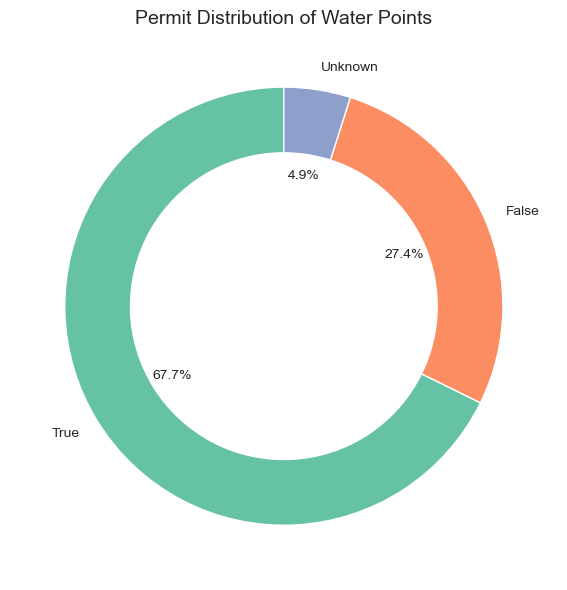

In [61]:
# Get value counts
permit_counts = train_df['permit'].value_counts()
print("Permit distribution:")
print(permit_counts)

# Donut chart
plt.figure(figsize=(6,6))
colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854'] 

plt.pie(
    permit_counts,
    labels=permit_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width':0.3, 'edgecolor':'white'}
)

plt.title('Permit Distribution of Water Points', fontsize=14)
plt.tight_layout()
plt.show()

*Observation:*
- True (permitted) water points dominate, with 26,911 entries, representing the majority of the dataset.
- False (not permitted) water points are fewer, totaling 10,871.
- A smaller portion, 1,950 water points, have an Unknown permit status.

The distribution is highly skewed toward permitted water points, which may reflect regulatory compliance or reporting practices.

#### 6 extraction_type_group

Water points per extraction type group:
extraction_type_group
gravity           20278
submersible        5199
other              3985
nira/tanira        2869
swn 80             2375
india mark ii      1698
mono               1565
afridev            1004
rope pump           393
handpump            231
india mark iii       63
wind-powered         63
motorpump             9
Name: count, dtype: int64


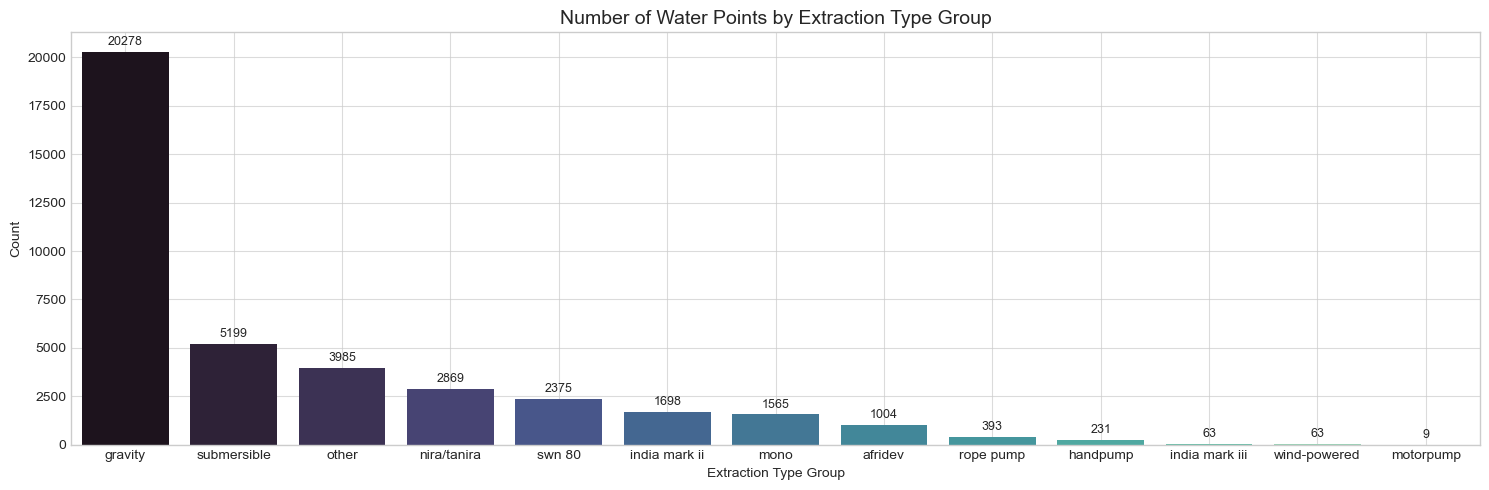

In [62]:
# Get counts 
extraction_counts = train_df['extraction_type_group'].value_counts()
print("Water points per extraction type group:")
print(extraction_counts)

# Plot bar chart
plt.figure(figsize=(15, 5))
sns.countplot(
    data=train_df,
    x='extraction_type_group',
    order=extraction_counts.index,
    palette='mako'
)
plt.title('Number of Water Points by Extraction Type Group', fontsize=14)
plt.xlabel('Extraction Type Group')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

# Annotate bars
for i, v in enumerate(extraction_counts.values):
    plt.text(i, v + max(extraction_counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=9)

plt.grid(axis = 'both', alpha = 0.7)
plt.tight_layout()
plt.show()

*Observation:*
- There are 12 unique extraction type groups, representing the technology used to extract water from wells or pumps.
- Gravity-fed systems dominate, with 20,278 water points, making up the majority of the dataset.
- Submersible pumps (5,199) and other types (3,985) are also significant contributors.
- Smaller groups include nira/tanira (2,869), swn 80 (2,375), and india mark ii (1,698).
- Very few water points use specialized or less common extraction types such as india mark iii (63), wind-powered (63), or motorpump (9).

Overall, the distribution is heavily skewed toward gravity systems, with a long tail of less common extraction types.

#### 7. management

Unique 'management_group' values: 5

Management values: 
['user-group' 'commercial' 'other' 'parastatal' 'unknown'] 

management_group
user-group    34548
commercial     2981
parastatal     1110
other           707
unknown         386
Name: count, dtype: int64


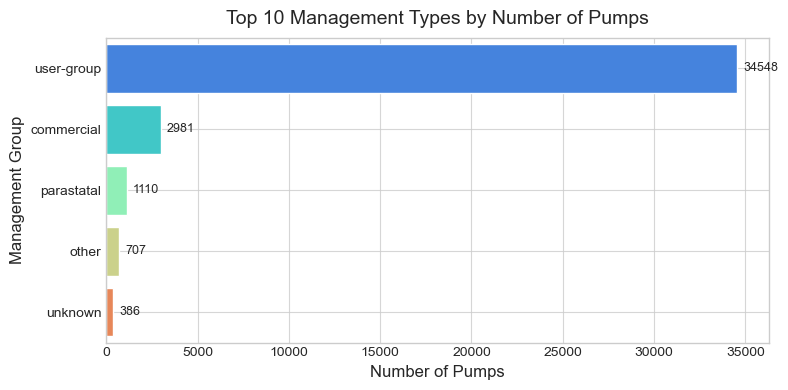

In [63]:
# Get unique values
print(f"Unique 'management_group' values: {train_df['management_group'].nunique()}")
print(f"\nManagement values: \n{(train_df['management_group'].unique())} \n")

# Get the top 10 management types
top_mgmt = train_df['management_group'].value_counts().head(10)
print(top_mgmt)

# Plot
plt.figure(figsize= (8, 4))
sns.barplot(
    x=top_mgmt.values, 
    y=top_mgmt.index, 
    palette="rainbow",      
    edgecolor='white'
)

plt.title("Top 10 Management Types by Number of Pumps", fontsize=14, pad=10)
plt.xlabel("Number of Pumps", fontsize=12)
plt.ylabel("Management Group", fontsize=12)

# Add values on the bars for clarity
for i, v in enumerate(top_mgmt.values):
    plt.text(v + max(top_mgmt.values)*0.01, i, str(v), va='center', fontsize=9)

plt.grid(axis = 'both', alpha = 0.8)
plt.tight_layout()
plt.show()

*Observation:*
- There are 12 unique management types, describing how each water point is administered or maintained.
- Village Water Committees (vwc) dominate by far, managing 27,273 water points, which is the vast majority of the dataset.
- Other notable management types include Water Boards (2,783), WUGs (Water User Groups) (2,273), and WUAs (Water Users Associations) (2,219).
- Smaller categories include private operators (1,645), parastatals (1,110), and companies (670).
- A few water points fall under other, unknown, or specialized categories (schools, trusts, water authority), each with fewer than 600 points.

Overall, the distribution is highly skewed toward community-based management (vwc), reflecting Tanzania’s reliance on local water committees for water point administration.

#### 8. payment_type

Unique 'payment_type' values: 7

Payment Type values: 
['annually' 'never pay' 'per bucket' 'on failure' 'monthly' 'unknown'
 'other'] 

payment_type
never pay     14340
per bucket     7162
monthly        7161
unknown        5169
annually       3116
on failure     2391
other           393
Name: count, dtype: int64


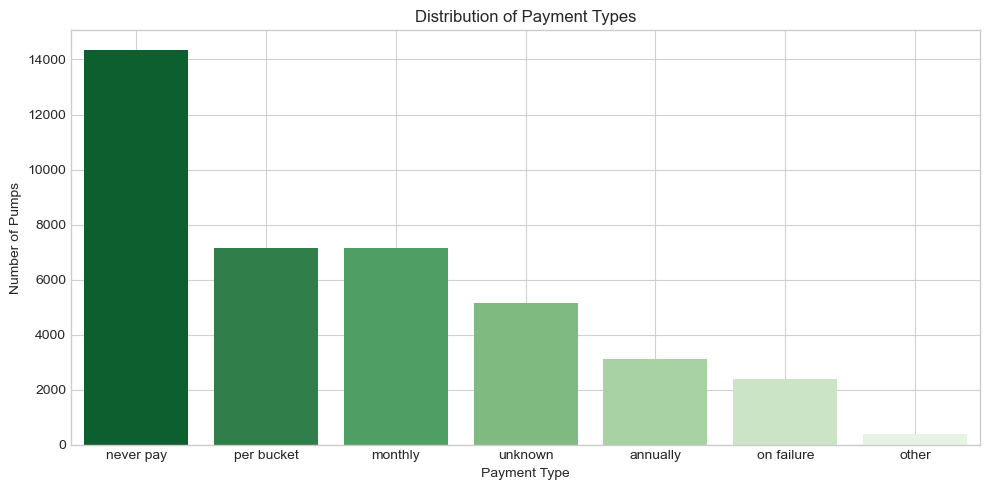

In [64]:
# Get unique values
print(f"Unique 'payment_type' values: {train_df['payment_type'].nunique()}")
print(f"\nPayment Type values: \n{(train_df['payment_type'].unique())} \n")

# Get Value counts
print(train_df['payment_type'].value_counts())
payment_counts = train_df['payment_type'].value_counts()

# Visualise
plt.figure(figsize=(10, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Greens_r")

# Labels
plt.xticks(rotation=0)
plt.ylabel("Number of Pumps")
plt.xlabel("Payment Type")
plt.title("Distribution of Payment Types")
plt.grid(axis='both', alpha = 0.9)
plt.tight_layout()
plt.show()

*Observation:*
- There are 7 unique payment types, indicating how users contribute financially for water services.
- "Never pay" is the most common category, with 14,340 water points, showing that a significant portion of water points operate without direct user payments.
- Other frequently observed types are per bucket (7,162) and monthly (7,161), reflecting usage-based or regular payment schemes.
- A notable number of water points (5,169) have unknown payment status, highlighting data gaps.
- Less common categories include annually (3,116), on failure (2,391), and other (393).

Overall, the distribution is skewed toward non-paying and small-scale payment schemes, which may have implications for maintenance, sustainability, and funding models.

#### 9. water_quality

Unique 'water_quality' values: 8

Water Quality values: 
['soft' 'salty' 'milky' 'unknown' 'fluoride' 'salty abandoned' 'coloured'
 'fluoride abandoned'] 

water_quality
soft                  34291
salty                  3448
unknown                1273
coloured                233
salty abandoned         170
fluoride                167
milky                   141
fluoride abandoned        9
Name: count, dtype: int64


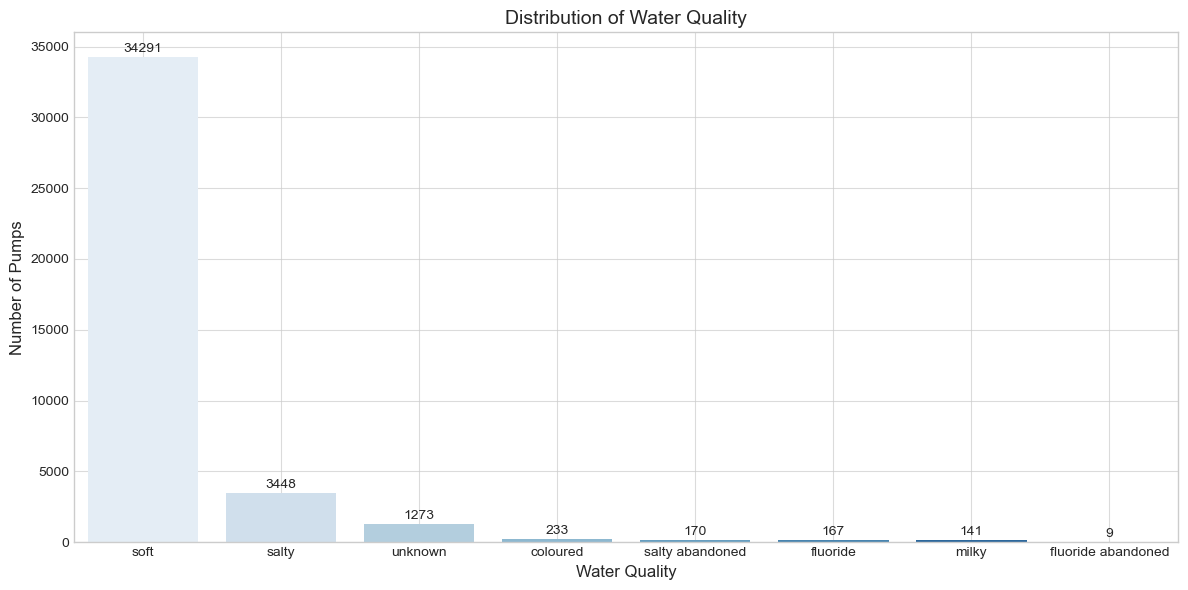

In [65]:
# Get unique values
print(f"Unique 'water_quality' values: {train_df['water_quality'].nunique()}")
print(f"\nWater Quality values: \n{(train_df['water_quality'].unique())} \n")

# Get counts
water_quality_counts = train_df['water_quality'].value_counts()
print(water_quality_counts)

# Vertical bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    x=water_quality_counts.index,
    y=water_quality_counts.values,
    palette='Blues'
)

# Labels and title
plt.xlabel("Water Quality", fontsize=12)
plt.ylabel("Number of Pumps", fontsize=12)
plt.title("Distribution of Water Quality", fontsize=14)

# Add values on top of bars
for i, v in enumerate(water_quality_counts.values):
    plt.text(i, v + max(water_quality_counts.values)*0.01, str(v), ha='center', fontsize=10)

# Show gridlines on y-axis only
plt.grid(axis='both', alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*Observation:*
- The dataset contains 8 unique water quality types, capturing both the chemical and physical characteristics of water points.
- Soft water dominates by far, with 34,291 water points, representing the majority of the dataset.
- Other common qualities include salty (3,448) and unknown (1,273).
- Minor categories include coloured (233), salty abandoned (170), fluoride (167), milky (141), and fluoride abandoned (9).

Overall, the distribution is highly skewed toward soft and potable water, with very few water points reporting extreme or abandoned conditions.

#### 10. quantity

Unique 'quantity' values: 5

Quantity values: 
['enough' 'insufficient' 'dry' 'seasonal' 'unknown']

Water points per quantity category:
quantity
enough          22939
insufficient    10690
dry              3563
seasonal         1993
unknown           547
Name: count, dtype: int64


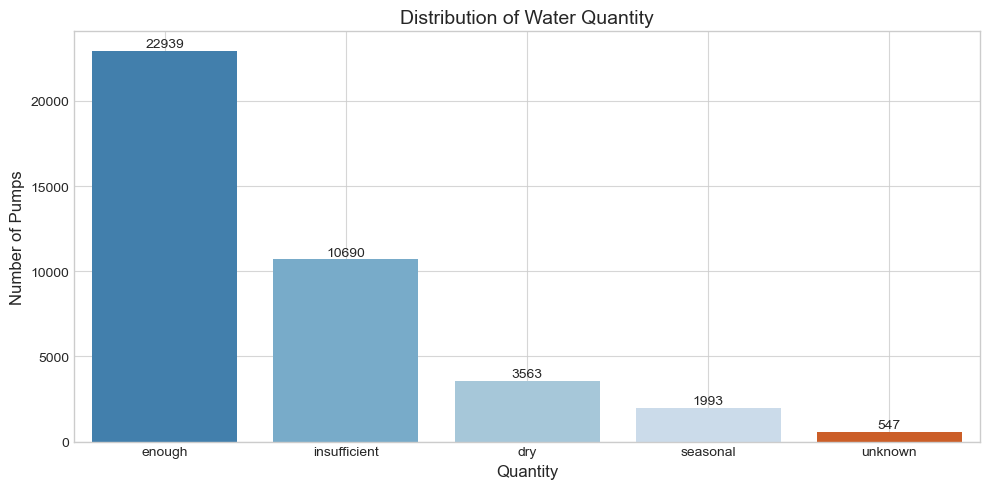

In [66]:
# Get unique values
print(f"Unique 'quantity' values: {train_df['quantity'].nunique()}")
print(f"\nQuantity values: \n{(train_df['quantity'].unique())}")

# Get counts
quantity_counts = train_df['quantity'].value_counts()
print("\nWater points per quantity category:")
print(quantity_counts)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    x=quantity_counts.index,
    y=quantity_counts.values,
    palette='tab20c'
)

# Labels and title
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Number of Pumps", fontsize=12)
plt.title("Distribution of Water Quantity", fontsize=14)

# Add values on top of bars
for i, v in enumerate(quantity_counts.values):
    plt.text(i, v + max(quantity_counts.values)*0.01, str(v), ha='center', fontsize=10)

plt.grid(axis='both', alpha=0.8)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*Observation:*
- The dataset contains 5 unique water quantity categories, representing the availability of water at each point.
- “Enough” is the most common category, with 22,939 water points, indicating adequate water supply at most sites.
- “Insufficient” water points are fewer but still substantial (10,690), highlighting areas with limited supply.
- Smaller categories include dry (3,563), seasonal (1,993), and unknown (547).

Overall, the distribution is skewed toward sufficient water supply, though a significant portion of points face quantity challenges, which may affect usability and community reliance.

#### 11. source

Unique 'source' values: 10

Source values: 
['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']

Water points per source:
source
spring          12874
shallow well     8090
machine dbh      7965
river            7882
rainwater        1279
hand dtw          666
lake              448
dam               291
other             184
unknown            53
Name: count, dtype: int64


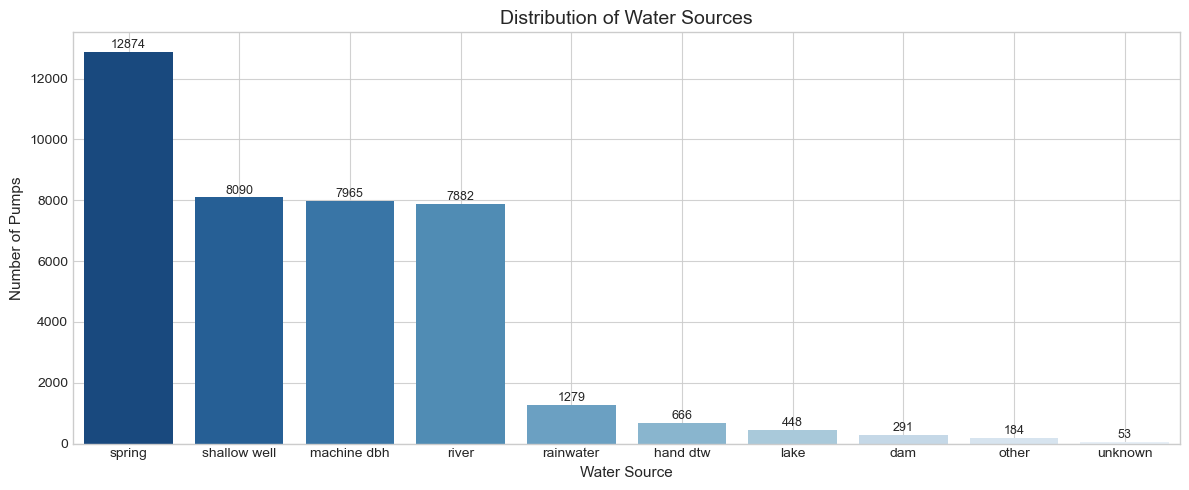

In [67]:
# Get unique values
print(f"Unique 'source' values: {train_df['source'].nunique()}")
print(f"\nSource values: \n{(train_df['source'].unique())}")

# Rename rainwater harvesting to rainwater
train_df['source'] = train_df['source'].replace({
    'rainwater harvesting': 'rainwater'
})

# Get counts
source_counts = train_df['source'].value_counts()
print("\nWater points per source:")
print(source_counts)

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.barplot(
    x=source_counts.index,
    y=source_counts.values,
    palette='Blues_r'
)

# Labels and title
plt.xlabel("Water Source", fontsize=11)
plt.ylabel("Number of Pumps", fontsize=11)
plt.title("Distribution of Water Sources", fontsize=14)

# Add values on top of bars
for i, v in enumerate(source_counts.values):
    plt.text(i, v + max(source_counts.values)*0.01, str(v), ha='center', fontsize=9)

plt.grid(axis='both', alpha=0.9)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


*Observation:*
- The dataset contains 10 unique water sources, representing the origin of water for each water point.
- Springs are the most common source, with 12,874 water points, followed by shallow wells (8,090) and machine-driven boreholes (machine dbh) (7,965).
- Rivers also supply a substantial number of points (7,882).
- Less common sources include rainwater harvesting (1,279), hand-dug wells (hand dtw, 666), lakes (448), dams (291), other sources (184), and unknown (53).

Overall, the distribution is skewed toward natural springs, shallow wells, and boreholes, reflecting the most common water extraction practices in Tanzania.

#### 12. waterpoint_type_group

Unique 'waterpoint_type_group' values: 6

Waterpoint Type Group values: 
['communal standpipe' 'other' 'hand pump' 'improved spring'
 'cattle trough' 'dam']

Water Point Groups:
waterpoint_type_group
communal standpipe    26133
hand pump              9084
other                  4050
improved spring         368
cattle trough            91
dam                       6
Name: count, dtype: int64


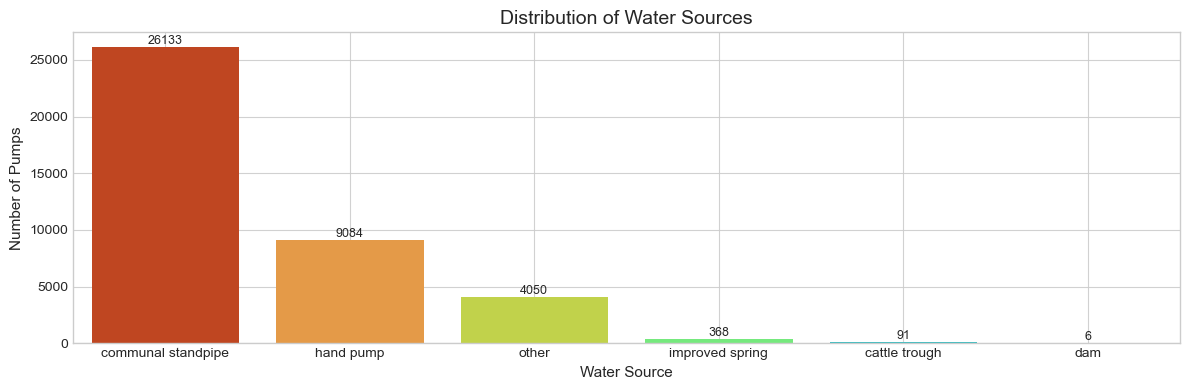

In [68]:
# Get unique values
print(f"Unique 'waterpoint_type_group' values: {train_df['waterpoint_type_group'].nunique()}")
print(f"\nWaterpoint Type Group values: \n{(train_df['waterpoint_type_group'].unique())}")

# Get counts
wpt_counts = train_df['waterpoint_type_group'].value_counts()
print("\nWater Point Groups:")
print(wpt_counts)

# Plot bar chart
plt.figure(figsize=(12, 4))
sns.barplot(
    x=wpt_counts.index,
    y=wpt_counts.values,
    palette='turbo_r'
)

# Labels and title
plt.xlabel("Water Source", fontsize=11)
plt.ylabel("Number of Pumps", fontsize=11)
plt.title("Distribution of Water Sources", fontsize=14)

# Add values on top of bars
for i, v in enumerate(wpt_counts.values):
    plt.text(i, v + max(wpt_counts.values)*0.01, str(v), ha='center', fontsize=9)

plt.grid(axis='both', alpha=0.9)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


*Observation:*
- There are 6 unique water point groups, representing the type of infrastructure used for water access.
- Communal standpipes dominate the dataset, with 26,133 water points, reflecting the widespread use of shared access points.
- Hand pumps are the second most common, with 9,084 water points, followed by other types (4,050).
- Less common groups include improved springs (368), cattle troughs (91), and dams (6), indicating specialized or rare waterpoint types.

The distribution is heavily skewed toward communal and hand-operated water points, highlighting the reliance on community-based water infrastructure.

### BIVARIATE ANALYSIS

In this section, we explore relationships between water well functionality (status_group) and other key features in the dataset. The goal is to identify patterns, trends, and interactions that can help explain why some wells are functional, functional but need repair, or non-functional, providing actionable insights for policymakers, NGOs, and maintenance planners.

Bivariate analysis focuses on two variables at a time, typically a feature and the target (status_group), to understand their direct relationship. This includes:

- Categorical vs Target: Examining how well functionality varies across categories such as extraction_type_group, management_group, waterpoint_type_group, source, and region.

- Numerical vs Target: Exploring how numeric variables like construction_year, population, gps_height, latitude, and longitude influence functionality.

Bivariate analysis helps highlight individual drivers of well failure or success, providing a foundation for deeper multivariate insights.

#### 1. How does extraction type affect the status of water wells?


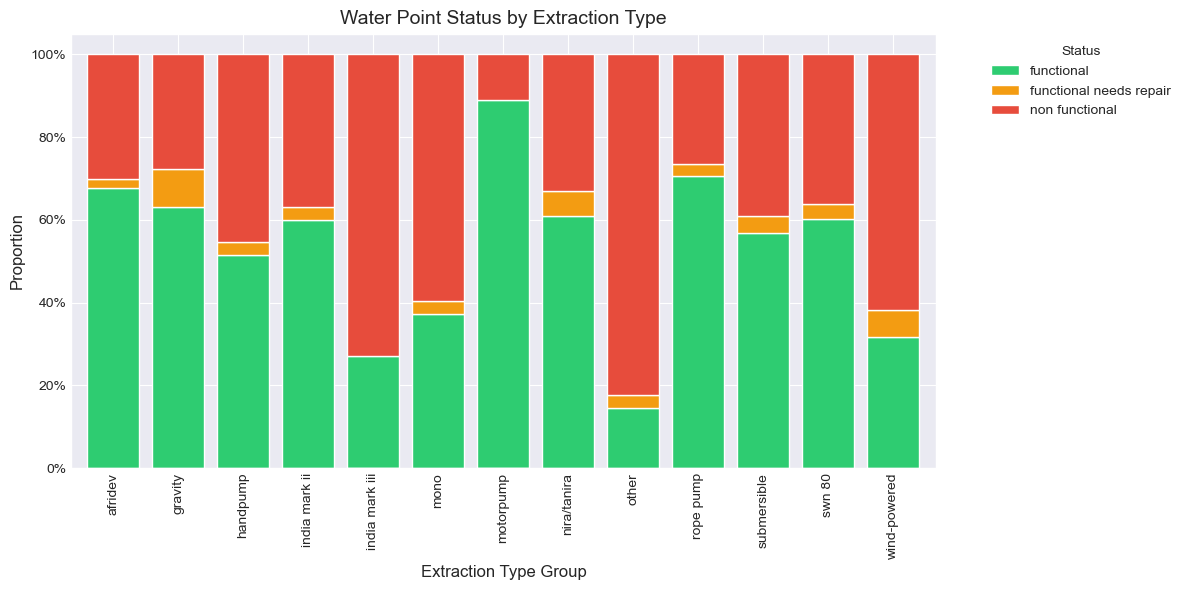

Distribution of Water Point Status by Extraction Type:
status_group           functional  functional needs repair  non functional
extraction_type_group                                                     
afridev                     67.6%                     2.3%           30.1%
gravity                     63.1%                     9.0%           27.8%
handpump                    51.5%                     3.0%           45.5%
india mark ii               60.0%                     3.2%           36.9%
india mark iii              27.0%                     0.0%           73.0%
mono                        37.3%                     3.1%           59.6%
motorpump                   88.9%                     0.0%           11.1%
nira/tanira                 61.0%                     6.0%           33.0%
other                       14.6%                     3.0%           82.4%
rope pump                   70.5%                     3.1%           26.5%
submersible                 56.7%            

In [69]:
# Create stacked bar plot
df_plot = train_df.copy()
cross_tab = pd.crosstab(df_plot['extraction_type_group'], df_plot['status_group'], normalize='index')

# Set style
sns.set_style('darkgrid')

# Create plot with clean aesthetics
fig, ax = plt.subplots(figsize=(12, 6))

# Color map
colors = ['#2ECC71', '#F39C12', '#E74C3C'] 

# Create the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8, edgecolor='white')

# Clean styling
ax.set_title('Water Point Status by Extraction Type', fontsize=14, pad=7)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_xlabel('Extraction Type Group', fontsize=12)

# Format y axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Clean up appearance
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print the distribution
print("Distribution of Water Point Status by Extraction Type:")
print("=" * 80)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

Analyzing water wells by their extraction type reveals striking differences in reliability:
- Highly reliable types:
    - Motorpump (88.9% functional) and Rope Pump (70.5% functional) show the highest functionality rates. These systems are more robust and less prone to breakdowns.
    - Afridev (67.6% functional) and Gravity systems (63.1% functional) also perform well, indicating simpler or well-maintained mechanisms can sustain functionality.

- Moderately reliable types:
    - Submersible (56.7%), India Mark II (60%), and SWN 80 (60.3%) show decent performance but a noticeable fraction of wells still fail or need repairs.

- Low reliability types:
    - India Mark III (27% functional), Mono (37.3%), Other (14.6%), and Wind-powered (31.7%) wells are mostly non-functional. These types either require high maintenance, are outdated, or are poorly adapted to local conditions.

Key takeaway: Extraction type strongly influences well functionality. Investing in motorpumps, Afridev, rope pumps, or gravity-fed systems can maximize sustainable water access, whereas older or complex systems like India Mark III and Mono pumps are riskier.

#### 2. Are certain waterpoint_type_group types (e.g communal standpipes vs hand pumps) more prone to failure?

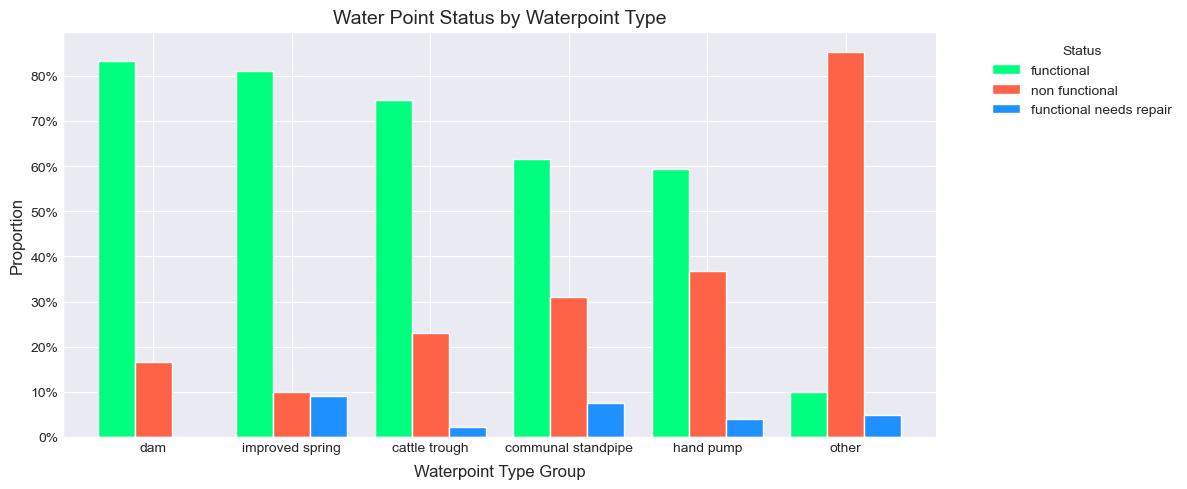

Distribution of Water Point Status by Waterpoint Type:
status_group           functional  non functional  functional needs repair
waterpoint_type_group                                                     
dam                         83.3%           16.7%                     0.0%
improved spring             81.0%           10.1%                     9.0%
cattle trough               74.7%           23.1%                     2.2%
communal standpipe          61.5%           30.9%                     7.6%
hand pump                   59.3%           36.7%                     4.0%
other                        9.9%           85.3%                     4.8%


In [70]:
# Work on a copy
df_plot = train_df.copy()

# Compute normalized proportions and sort by functional percentage
cross_tab = pd.crosstab(df_plot['waterpoint_type_group'], df_plot['status_group'], normalize='index')
cross_tab = cross_tab.sort_values('functional', ascending=False)

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]

# Set seaborn style
sns.set_style("darkgrid")

# Create plot with clean aesthetics
fig, ax = plt.subplots(figsize=(12, 5))

# Beautiful, bright colors
colors = ['#00FF7F', '#FF6347', '#1E90FF'] 

# Create the grouped bar chart
cross_tab.plot(kind='bar', stacked=False, ax=ax, color=colors, width=0.8)

# Clean styling
ax.set_title('Water Point Status by Waterpoint Type', fontsize=14, pad=7)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_xlabel('Waterpoint Type Group', fontsize=12, labelpad = 7)

# Format as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Clean up appearance
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Waterpoint Type:")
print("=" * 80)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*
The functionality of water wells varies significantly across waterpoint types:

- Highly reliable types:
    - Dam (83.3% functional), Improved Spring (81%), and Cattle Trough (74.7%) exhibit the highest functionality. These are likely larger, centrally managed, or naturally resilient sources, which require less frequent mechanical maintenance.

- Moderately reliable types:
    - Communal Standpipes (61.5% functional) and Hand Pumps (59.3%) are moderately functional but still show a notable portion of wells failing (30.9% and 36.7%, respectively). These systems often depend on local maintenance and are prone to breakdowns.

- Low reliability types:
    - Other (9.9% functional) wells are overwhelmingly non-functional (85.3%), suggesting these are non-standard, outdated, or poorly maintained installations.

Key takeaway: Centralized or naturally resilient water sources (dams, improved springs, cattle troughs) remain largely functional, while manually operated or decentralized systems (hand pumps, communal standpipes) are more prone to failure. Planning maintenance and prioritizing robust waterpoint types can improve sustainable water access.

#### 3. Does the management influence the likelihood of a well being functional?

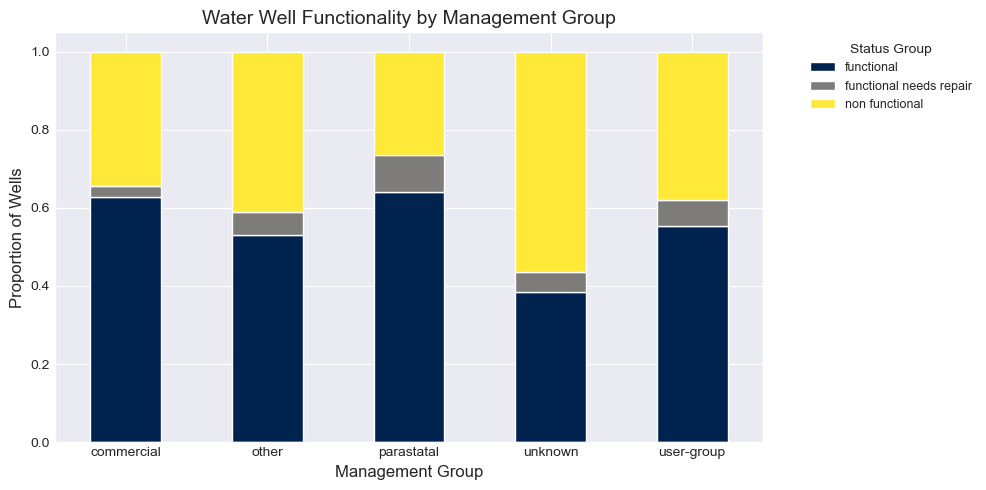

Distribution of Water Point Status by Management Type:
status_group      functional  functional needs repair  non functional
management_group                                                     
commercial             62.9%                     2.9%           34.3%
other                  53.2%                     5.8%           41.0%
parastatal             64.0%                     9.6%           26.4%
unknown                38.3%                     5.2%           56.5%
user-group             55.4%                     6.7%           37.9%


In [71]:
# Work on a copy
df_plot = train_df.copy()

# Compute normalized proportions
cross_tab = pd.crosstab(df_plot['management_group'], df_plot['status_group'], normalize='index')

# Plot
cross_tab.plot(kind='bar', stacked=True, colormap='cividis', figsize=(10,5))

plt.title('Water Well Functionality by Management Group', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Management Group', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Management Type:")
print("=" * 75)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

The management structure of water points has a strong effect on their operational status:

- Better performing management types:
    - Parastatal-managed wells (64% functional) and Commercial-managed wells (62.9% functional) show the highest functionality rates. These organizations likely have formal maintenance protocols, funding, and accountability structures that keep wells operational.

- Moderately performing management types:
    - User-groups (55.4% functional) and Other (53.2% functional) manage to keep just over half of wells functional. These groups may face resource constraints or inconsistent maintenance practices.

- Poorly performing management types:
    - Wells with Unknown management (38.3% functional) are the most vulnerable, with over half being non-functional (56.5%). This suggests that lack of clarity or accountability in management directly correlates with higher failure rates.

Key takeaway: Formal and accountable management structures, commercial or parastatal, significantly increase the likelihood of wells remaining functional. Weak or undefined management dramatically raises the risk of failure, emphasizing the importance of clear governance and maintenance planning.

#### 4. How does payment_type relate to water point functionality?

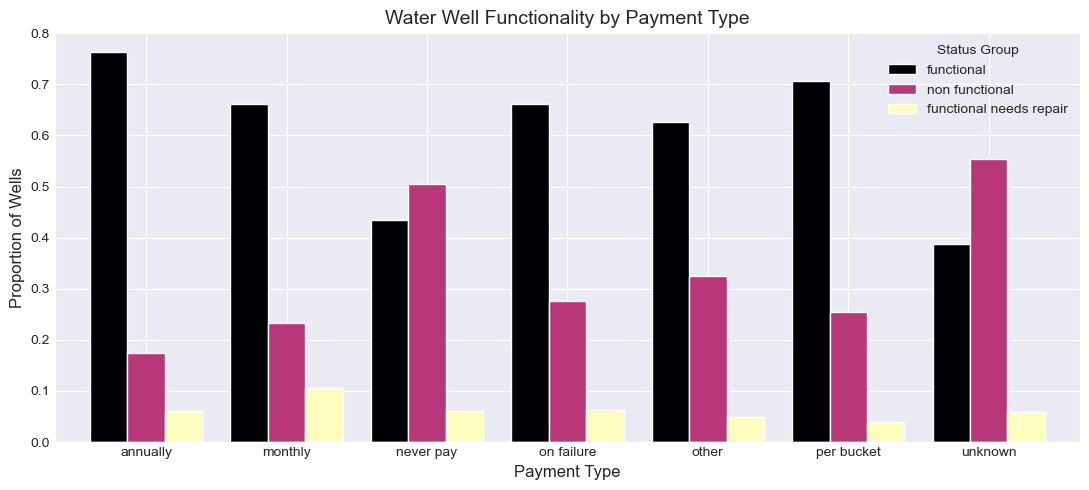

Distribution of Water Point Status by Payment Type:
status_group  functional  non functional  functional needs repair
payment_type                                                     
annually           76.3%           17.5%                     6.2%
monthly            66.2%           23.2%                    10.6%
never pay          43.5%           50.5%                     6.1%
on failure         66.1%           27.7%                     6.2%
other              62.6%           32.6%                     4.8%
per bucket         70.7%           25.4%                     3.9%
unknown            38.7%           55.3%                     6.0%


In [72]:
# Work on a copy
df_plot = train_df.copy()

# Compute counts (or proportions)
cross_tab = pd.crosstab(df_plot['payment_type'], df_plot['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]

# Plot grouped bar chart
cross_tab.plot(kind='bar', figsize=(11, 5), width=0.8, colormap='magma')

plt.title('Water Well Functionality by Payment Type', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Payment Type', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=10)
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Payment Type:")
print("=" * 70)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

The mode of payment for water access has a clear impact on well functionality:

- High-functionality payment types:
    - Annually (76.3% functional) and Per Bucket (70.7% functional) show the highest operational rates. Regular or direct contributions likely support better maintenance and timely repairs.
    - Monthly (66.2%) and On Failure (66.1%) are moderately functional, suggesting periodic or reactive payment systems can maintain functionality but less reliably than structured annual contributions.

- Low-functionality payment types:
    - Never Pay (43.5% functional) and Unknown (38.7% functional) wells have the highest failure rates (>50% non-functional). Lack of user contributions or unclear payment structures correlates strongly with poor maintenance and higher risk of breakdown.

- Other payment types (62.6%) fall in the middle, showing moderate functionality but still a significant fraction of failures.

Key takeaway: Structured payment systems, especially annual or per-use contributions, support better water well functionality. Wells without consistent payment or with unknown arrangements are far more likely to fail, highlighting the importance of sustainable funding mechanisms for long-term water access.

#### 5. Do permitted (permit) wells perform better than non-permitted or unknown wells?

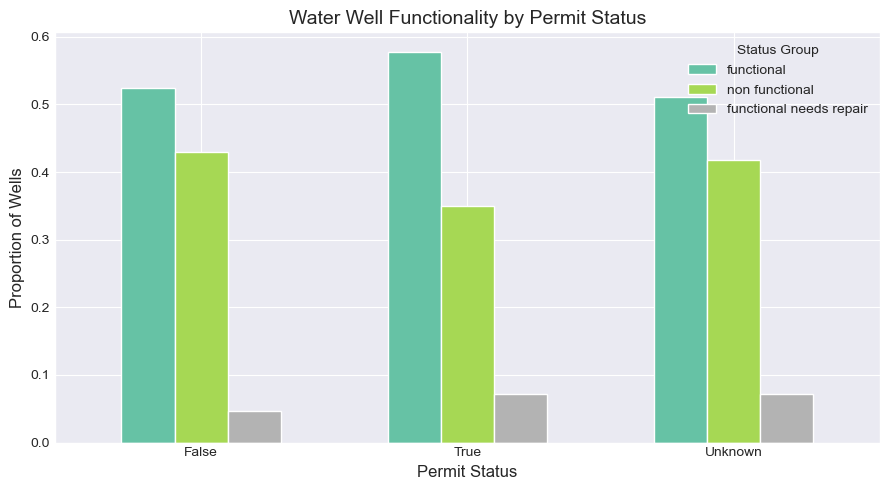

Distribution of Water Point Status by Permission:
status_group  functional  non functional  functional needs repair
permit                                                           
False              52.4%           43.0%                     4.6%
True               57.8%           35.0%                     7.2%
Unknown            51.1%           41.7%                     7.1%


In [73]:
# Work on a copy
df_plot = train_df.copy()

# Compute normalized proportions
cross_tab = pd.crosstab(df_plot['permit'], df_plot['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]

# Plot grouped bar chart
cross_tab.plot(kind='bar', figsize=(9, 5), width=0.6, colormap='Set2')

plt.title('Water Well Functionality by Permit Status', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Permit Status', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status Group', fontsize=10)
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Permission:")
print("=" * 70)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

The permit status of water wells has a noticeable but moderate effect on their operational status:

- Permitted wells (True) show the highest functionality at 57.8%, with only 35% non-functional. This suggests that regulatory oversight or formal registration slightly improves maintenance and reliability.
- Non-permitted wells (False) have lower functionality (52.4% functional) and higher failure rates (43% non-functional), indicating that lack of formal oversight can increase the risk of breakdown.
- Unknown permit status wells perform similarly to non-permitted wells (51.1% functional), emphasizing the importance of clear regulatory tracking.

Key takeaway: While permits alone don’t guarantee functionality, formally permitted wells tend to be better maintained and less likely to fail. Ensuring wells are properly registered could support more reliable water access.

#### 7. Are certain water sources (spring, river, machine dbh) more reliable than others?

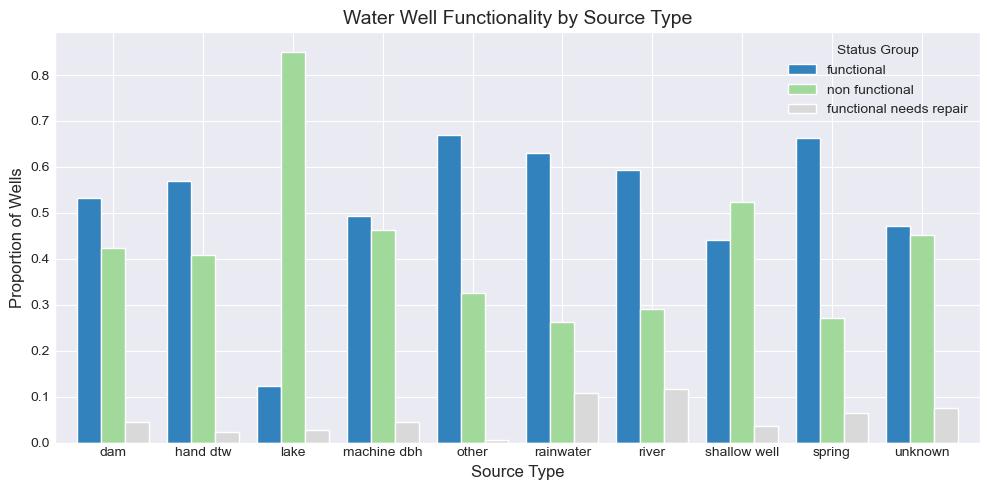

Distribution of Water Point Status by Permission:
status_group  functional  non functional  functional needs repair
source                                                           
dam                53.3%           42.3%                     4.5%
hand dtw           56.9%           40.8%                     2.3%
lake               12.3%           85.0%                     2.7%
machine dbh        49.2%           46.3%                     4.5%
other              66.8%           32.6%                     0.5%
rainwater          63.0%           26.3%                    10.7%
river              59.3%           29.1%                    11.6%
shallow well       44.0%           52.5%                     3.5%
spring             66.3%           27.2%                     6.5%
unknown            47.2%           45.3%                     7.5%


In [74]:
# Work on a copy
df_plot = train_df.copy()

# Compute normalized proportions
cross_tab = pd.crosstab(df_plot['source'], df_plot['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]

# Plot grouped bar chart
cross_tab.plot(kind='bar', figsize=(10, 5), width=0.8, colormap='tab20c')

plt.title('Water Well Functionality by Source Type', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Source Type', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=10)
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Permission:")
print("=" * 70)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

The reliability of water wells is strongly influenced by the source type:

- Highly reliable sources:
    - Spring (66.3% functional), Other (66.8%), Rainwater (63%), and River (59.3%) show the highest functionality. These sources are either naturally resilient or easier to manage and maintain.

- Moderately reliable sources:
    - Hand DTW (Deep Tubewell) (56.9%) and Dam (53.3%) are functional for just over half of wells. They require some maintenance but generally perform reasonably well.

- Low reliability sources:
    - Lake (12.3% functional), Shallow Well (44%), Machine DBH (49.2%), and Unknown (47.2%) have the highest failure rates. These sources are prone to contamination, mechanical failure, or inconsistent maintenance.

Key takeaway: Naturally resilient or easily maintainable sources, springs, rainwater harvesting, and rivers, tend to sustain functionality better than artificial or less-managed sources like lakes or machine-drilled boreholes. Prioritizing reliable source types in new installations can significantly reduce non-functional wells.

#### 8. Does water_quality correlate with functionality status?

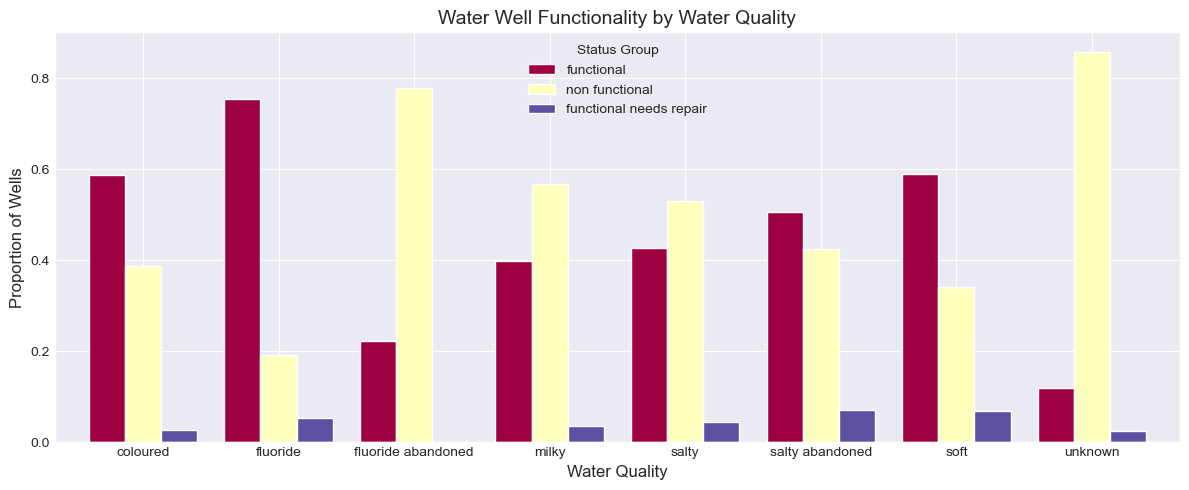

Distribution of Water Point Status by Permission:
status_group        functional  non functional  functional needs repair
water_quality                                                          
coloured                 58.8%           38.6%                     2.6%
fluoride                 75.4%           19.2%                     5.4%
fluoride abandoned       22.2%           77.8%                     0.0%
milky                    39.7%           56.7%                     3.5%
salty                    42.7%           52.9%                     4.4%
salty abandoned          50.6%           42.4%                     7.1%
soft                     58.9%           34.2%                     6.9%
unknown                  11.9%           85.8%                     2.4%


In [75]:
# Work on a copy
df_plot = train_df.copy()

# Compute normalized proportions
cross_tab = pd.crosstab(df_plot['water_quality'], df_plot['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]

# Plot grouped bar chart
cross_tab.plot(kind='bar', figsize=(12,5), width=0.8, colormap='Spectral')

plt.title('Water Well Functionality by Water Quality', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Water Quality', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=10)
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Permission:")
print("=" * 75)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

Water quality is strongly associated with the operational status of wells:

- Highly functional wells:
    - Fluoride (75.4% functional), Soft (58.9%), and Coloured (58.8%) water wells tend to remain functional. Likely, these wells are actively maintained and prioritized for regular use.

- Moderately functional wells:
    - Salty (42.7%) and Salty Abandoned (50.6%) wells show a significant fraction of failures, reflecting maintenance challenges or user avoidance due to poor water quality.

- Low functionality wells:
    - Milky (39.7%), Fluoride Abandoned (22.2%), and Unknown (11.9%) have the highest non-functional rates (>56%), suggesting these wells are neglected, abandoned, or have poor water quality that discourages use.

Key takeaway: Water quality is a strong indicator of well reliability. Wells with acceptable or manageable water quality (fluoride, soft) are more likely to be functional, while wells with poor, abandoned, or unknown quality are far more prone to failure. Maintaining good water quality is critical for long-term water point functionality.

#### 9. Do older wells (construction_year) tend to fail more than newer wells?

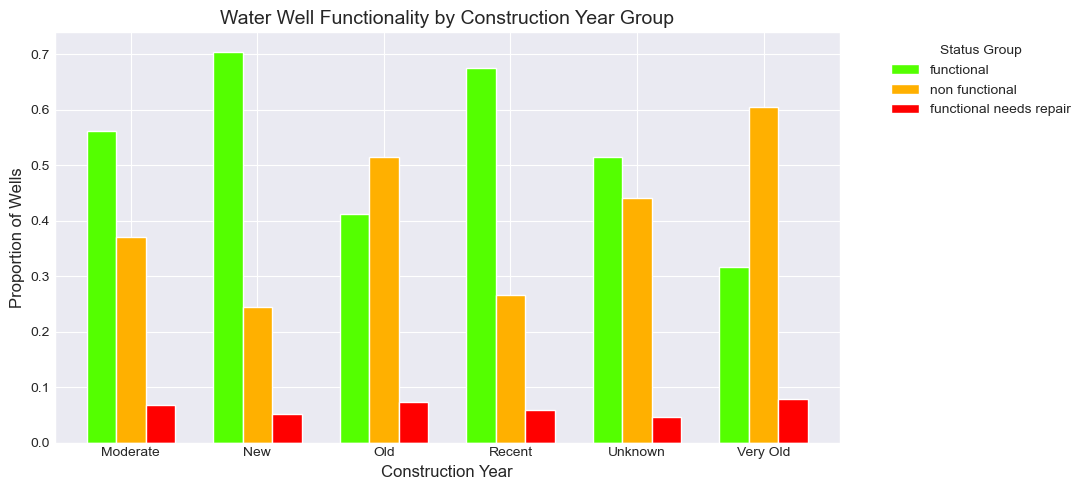

Distribution of Water Point Status by Construction Year:
status_group             functional  non functional  functional needs repair
construction_year_group                                                     
Moderate                      56.2%           37.1%                     6.7%
New                           70.4%           24.4%                     5.2%
Old                           41.1%           51.5%                     7.4%
Recent                        67.6%           26.6%                     5.9%
Unknown                       51.4%           44.0%                     4.6%
Very Old                      31.6%           60.5%                     7.9%


In [76]:
# Create a copy of the dataset
df_copy = train_df.copy()

# Replace 0s with 'Unknown'
df_copy['construction_year_group'] = df_copy['construction_year'].replace(0, 'Unknown')

# Bin the remaining years
bins = [0, 1979, 1990, 2000, 2010, 2013]
labels = ['Very Old','Old','Moderate','Recent','New']
df_copy.loc[df_copy['construction_year'] != 0, 'construction_year_group'] = pd.cut(
    df_copy.loc[df_copy['construction_year'] != 0, 'construction_year'],
    bins=bins, labels=labels
)

# Create a stacked bar chart to check relationship with status
cross_tab = pd.crosstab(df_copy['construction_year_group'], df_copy['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]

cross_tab.plot(kind='bar', figsize=(11,5), width=0.7, colormap='prism_r')

plt.title('Water Well Functionality by Construction Year Group', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Construction Year', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Construction Year:")
print("=" * 80)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

The age of a water well strongly influences its operational status:

- Highly functional wells:
    - New (2011–2013, 70.4% functional) and Recent (2001–2010, 67.6% functional) wells are the most reliable, with the lowest non-functional rates (~24–27%). This reflects recent construction standards, better materials, and likely ongoing maintenance.

- Moderately functional wells:
    - Moderate (1991–2000, 56.2% functional) and Unknown (51.4% functional) wells show intermediate performance. Unknown construction years may indicate poor record-keeping, which correlates with higher failure (~44% non-functional).

- Low functionality wells:
    - Old (1980–1990, 41.1% functional) and Very Old (<1980, 31.6% functional) wells are the least functional, with the highest failure rates (51–60.5% non-functional). Age-related wear, outdated materials, and lack of maintenance likely contribute to these failures.

Key takeaway: Well functionality decreases with age. Prioritizing maintenance for older wells and ensuring proper documentation for unknown-year wells can significantly reduce non-functionality and improve water access sustainability.

#### 10. Does the population served by the well (population) affect its functionality?

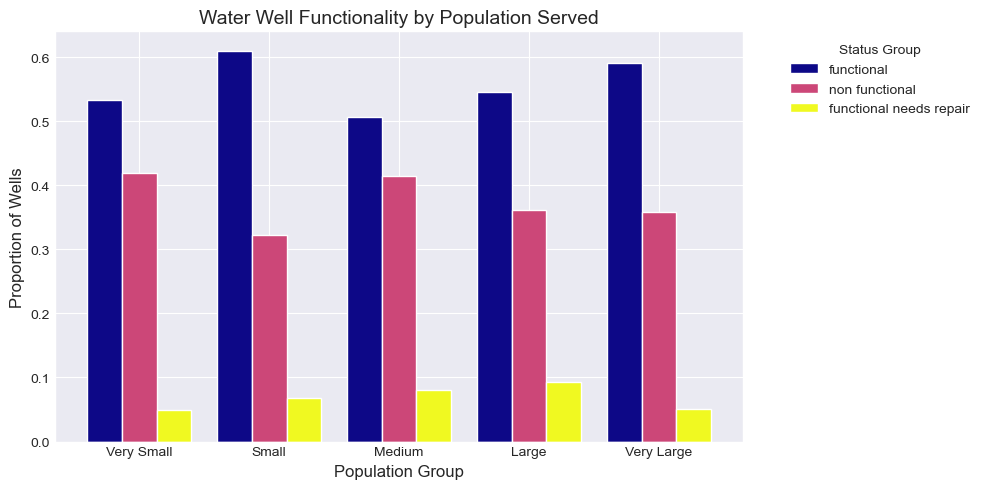

Distribution of Water Point Status by Population Served:
status_group      functional  non functional  functional needs repair
population_group                                                     
Very Small             53.3%           41.9%                     4.9%
Small                  61.0%           32.2%                     6.8%
Medium                 50.7%           41.4%                     8.0%
Large                  54.5%           36.2%                     9.3%
Very Large             59.1%           35.8%                     5.0%


In [77]:
# Create a copy for safety
df_pop = train_df.copy()

# Define bins
bins = [0, 50, 200, 500, 1000, 5000]
labels = ['Very Small','Small','Medium','Large','Very Large']

# Bin population
df_pop['population_group'] = pd.cut(df_pop['population'], bins=bins, labels=labels)

# Cross-tab for normalized proportions
cross_tab = pd.crosstab(df_pop['population_group'], df_pop['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]

# Plot grouped bar chart
cross_tab.plot(kind='bar', figsize=(10, 5), width = 0.8, colormap='plasma')

plt.title('Water Well Functionality by Population Served', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Population Group', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Population Served:")
print("=" * 75)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

The number of people a well serves has a nuanced effect on functionality:

- Moderately functional groups:
    - Small (61% functional) and Very Large (59.1% functional) communities have the highest proportion of functional wells. Small communities may manage wells more carefully, while very large communities may receive more attention or resources due to higher usage.

- Average functionality groups:
    - Large (54.5% functional) and Very Small (53.3% functional) wells show moderate functionality. Very small populations might lack resources for maintenance, while large populations may stress the well, causing wear.

- Lower functionality group:
    - Medium (50.7% functional) wells show slightly lower performance, with higher rates of wells needing repair (8%) and non-functional (41.4%). This could reflect moderate usage but insufficient maintenance structures.

Key takeaway: Population served alone does not strictly determine functionality, but extremes (very small or very large) tend to be slightly better managed or supported. Wells serving medium-sized populations may require additional maintenance focus to reduce non-functionality.

#### 11. Are there regional differences in well functionality (region / basin)?
##### (a). region

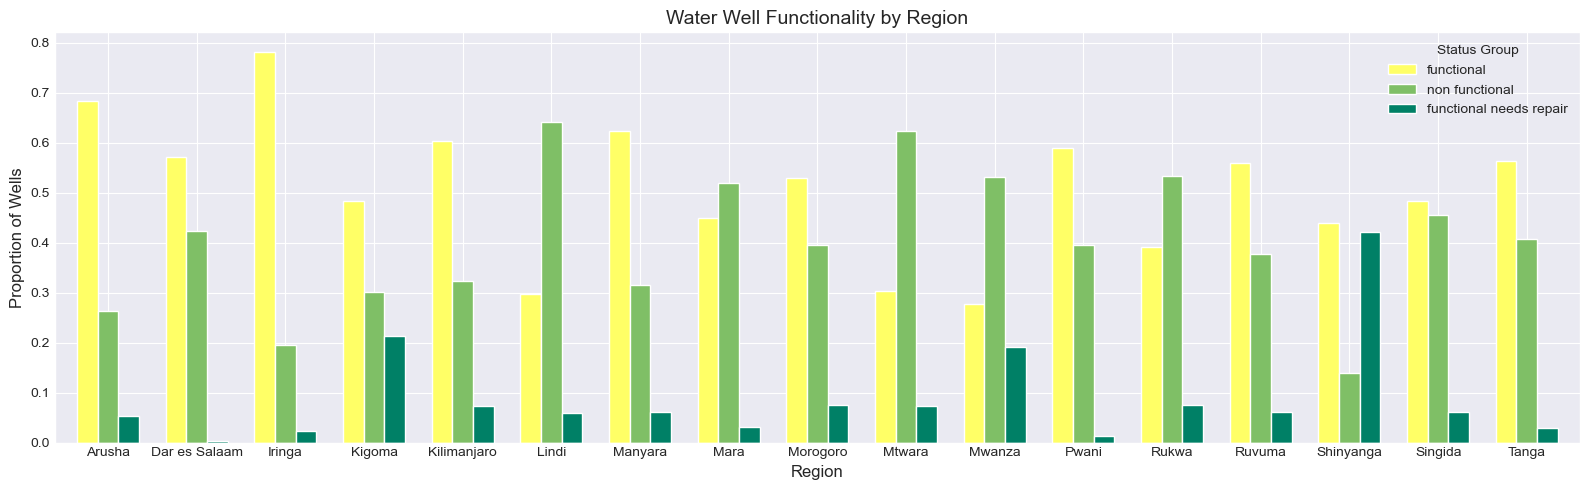

Distribution of Water Point Status by Region:
status_group   functional  non functional  functional needs repair
region                                                            
Arusha              68.5%           26.3%                     5.2%
Dar es Salaam       57.3%           42.4%                     0.4%
Iringa              78.2%           19.5%                     2.3%
Kigoma              48.4%           30.2%                    21.4%
Kilimanjaro         60.3%           32.4%                     7.4%
Lindi               29.8%           64.2%                     6.0%
Manyara             62.3%           31.6%                     6.1%
Mara                45.0%           52.0%                     3.0%
Morogoro            52.9%           39.6%                     7.5%
Mtwara              30.3%           62.4%                     7.3%
Mwanza              27.8%           53.1%                    19.1%
Pwani               59.1%           39.6%                     1.4%
Rukwa           

In [78]:
# Create a copy for safety
df_region = train_df.copy()

# Cross-tab normalized by region
cross_tab = pd.crosstab(df_region['region'], df_region['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab = cross_tab[desired_order]


# Plot grouped bar chart
cross_tab.plot(kind='bar', figsize=(16,5), width=0.7, colormap='summer_r')

plt.title('Water Well Functionality by Region', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=10)
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Region:")
print("=" * 70)
percentage_table = (cross_tab * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

Water well functionality varies considerably across regions:

- Highly functional regions:
    - Iringa (78.2%) and Arusha (68.5%) lead in functionality, with low non-functional rates (~19–26%), suggesting better infrastructure, maintenance, and resource allocation.
    - Manyara (62.3%) and Kilimanjaro (60.3%) also perform well, though slightly lower than the top two.

- Moderately functional regions:
    - Dar es Salaam (57.3%), Ruvuma (56.1%), Tanga (56.4%), and Pwani (59.1%) show mixed performance, with a moderate proportion of functional wells but notable non-functional fractions (37–42%).

- Low functionality regions:
    - Lindi (29.8%), Mtwara (30.3%), and Mwanza (27.8%) have the lowest functional well proportions, with high non-functional rates (53–64%), indicating critical maintenance gaps or high stress on water points.
    - Rukwa (39.1%) and Mara (45.0%) also show poor performance.

- Outlier case:
    - Shinyanga shows a peculiar pattern: high proportion needing repair (42.1%) but low non-functional (14%). This may indicate wells are heavily monitored and repaired proactively, but are currently under maintenance stress.

Key takeaway: Regional disparities are stark. Interventions should prioritize Lindi, Mtwara, Mwanza, Rukwa, and Mara, while high-performing regions like Iringa and Arusha could serve as models for effective maintenance and management strategies.

##### (b). basin

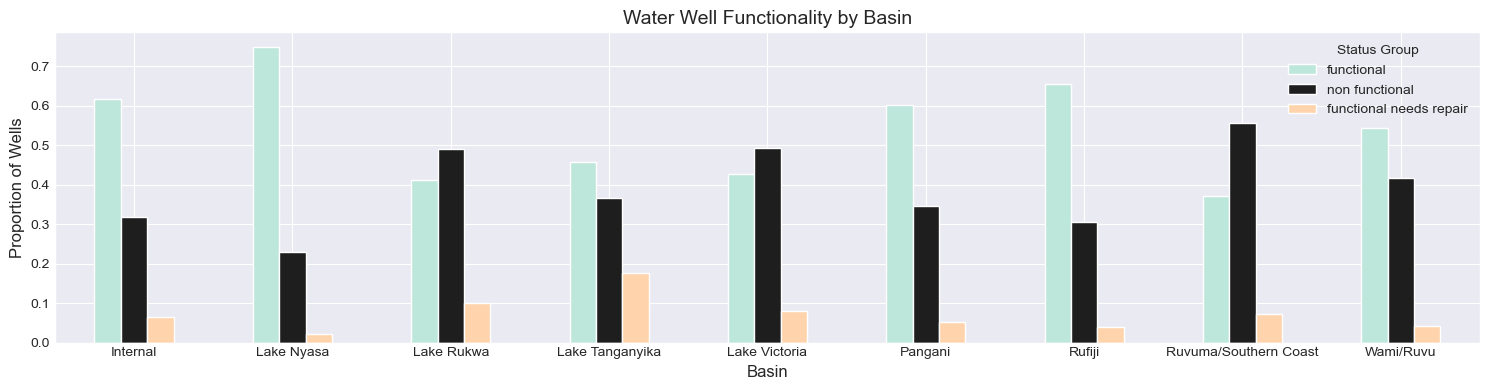

Distribution of Water Point Status by Basin:
status_group           functional  non functional  functional needs repair
basin                                                                     
Internal                    61.7%           31.8%                     6.5%
Lake Nyasa                  74.8%           22.9%                     2.3%
Lake Rukwa                  41.1%           48.9%                    10.0%
Lake Tanganyika             45.7%           36.7%                    17.6%
Lake Victoria               42.7%           49.4%                     7.9%
Pangani                     60.1%           34.6%                     5.3%
Rufiji                      65.5%           30.6%                     3.9%
Ruvuma/Southern Coast       37.2%           55.6%                     7.3%
Wami/Ruvu                   54.3%           41.6%                     4.1%


In [79]:
# Create a copy for safety
df_basin = train_df.copy()

# Cross-tab for regions
cross_tab_basin = pd.crosstab(df_basin['basin'], df_basin['status_group'], normalize='index')

# Reorder columns to show: functional, non functional, functional needs repair
desired_order = ['functional', 'non functional', 'functional needs repair']
cross_tab_basin = cross_tab_basin[desired_order]

# Plot
cross_tab_basin.plot(kind='bar', figsize=(15,4), colormap='icefire')

plt.title('Water Well Functionality by Basin', fontsize=14)
plt.ylabel('Proportion of Wells', fontsize=12)
plt.xlabel('Basin', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Status Group', fontsize=10)
plt.tight_layout()
plt.show()

# Print as formatted pivot table
print("Distribution of Water Point Status by Basin:")
print("=" * 80)
percentage_table = (cross_tab_basin * 100).round(1)
print(percentage_table.to_string(float_format='{:.1f}%'.format))

*Observation:*

Water well functionality varies significantly across basins:

- Highly functional basins:
    - Lake Nyasa (74.8% functional) and Rufiji (65.5% functional) have the highest proportion of functional wells, with the lowest non-functional rates (~23–31%). These basins likely benefit from better infrastructure, maintenance, or water management practices.
    - Internal (61.7%) and Pangani (60.1%) also perform relatively well.

- Moderate functionality basins:
    - Wami/Ruvu (54.3% functional) and Lake Tanganyika (45.7%) show mixed performance, indicating some operational challenges or variability in well management.

- Low functionality basins:
    - Lake Rukwa (41.1%), Lake Victoria (42.7%), and Ruvuma/Southern Coast (37.2%) have the highest non-functional rates (49–56%), reflecting poor maintenance, high usage stress, or challenging local conditions.

Key takeaway: Basin location is a strong predictor of well functionality. Strategic maintenance and targeted interventions should prioritize Ruvuma/Southern Coast, Lake Victoria, and Lake Rukwa, while high-performing basins like Lake Nyasa and Rufiji may serve as models for best practices.

### MULTIVARIATE ANALYSIS
Multivariate analysis considers interactions among three or more variables, revealing complex relationships that bivariate analysis alone might miss. Examples include:

- Categorical-Categorical Interactions: e.g management_group × payment_type × status_group to determine which governance and payment combinations sustain functionality.

- Categorical-Numerical Interactions: e.g construction_year × management_group × status_group to see how age interacts with management type.

- Numerical-Numerical Interactions: e.g gps_height × population × status_group to evaluate environmental and usage pressures on well performance.

This analysis aims to uncover combinations of factors that are most predictive of water point performance, enabling targeted interventions and informed resource allocation.

#### 1. Which combinations of management_group and payment_type result in the highest well functionality?

In [80]:
# Create a copy for safety
df_copy = train_df.copy()

# Cross-tab of management_group vs payment_type
cross_tab = pd.crosstab(
    [df_copy['management_group'], df_copy['payment_type']],
    df_copy['status_group'],
    normalize='index'  
)

# Sort by proportion of functional wells descending
cross_tab_sorted = cross_tab.sort_values(by='functional', ascending=False)
cross_tab_sorted.head(10)

,status_group,functional,functional needs repair,non functional
management_group,payment_type,,,
unknown,monthly,0.882353,0.000000,0.117647
commercial,other,0.875000,0.000000,0.125000
parastatal,per bucket,0.851485,0.029703,0.118812
commercial,per bucket,0.838110,0.029435,0.132455
other,other,0.833333,0.027778,0.138889
parastatal,on failure,0.792453,0.075472,0.132075
user-group,annually,0.765902,0.061639,0.172459
parastatal,annually,0.736842,0.157895,0.105263
commercial,unknown,0.723810,0.028571,0.247619


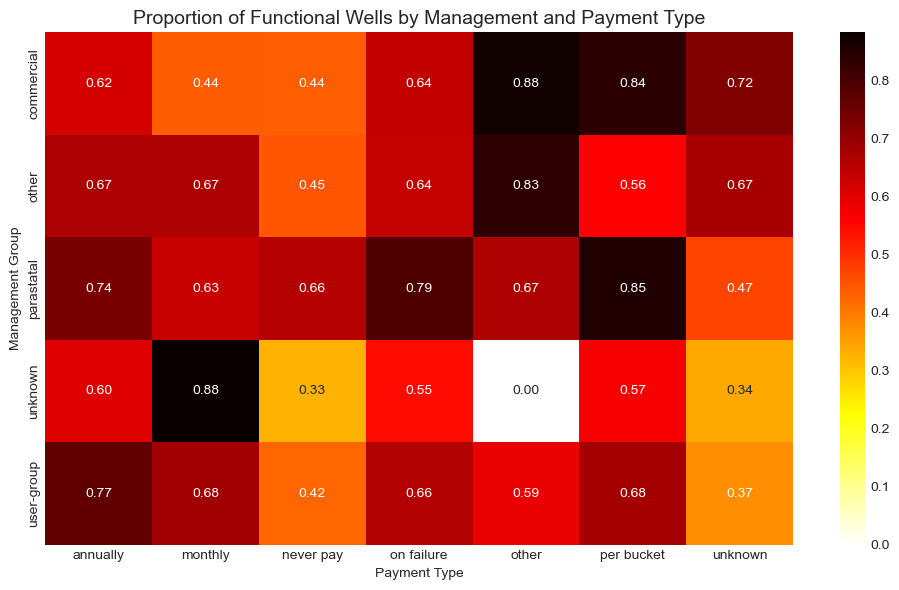

In [81]:
# Pivot table for plotting
pivot = cross_tab.reset_index().pivot(index='management_group', columns='payment_type', values='functional')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='hot_r')
plt.title('Proportion of Functional Wells by Management and Payment Type', fontsize=14)
plt.ylabel('Management Group')
plt.xlabel('Payment Type')
plt.tight_layout()
plt.show()

*Observation:*

- Sustainability link: Wells that have a structured payment system (per bucket, annual, monthly) are more likely to remain functional, suggesting that financial contributions correlate with better maintenance.
- Management reliability: Parastatal and user groups seem better at sustaining functionality, while unknown management indicates poor outcomes or incomplete data.
- Policy implication: To improve well sustainability, promoting clear management accountability and structured payment systems should be a priority.

#### 2. Are specific combinations of waterpoint_type_group and source associated with higher failure rates?

In [82]:
# Create a copy for safety
df_copy = train_df.copy()

# Cross-tab: waterpoint_type_group × source
cross_tab = pd.crosstab(
    [df_copy['waterpoint_type_group'], df_copy['source']],
    df_copy['status_group'],
    normalize='index' 
)

# Sort by proportion of non-functional wells descending
cross_tab_sorted = cross_tab.sort_values(by='non functional', ascending=False)
cross_tab_sorted.head(10)

status_group                        functional  functional needs repair  \
waterpoint_type_group source                                              
cattle trough         lake            0.000000                 0.000000   
                      other           0.000000                 0.000000   
                      unknown         0.000000                 0.000000   
other                 lake            0.000000                 0.000000   
improved spring       hand dtw        0.000000                 0.000000   
other                 hand dtw        0.016949                 0.000000   
                      shallow well    0.046930                 0.011842   
                      machine dbh     0.123478                 0.019130   
communal standpipe    lake            0.122449                 0.027211   
other                 river           0.050633                 0.113924   

status_group                        non functional  
waterpoint_type_group source                        
cattle trough         lake                1.000000  
                      other               1.000000  
                      unknown             1.000000  
other                 lake                1.000000  
improved spring       hand dtw            1.000000  
other                 hand dtw            0.983051  
                      shallow well        0.941228  
                      machine dbh         0.857391  
communal standpipe    lake                0.850340  
other                 river               0.835443

*Observation:*

- Some combinations of waterpoint type + source are fundamentally unreliable and might not be worth further investment (e.g cattle troughs fed by lakes).
- Shallow wells and machine-drilled boreholes (dbh) underperform compared to expectations, may point to maintenance challenges rather than the technology itself.
- River-based sources and hand-dug wells are unreliable, possibly due to seasonal variability or contamination issues.

#### 3. Do certain installer organizations underperform in specific regions?

In [83]:
# Create a copy for safety
df_copy = train_df.copy()

# Cross-tab: installer × region
cross_tab = pd.crosstab(
    df_copy['installer'], 
    df_copy['region'],
    values=df_copy['status_group'] == 'non functional',  
    aggfunc='mean'
)

# Sort to find highest non-functional rates
cross_tab['max_failure'] = cross_tab.max(axis=1)
cross_tab_sorted = cross_tab.sort_values(by='max_failure', ascending=False)
cross_tab_sorted.head(10)  

region,Arusha,Dar es Salaam,Iringa,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tanga,max_failure
installer,,,,,,,,,,,,,,,,,,
Community,0.395793,NaN,0.105346,0.047059,NaN,NaN,0.090909,1.000000,0.185185,0.000000,1.0,NaN,NaN,NaN,NaN,0.250000,NaN,1.000000
RWE,0.525641,NaN,NaN,0.399015,0.764045,NaN,NaN,NaN,0.594595,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.612069,1.000000
TASAF,0.000000,NaN,0.434783,0.600000,0.206897,0.363636,0.650000,0.294118,0.058824,0.125000,NaN,1.000000,0.333333,0.354167,NaN,0.625000,0.666667,1.000000
Unknown,NaN,0.423423,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
LGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550369,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
District Council,NaN,NaN,0.500000,NaN,0.528682,0.387931,NaN,NaN,0.500000,NaN,NaN,0.791667,0.382979,0.947368,NaN,NaN,0.000000,0.947368
TCRS,0.200000,NaN,NaN,0.461988,0.489796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640316,0.923077,NaN,0.358491,NaN,0.923077
Fini Water,NaN,NaN,NaN,NaN,NaN,0.883895,NaN,NaN,NaN,0.798540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.883895
Government,0.000000,NaN,0.471154,0.354545,0.529617,0.772727,0.616438,0.663102,0.600000,0.750000,NaN,NaN,NaN,0.366534,NaN,0.600000,0.647059,0.772727


In [84]:
import pandas as pd

# Create a copy for safety
df_copy = train_df.copy()

# Cross-tab: water_quality × quantity
cross_tab = pd.crosstab(
    [df_copy['water_quality'], df_copy['quantity']],
    df_copy['status_group'],
    normalize='index'  # proportions
)

# Sort by proportion of non-functional wells descending
cross_tab_sorted = cross_tab.sort_values(by='non functional', ascending=False)
cross_tab_sorted.head(10) 


status_group                 functional  functional needs repair  \
water_quality      quantity                                        
milky              dry         0.000000                 0.000000   
fluoride abandoned dry         0.000000                 0.000000   
fluoride           dry         0.000000                 0.000000   
salty abandoned    seasonal    0.000000                 0.000000   
                   dry         0.000000                 0.000000   
salty              dry         0.004902                 0.002451   
soft               dry         0.024590                 0.005328   
unknown            dry         0.008902                 0.022255   
coloured           dry         0.000000                 0.076923   
salty              unknown     0.130435                 0.000000   

status_group                 non functional  
water_quality      quantity                  
milky              dry             1.000000  
fluoride abandoned dry             1.000000  
fluoride           dry             1.000000  
salty abandoned    seasonal        1.000000  
                   dry             1.000000  
salty              dry             0.992647  
soft               dry             0.970082  
unknown            dry             0.968843  
coloured           dry             0.923077  
salty              unknown         0.869565

Before building predictive models, it is critical to confirm that the training and testing datasets are well-aligned. 
To avoid inconsistencies or data leakage, we first perform a sanity check by printing out the dataset metadata for both splits.  

This includes:  
- Shape check to confirm row and column counts.  
- Column check to ensure both datasets share the same structure.  
- Completeness check to detect missing values that could disrupt modeling.  
- Cardinality check to compare the number of unique values per feature.  

Once these checks are completed and the datasets are consistent, we can proceed confidently with feature engineering and model training.

In [85]:
# Get metadata overview for training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39732 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             39732 non-null  int64  
 1   installer              39732 non-null  object 
 2   longitude              39732 non-null  float64
 3   latitude               39732 non-null  float64
 4   basin                  39732 non-null  object 
 5   region                 39732 non-null  object 
 6   population             39732 non-null  int64  
 7   permit                 39732 non-null  object 
 8   construction_year      39732 non-null  int64  
 9   extraction_type_group  39732 non-null  object 
 10  management_group       39732 non-null  object 
 11  payment_type           39732 non-null  object 
 12  water_quality          39732 non-null  object 
 13  quantity               39732 non-null  object 
 14  source                 39732 non-null  object 
 15  waterpo

In [86]:
# Get metadata overview for test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 0 to 14849
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             9839 non-null   int64  
 1   installer              9839 non-null   object 
 2   longitude              9839 non-null   float64
 3   latitude               9839 non-null   float64
 4   basin                  9839 non-null   object 
 5   region                 9839 non-null   object 
 6   population             9839 non-null   int64  
 7   permit                 9839 non-null   object 
 8   construction_year      9839 non-null   int64  
 9   extraction_type_group  9839 non-null   object 
 10  management_group       9839 non-null   object 
 11  payment_type           9839 non-null   object 
 12  water_quality          9839 non-null   object 
 13  quantity               9839 non-null   object 
 14  source                 9839 non-null   object 
 15  waterpoi

In [87]:
# Check dataset shapes
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

# Check columns
print("\nTraining columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())

Training data shape: (39732, 17)
Test data shape: (9839, 16)

Training columns: ['gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region', 'population', 'permit', 'construction_year', 'extraction_type_group', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type_group', 'status_group']
Test columns: ['gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region', 'population', 'permit', 'construction_year', 'extraction_type_group', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type_group']


In [88]:
# Check completeness (missing values)
print("\nMissing values in training set:\n", train_df.isnull().sum())


Missing values in training set:
 gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_group    0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type_group    0
status_group             0
dtype: int64


In [89]:
print("\nMissing values in test set:\n", test_df.isnull().sum())


Missing values in test set:
 gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_group    0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type_group    0
dtype: int64


In [90]:
# Check unique values per column
print("\nUnique values in training set:")
print(train_df.nunique())


Unique values in training set:
gps_height                2369
installer                   21
longitude                39683
latitude                 39685
basin                        9
region                      17
population                1049
permit                       3
construction_year           55
extraction_type_group       13
management_group             5
payment_type                 7
water_quality                8
quantity                     5
source                      10
waterpoint_type_group        6
status_group                 3
dtype: int64


In [91]:
print("\nUnique values in test set:")
print(test_df.nunique())


Unique values in test set:
gps_height               2105
installer                  21
longitude                9836
latitude                 9836
basin                       9
region                     17
population                637
permit                      3
construction_year          55
extraction_type_group      13
management_group            5
payment_type                7
water_quality               8
quantity                    5
source                     10
waterpoint_type_group       6
dtype: int64


Everything is ship shape. Let's now do the fun part.

# MODELING

With exploratory data analysis complete and a clear understanding of the dataset, we now transition into building predictive models.  
Our target variable is **status_group**, which categorizes water points as *functional*, *functional needs repair*, or *non functional*.  
The predictor variables used for modeling are:

- **gps_height**  
- **installer**  
- **longitude, latitude**  
- **basin**  
- **region**  
- **population**  
- **permit**  
- **construction_year**  
- **extraction_type_group**  
- **management_group**  
- **payment_type**  
- **water_quality**  
- **quantity**  
- **source**  
- **waterpoint_type_group**

## Preprocessing
Before modeling, we will:
- Handle missing values and ensure data completeness.  
- Encode categorical features (e.g installer, basin, region).  
- Scale numerical variables where appropriate (e.g gps_height, population).  
- Address class imbalance in status_group using techniques such as **SMOTE/SMOTEN**.  

## Baseline Model
We begin with a **Dummy Classifier** to establish a baseline accuracy. This provides a benchmark to measure the value added by more sophisticated models.

## Candidate Models
We then train and evaluate several classifiers:  
- **Logistic Regression** – interpretable baseline linear model.  
- **Decision Tree Classifier** – captures nonlinear relationships and feature interactions.  
- **Random Forest Classifier** – ensemble approach to reduce variance and improve stability.  
- **K-Nearest Neighbors (KNN)** – instance-based learning for comparison.  
- **XGBoost Classifier** – gradient boosting ensemble, often highly effective in structured data.  

## Model Evaluation
Models will be compared on:  
- **Accuracy** – overall correctness.  
- **Precision, Recall, F1-score** – to account for imbalanced classes.  
- **Confusion Matrix** – to visualize class-level performance.  
- **ROC Curve and AUC** – to assess discriminative power.  

## Model Selection
Based on evaluation metrics, we will select the best-performing model. The winning model should not only achieve high predictive performance but also generalize well to unseen data. If multiple models perform competitively, additional considerations such as interpretability and computational efficiency will guide the final choice.

## DATA PREPROCESSING

To begin, we create a copy of the training dataset to preserve the original data. 

Next, we separate the target variable from the feature set to ensure a clean and structured workflow for subsequent analysis and modeling.

In [92]:
# Make a copy of our dataset
model_df = train_df.copy()

# Separate target from features
X = model_df.drop('status_group', axis=1)
y = model_df['status_group']

Then we encode the target variable using a LabelEncoder for consistency in classification tasks. 

We will then transform all categorical feature variables into numerical format using one-hot encoding (pd.get_dummies()), ensuring the dataset is fully numeric and ready for model training.

In [93]:
# Label encode the target
le = LabelEncoder()
y = le.fit_transform(y)

# To check mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

print()

# Encode categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype='int')
X

{'functional': np.int64(0), 'functional needs repair': np.int64(1), 'non functional': np.int64(2)}



,gps_height,longitude,latitude,population,construction_year,installer_Central Government,installer_Community,installer_DANIDA,installer_DWE,installer_District Council,...,source_rainwater,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1390,34.938093,-9.856322,109,1999,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1399,34.698766,-2.147466,280,2010,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,686,37.460664,-3.821329,250,2009,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,263,38.486161,-11.155298,58,1986,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,39.172796,-4.765587,1,2009,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,540,38.044070,-4.272218,210,1967,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
59394,351,37.634053,-6.124830,89,2007,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59395,1210,37.169807,-3.253847,125,1999,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
59396,1212,35.249991,-9.070629,56,1996,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [94]:
# Sanity check
# Shape check
print("Shape:", X.shape)

# Column types
print("\nData types:\n", X.dtypes.value_counts())

# Null values (should be none if preprocessing was correct)
print("\nMissing values:", X.isnull().sum().sum())

# Target distribution
print("\nTarget distribution (encoded):")
print(pd.Series(y).value_counts())

Shape: (39732, 98)

Data types:
 int64      96
float64     2
Name: count, dtype: int64

Missing values: 0

Target distribution (encoded):
0    22239
2    14917
1     2576
Name: count, dtype: int64


In [95]:
# Quick peek at the data
print("\nSample of features:\n")
pd.DataFrame(X.head())


Sample of features:



,gps_height,longitude,latitude,population,construction_year,installer_Central Government,installer_Community,installer_DANIDA,installer_DWE,installer_District Council,...,source_rainwater,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1390,34.938093,-9.856322,109,1999,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1399,34.698766,-2.147466,280,2010,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,686,37.460664,-3.821329,250,2009,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,263,38.486161,-11.155298,58,1986,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,39.172796,-4.765587,1,2009,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


With preprocessing complete, we split the dataset into training and testing sets using train_test_split, allocating 80% for training and 20% for testing. 

This ensures the model is trained on the majority of the data while reserving a portion for unbiased evaluation.

In [96]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify=y)

# Check shape
x_train.shape, y_train.shape, y_test.shape, y_test.shape

((31785, 98), (31785,), (7947,), (7947,))

From our EDA, we observed that several numerical variables exhibit skewness. 

To confirm this, we will quantify the degree of skewness and, if necessary, apply appropriate transformations to reduce its impact on model performance.

In [97]:
# Numeric columns to check
num_cols = ['gps_height', 'longitude', 'latitude', 'population', 'construction_year']

# Skewness calculation
skewness = X[num_cols].skew().sort_values(ascending=False)
print("Skewness of numeric features:\n", skewness)

print("\n", "-" * 75, "\n")

# Quick rule of thumb interpretation
for col, val in skewness.items():
    if abs(val) > 1:
        print(f"{col}: Highly skewed ({val:.2f}) → Candidate for log transform")
    elif abs(val) > 0.5:
        print(f"{col}: Moderately skewed ({val:.2f})")
    else:
        print(f"{col}: Approximately symmetric ({val:.2f})")

Skewness of numeric features:
 population           11.115977
latitude             -0.173308
gps_height           -0.173328
longitude            -0.785898
construction_year    -5.918767
dtype: float64

 --------------------------------------------------------------------------- 

population: Highly skewed (11.12) → Candidate for log transform
latitude: Approximately symmetric (-0.17)
gps_height: Approximately symmetric (-0.17)
longitude: Moderately skewed (-0.79)
construction_year: Highly skewed (-5.92) → Candidate for log transform


The variables population and construction_year are heavily skewed. 

To address this, we apply a log transformation to normalize their distributions. 

New log-transformed columns are created for both variables, after which the original skewed columns are dropped, as they are no longer required.

In [98]:
# Apply log transform on skewed columns
for col in ["population", "construction_year"]:
    # Add +1 to avoid log(0)
    x_train[col + "_log"] = np.log1p(x_train[col])
    x_test[col + "_log"] = np.log1p(x_test[col])

# Drop untransformed originals
x_train = x_train.drop(["population", "construction_year"], axis=1)
x_test = x_test.drop(["population", "construction_year"], axis=1)

Since the numerical features in our dataset are measured on different scales, we need to standardize them to ensure fair contribution to the models. 

We achieve this by applying StandardScaler, which rescales the features to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Scale numeric features
num_cols = ['gps_height', 'longitude', 'latitude', 
            'population_log', 'construction_year_log']

scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

With preprocessing complete, we now proceed to model development. 

We will train and evaluate Logistic Regression, Decision Trees, Random Forest, XGBoost, and K-Nearest Neighbors (KNN), using Logistic Regression as our baseline model.

To begin, we instantiate and train the vanilla versions of these models i.e models with default parameters and without feature-specific optimizations. 

Based on their performance, we will then identify the most promising candidate and fine-tune its hyperparameters to achieve the best results.

### VANILLA MODELS

#### 1. LOGISTRIC REGRESSION (Baseline Model)

In [ ]:
# Instantiate the model
Vanilla_LogReg = LogisticRegression(max_iter=1000, random_state = 42)

# Fit the model
Vanilla_LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [101]:
# Predict
y_pred = Vanilla_LogReg.predict(x_test)

# Training accuracy
train_accuracy = Vanilla_LogReg.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 74.32%
Test Accuracy:     73.68%


The vanilla Logistic Regression model achieved the following results:

- Training Accuracy: 74.32%

- Test Accuracy: 73.68%

This indicates that the model generalizes reasonably well, with only a small gap between training and test performance, making it a solid baseline for comparison with more complex models.

Confusion Matrix:
 [[3990   17  441]
 [ 368   34  113]
 [1142   11 1831]]


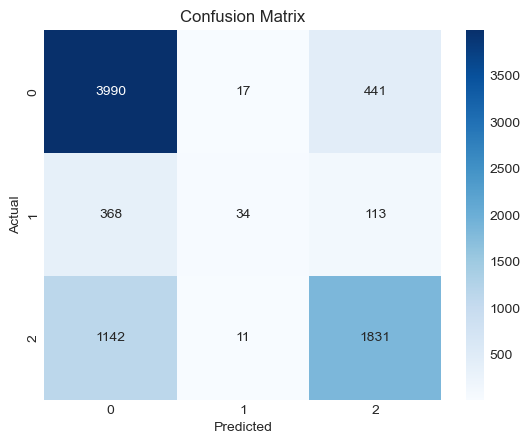

In [102]:
# Check Confusion Matrix
vanilla_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(vanilla_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*Interpretation:*

- Row 1 (True: Functional): 3,990 wells correctly classified, with 17 misclassified as functional needs repair and 441 as non-functional.

- Row 2 (True: Functional Needs Repair): 34 correctly classified, but 368 misclassified as functional and 113 as non-functional.

- Row 3 (True: Non-functional): 1,831 correctly classified, while 1,142 were misclassified as functional and 11 as functional needs repair.

Overall, the model handles the dominant classes (Functional and Non-functional) better, but struggles with the minority class (Functional Needs Repair), which is often confused with the other two categories.

In [103]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.80      4448
           1       0.55      0.07      0.12       515
           2       0.77      0.61      0.68      2984

    accuracy                           0.74      7947
   macro avg       0.68      0.53      0.53      7947
weighted avg       0.73      0.74      0.71      7947



*Interpreting the Classification Report:*

- For Functional wells (class 0), the model performs strongly, with precision of 0.73 and a high recall of 0.90. This means it correctly identifies most functional wells, with relatively few false positives.

- For Functional Needs Repair (class 1), performance is very poor. Precision is 0.55, but recall drops to only 0.07, resulting in an F1-score of 0.12. In other words, the model rarely detects wells that need repair, often confusing them with the other categories.

- For Non-functional wells (class 2), the model achieves solid precision (0.77) and moderate recall (0.61), yielding an F1-score of 0.68. It identifies many non-functional wells correctly but still misses a substantial number.

Overall accuracy is 74%, but the macro average recall of 0.53 highlights imbalance: the model favors the majority classes while neglecting the minority class. The weighted averages (precision 0.73, recall 0.74, F1-score 0.71) mainly reflect the dominance of functional wells in the dataset.

**Key takeaway:** The model generalizes decently for the majority classes, but it fails to capture the minority class (functional needs repair), which is critical for proactive maintenance decisions. Addressing class imbalance (via class weights, resampling, or advanced models) will be necessary.

#### 2. DECISION TREE

In [104]:
# Initialize Decision Tree
vanilla_dt = DecisionTreeClassifier(
    criterion='gini',     
    max_depth=None,       
    random_state=42
)

# Fit on SMOTE-resampled data
vanilla_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
# Predict
y_pred = vanilla_dt.predict(x_test)

# Training accuracy
train_accuracy = vanilla_dt.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     75.42%


The model perfectly fits the training data but drops notably on the test set, indicating **overfitting**; a common trait of unpruned decision trees. While the test accuracy is slightly higher than our baseline Logistic Regression, the gap between training and test accuracy suggests the tree is memorizing patterns rather than generalizing effectively.

Confusion Matrix:
 [[3577  235  636]
 [ 245  159  111]
 [ 617  109 2258]]


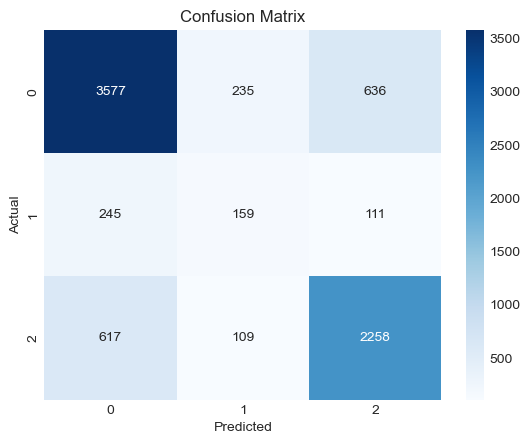

In [106]:
# Check Confusion Matrix
vanilla_matrix1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(vanilla_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*Interpretation:*

- Functional wells (class 0): 3,577 correctly classified, but 235 mislabeled as functional needs repair and 636 as non-functional. The model captures the bulk of this majority class but still leaks a sizable number into other categories.

- Functional Needs Repair (class 1): 159 correctly identified, while 245 were misclassified as functional and 111 as non-functional. Performance here is noticeably better than Logistic Regression, though still limited.

- Non-functional wells (class 2): 2,258 correctly classified, with 617 confused as functional and 109 as functional needs repair. The model performs strongly on this class compared to baseline.

**Key takeaway:** The Decision Tree reduces some misclassification of the minority class (functional needs repair) compared to Logistic Regression, but it still struggles with overlap between categories. Combined with its 100% training accuracy, this points to overfitting; it memorizes the training set well but sacrifices generalization.

In [107]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      4448
           1       0.32      0.31      0.31       515
           2       0.75      0.76      0.75      2984

    accuracy                           0.75      7947
   macro avg       0.62      0.62      0.62      7947
weighted avg       0.75      0.75      0.75      7947



*Interpreting the Classification Report:*

- For Functional wells (class 0), the model achieves a precision of 0.81 and recall of 0.80, giving an F1-score of 0.80. This shows balanced performance with both correct identification and relatively few false positives.

- For Functional Needs Repair (class 1), performance remains weak but shows improvement over Logistic Regression. Precision is 0.32 and recall 0.31, resulting in an F1-score of 0.31. While still low, the Decision Tree is catching more of these cases than the baseline.

- For Non-functional wells (class 2), results are solid: precision of 0.75, recall of 0.76, and F1-score of 0.75. The model captures the majority of non-functional wells effectively.

Overall accuracy is 75%, slightly better than Logistic Regression. Both the macro average (0.62) and weighted average (0.75) indicate more balanced performance across classes compared to the baseline, although class 1 (needs repair) still lags far behind.

**Key takeaway:** The Decision Tree provides stronger balance across classes than Logistic Regression, particularly improving recall for the Functional Needs Repair class. However, with perfect training accuracy and clear signs of overfitting, its generalization capacity is limited.

#### 3. XGBOOST

In [108]:
# Instantiate model
vanilla_boost = XGBClassifier(
    objective='multi:softprob',  
    num_class=len(np.unique(y_train)),  
    eval_metric='mlogloss',      
    use_label_encoder=False,      
    random_state=42               
)

# Fit model
vanilla_boost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [109]:
# Predict
y_pred = vanilla_boost.predict(x_test)

# Training accuracy
train_accuracy = vanilla_boost.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 86.42%
Test Accuracy:     80.75%


Unlike the Decision Tree, XGBoost avoids overfitting. The training accuracy is high but not perfect, and the test accuracy is close behind, suggesting good generalization. This is a significant step up from both Logistic Regression (73.7%) and Decision Tree (75.4%), showing XGBoost’s strength in handling complex, nonlinear relationships while still maintaining balance.

Confusion Matrix:
 [[4020   64  364]
 [ 313  119   83]
 [ 693   13 2278]]


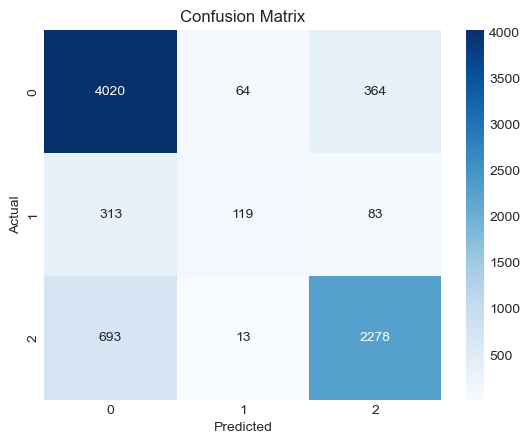

In [110]:
# Check Confusion Matrix
vanilla_matrix2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(vanilla_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*Interpreting the Confusion Matrix:*

- Functional wells (class 0): 4,020 correctly classified, with 64 mislabeled as functional needs repair and 364 as non-functional. This is stronger than both Logistic Regression and Decision Tree, showing fewer misclassifications overall.

- Functional Needs Repair (class 1): 119 correctly identified, while 313 were misclassified as functional and 83 as non-functional. While still the weakest class, XGBoost is clearly doing better here than Logistic Regression (recall ~7%) and somewhat better than the Decision Tree.

- Non-functional wells (class 2): 2,278 correctly classified, with 693 mislabeled as functional and 13 as functional needs repair. This shows strong recall and precision, confirming XGBoost’s effectiveness on this majority class.

**Key takeaway:** XGBoost strikes a solid balance, it improves on the minority functional needs repair class compared to Logistic Regression and Decision Tree, while maintaining high accuracy on the dominant classes. The results suggest it’s learning generalizable patterns without the severe overfitting seen in Decision Trees.

In [111]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      4448
           1       0.61      0.23      0.33       515
           2       0.84      0.76      0.80      2984

    accuracy                           0.81      7947
   macro avg       0.75      0.63      0.66      7947
weighted avg       0.80      0.81      0.80      7947



*Interpreting the Classification Report:*

- For Functional wells (class 0), the model delivers strong results with precision of 0.80 and recall of 0.90, producing an F1-score of 0.85. This shows XGBoost reliably captures the majority of functional wells while keeping false positives relatively low.

- For Functional Needs Repair (class 1), performance improves compared to Logistic Regression and Decision Tree but remains challenging. Precision is 0.61, which is respectable, but recall is only 0.23, leading to an F1-score of 0.33. The model identifies some wells needing repair but still misses most of them.

- For Non-functional wells (class 2), precision is 0.84 and recall 0.76, with an F1-score of 0.80. This represents balanced performance and solid reliability in flagging non-functional wells.

Overall accuracy rises to 81%, the best so far. The macro average F1-score of 0.66 reflects an improvement in balancing across classes, though the minority functional needs repair class is still underrepresented. The weighted averages (precision 0.80, recall 0.81, F1-score 0.80) highlight XGBoost’s ability to handle the class imbalance better than earlier models.

**Key takeaway:** XGBoost clearly outperforms both Logistic Regression and Decision Tree, particularly by raising recall for the minority class while maintaining high performance on the dominant ones. However, functional needs repair remains a weak point, pointing to the need for targeted imbalance-handling strategies.

#### 4. RANDOM FOREST

In [112]:
# Instantiate model (vanilla but safer)
vanilla_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
vanilla_rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [113]:
# Predict
y_pred = vanilla_rf.predict(x_test)

# Training accuracy
train_accuracy = vanilla_rf.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     81.14%


The Random Forest perfectly fits the training data, a clear sign of overfitting. 

However, unlike the single Decision Tree, it generalizes much better, achieving strong performance on the test set. With 81.14% test accuracy, it slightly edges out Logistic Regression and Decision Tree, and is nearly on par with XGBoost.

**Key takeaway:** Random Forest delivers robust accuracy and handles complexity well, but its perfect training score suggests it memorizes the training data. Hyperparameter tuning (e.g limiting depth, adjusting number of estimators, or controlling leaf size) will be essential to improve generalization further.

Confusion Matrix:
 [[3955  106  387]
 [ 280  145   90]
 [ 597   39 2348]]


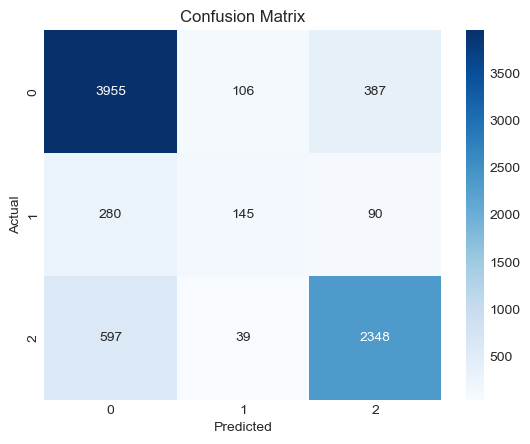

In [114]:
# Check Confusion Matrix
vanilla_matrix3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(vanilla_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*Interpreting the Confusion Matrix:*

- Functional wells (class 0): 3,955 correctly classified, with 106 mislabeled as functional needs repair and 387 as non-functional. This is strong performance, with relatively few leaks into other categories.

- Functional Needs Repair (class 1): 145 correctly classified, while 280 were misclassified as functional and 90 as non-functional. This is an improvement compared to Logistic Regression but slightly weaker than XGBoost in catching this minority class.

- Non-functional wells (class 2): 2,348 correctly identified, with 597 mislabeled as functional and 39 as functional needs repair. This shows solid reliability in distinguishing non-functional wells.

*Key takeaway:* Random Forest provides strong performance on the majority classes (functional and non-functional) while offering modest improvements for the functional needs repair class. Like XGBoost, it achieves balance across categories, but its reliance on memorization (100% training accuracy) hints at overfitting that will need tuning to control.

In [115]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      4448
           1       0.50      0.28      0.36       515
           2       0.83      0.79      0.81      2984

    accuracy                           0.81      7947
   macro avg       0.72      0.65      0.67      7947
weighted avg       0.80      0.81      0.80      7947



*Interpreting the Classification Report:*

- For Functional wells (class 0), the model performs strongly with 0.82 precision and 0.89 recall, giving an F1-score of 0.85. It correctly identifies the majority of functional wells while keeping false positives relatively low.

- For Functional Needs Repair (class 1), results remain weak but are better than Logistic Regression. Precision is 0.50, but recall is only 0.28, producing an F1-score of 0.36. The model catches more repair-needed wells than baseline models but still misses most of them.

- For Non-functional wells (class 2), performance is solid with 0.83 precision, 0.79 recall, and an F1-score of 0.81. This indicates good balance between false positives and false negatives for this class.

Overall accuracy stands at 81%, on par with XGBoost. The macro average F1-score of 0.67 highlights modest improvement across classes, while the weighted average F1-score of 0.80 shows that Random Forest handles the majority classes well but continues to struggle with the minority repair class.

**Key takeaway:** Random Forest generalizes well and balances performance across the dominant classes, achieving results comparable to XGBoost. However, like the other models, it struggles significantly with the functional needs repair category, which will need targeted strategies to improve recall.

#### 5. K-NEAREST NEIGHBOR

In [116]:
# Instantiate model
vanilla_knn = KNeighborsClassifier()

# Fit model
vanilla_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [117]:
# Predict
y_pred = vanilla_knn.predict(x_test)

# Training accuracy
train_accuracy = vanilla_knn.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 83.78%
Test Accuracy:     77.35%


Training Accuracy (83.78%) is not perfect; unlike your Random Forest, which memorized the training data, meaning KNN isn’t overfitting as aggressively.

Test Accuracy (77.35%) is a bit lower than Random Forest's, but the gap between train and test is much narrower, which signals better generalization.

Confusion Matrix:
 [[3882  115  451]
 [ 308  122   85]
 [ 787   54 2143]]


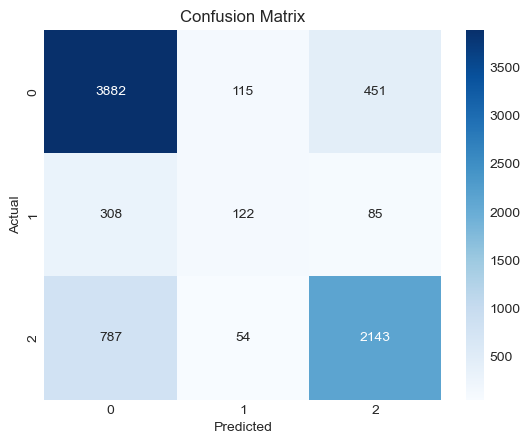

In [118]:
# Check Confusion Matrix
vanilla_matrix4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(vanilla_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*Interpretation:*

- Functional (0):
Out of 4,448 wells, 3,882 were correctly classified as functional.
However, 115 were mislabeled as “needs repair” and 451 as non functional.
High recall (~87%) — KNN does well here, though it confuses some wells with the “non functional” class.

- Needs Repair (1):
Out of 515 wells that truly needed repair, only 122 were correctly identified.
308 were misclassified as functional and 85 as non functional.
This is the weakest point: the model misses most repair cases, recall is very low (~24%).

- Non Functional (2):
Out of 2,984 non functional wells, 2,143 were correctly classified.
Misclassifications: 787 predicted functional, 54 predicted repair.
Recall is moderate (~72%), but many failing wells are wrongly assumed to be functional.

Overall interpretation

KNN favors the majority class (functional) and does fairly well there, but it severely struggles with the minority “needs repair” class, which gets overwhelmed by its neighbors in feature space. The non functional wells are captured reasonably well but still leak into the functional group.

In [119]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      4448
           1       0.42      0.24      0.30       515
           2       0.80      0.72      0.76      2984

    accuracy                           0.77      7947
   macro avg       0.67      0.61      0.63      7947
weighted avg       0.76      0.77      0.76      7947



*Deciphering the Classification Report:*

- Functional (0): Precision 0.78, Recall 0.87, F1-score 0.82 → Strong performance on the majority class, though some wells leak into “non functional.”

- Needs Repair (1): Precision 0.42, Recall 0.24, F1-score 0.30 → Very poor detection; most repair cases are missed.

- Non Functional (2): Precision 0.80, Recall 0.72, F1-score 0.76 → Decent, though a sizeable chunk is misclassified as functional.

KNN demonstrates reasonable overall accuracy but falls short where it matters most: the “needs repair” class. Its low recall (~24%) indicates that the model fails to flag the majority of wells at risk, which undermines its utility in proactive maintenance scenarios. While KNN maintains balance between train and test performance (less overfitting than Random Forest), its inability to capture the minority class makes it less suitable as a final choice.

### ADDING CLASS WEIGHTS TO DEAL WITH IMBALANCE

#### 1. LOGISTIC REGRESSION

In [120]:
# Fit a Logistic Regression Model
Weighted_LogReg = LogisticRegression(max_iter = 1000, class_weight='balanced', random_state=42)

Weighted_LogReg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [121]:
# Predict
y_pred = Weighted_LogReg.predict(x_test)

# Training accuracy
train_accuracy = Weighted_LogReg.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 64.87%
Test Accuracy:     64.26%


Introducing class weights forces the model to pay more attention to the minority classes. As expected, this adjustment caused overall accuracy to drop compared to the vanilla version (~74%), since the model no longer optimizes only for the majority class.

The trade-off here is intentional:

Vanilla Logistic Regression had stronger overall accuracy but ignored minority classes (especially “needs repair”).

Weighted Logistic Regression sacrifices accuracy to improve fairness across classes, making it more useful if catching under-represented outcomes is a priority.

Confusion Matrix:
 [[2944  952  552]
 [ 130  319   66]
 [ 671  469 1844]]


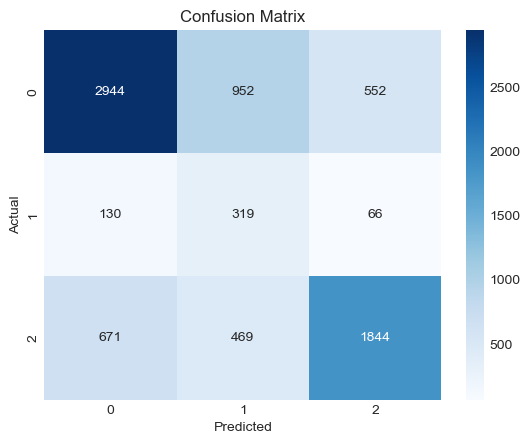

In [122]:
# Check Confusion Matrix
weighted_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(weighted_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Functional (0):
Out of 4,448 actual functional wells, only 2,944 were correctly identified.
A large number (952) is misclassified as “needs repair” and 552 as “non functional”.
Recall drops significantly compared to vanilla Logistic Regression, showing the penalty for balancing classes.

- Needs Repair (1):
Out of 515 wells, 319 were correctly classified.
130 mislabeled as functional and 66 as non functional.
Huge improvement from vanilla Logistic Regression (where recall was only ~7%). Now recall climbs to ~62%.

- Non Functional (2):
Out of 2,984 wells, 1,844 were correctly predicted.
Misclassifications: 671 as functional and 469 as repair.
Performance weaker here than vanilla, but the class now gets more balanced attention.

Interpretation

By applying class weights, Logistic Regression shifted focus from maximizing overall accuracy to capturing minority classes. The trade-off:

Functional wells are less accurately detected.

Needs repair wells see massive gains in recall (~62% vs 7%).

Non functional wells are handled moderately well, though slightly weaker than before.

In practical terms: this model is much better at flagging at-risk wells (repair cases), even if it means misclassifying more functional ones.

In [123]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72      4448
           1       0.18      0.62      0.28       515
           2       0.75      0.62      0.68      2984

    accuracy                           0.64      7947
   macro avg       0.57      0.63      0.56      7947
weighted avg       0.73      0.64      0.67      7947



*Interpretation:*

This weighted Logistic Regression clearly trades raw accuracy for fairness across classes.

Functional wells are detected less accurately.

“Needs repair” wells show a huge gain in recall, making the model far more useful for early risk detection.

Non functional wells are handled moderately well, though not as strong as tree-based models.

Bottom line: while accuracy suffers, this model is better suited for practical use cases where catching under-repair wells is critical, even at the expense of some false alarms.

#### 2. DECISION TREE

In [124]:
# Instantiate model with class weights
Weighted_DT = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Fit the model
Weighted_DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [125]:
# Predict
y_pred = Weighted_DT.predict(x_test)

# Training accuracy
train_accuracy = Weighted_DT.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     75.55%


The Decision Tree perfectly memorized the training data (100% training accuracy), which is a clear sign of overfitting. While the test accuracy of ~75% is better than random guessing and close to Logistic Regression, the sharp train–test gap confirms that the model does not generalize well.

Confusion Matrix:
 [[2671 1147  630]
 [ 107  338   70]
 [ 532  554 1898]]


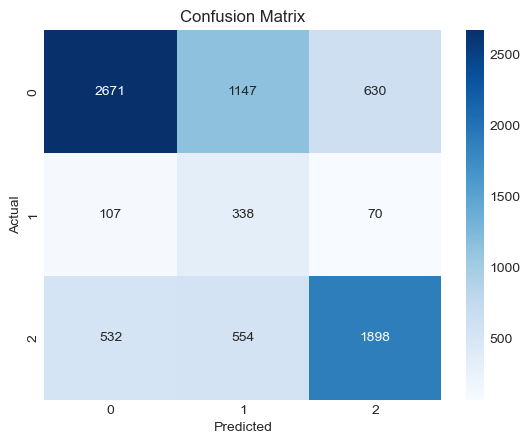

In [212]:
# Check Confusion Matrix
weighted_matrix1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(weighted_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      4448
           1       0.42      0.24      0.30       515
           2       0.80      0.72      0.76      2984

    accuracy                           0.77      7947
   macro avg       0.67      0.61      0.63      7947
weighted avg       0.76      0.77      0.76      7947



#### 3. RANDOM FOREST

In [128]:
# Instantiate model with class weights
Weighted_RF = RandomForestClassifier(
    class_weight="balanced",  
    random_state=42,
    n_jobs=-1                
)

# Fit the model
Weighted_RF.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [129]:
# Predict
y_pred = Weighted_RF.predict(x_test)

# Training accuracy
train_accuracy = Weighted_RF.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     80.80%


Confusion Matrix:
 [[3944  100  404]
 [ 288  135   92]
 [ 606   36 2342]]


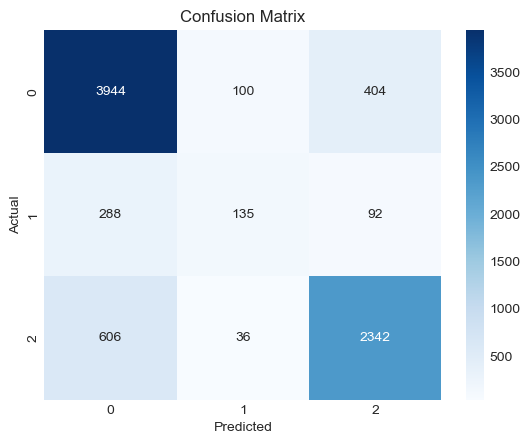

In [130]:
# Check Confusion Matrix
weighted_matrix2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(weighted_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [131]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      4448
           1       0.50      0.26      0.34       515
           2       0.83      0.78      0.80      2984

    accuracy                           0.81      7947
   macro avg       0.71      0.64      0.67      7947
weighted avg       0.80      0.81      0.80      7947



#### 4. XGBOOST

In [132]:
# Get unique classes
classes = np.unique(y_train)

# Compute balanced class weights
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
weight_dict = dict(zip(classes, class_weights))

# Map weights to training samples
sample_weights = np.array([weight_dict[label] for label in y_train])

# Instantiate XGBClassifier for multiclass
Weighted_XGB = XGBClassifier(
    objective="multi:softmax", 
    num_class=len(classes),
    random_state=42,
    n_jobs=-1
)

# Fit with sample weights
Weighted_XGB.fit(x_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_class=3, ...)

In [133]:
# Predict
y_pred = Weighted_XGB.predict(x_test)

# Training accuracy
train_accuracy = Weighted_XGB.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 81.92%
Test Accuracy:     75.27%


Confusion Matrix:
 [[3334  671  443]
 [ 119  333   63]
 [ 445  224 2315]]


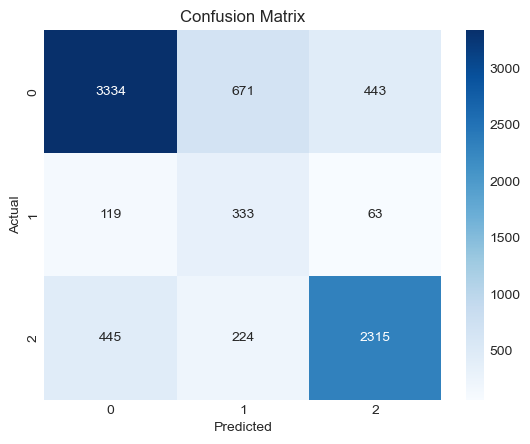

In [134]:
# Check Confusion Matrix
weighted_matrix3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(weighted_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [135]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      4448
           1       0.27      0.65      0.38       515
           2       0.82      0.78      0.80      2984

    accuracy                           0.75      7947
   macro avg       0.65      0.72      0.66      7947
weighted avg       0.80      0.75      0.77      7947



#### 5. K-NEAREST NEIGHBOR

In [136]:
# Instantiate model (with distance weighting)
Weighted_KNN = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance", 
    n_jobs=-1
)

# Fit model
Weighted_KNN.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [137]:
# Predict
y_pred = Weighted_KNN.predict(x_test)

# Training accuracy
train_accuracy = Weighted_KNN.score(x_train, y_train) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     77.31%


Confusion Matrix:
 [[3752  169  527]
 [ 268  147  100]
 [ 668   71 2245]]


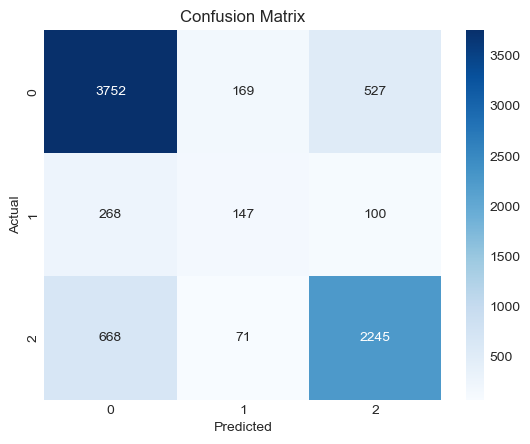

In [138]:
# Check Confusion Matrix
weighted_matrix4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(weighted_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [139]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      4448
           1       0.38      0.29      0.33       515
           2       0.78      0.75      0.77      2984

    accuracy                           0.77      7947
   macro avg       0.65      0.63      0.64      7947
weighted avg       0.77      0.77      0.77      7947



### DEAL WITH CLASS IMBALANCE USING SMOTE

In [140]:
# Dealing with Class Imbalance
# Apply SMOTE on training data
smote = SMOTE(random_state=42, sampling_strategy='auto')
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Check new class distribution
print("Before SMOTE:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nAfter SMOTE:\n", pd.Series(y_train_res).value_counts(normalize=True))

Before SMOTE:
 0    0.559729
2    0.375429
1    0.064842
Name: proportion, dtype: float64

After SMOTE:
 1    0.333333
2    0.333333
0    0.333333
Name: proportion, dtype: float64


#### LOGISTIC REGRESSION WITH SMOTE

In [141]:
# Dealing with Class Imbalance
# Apply SMOTE on training data
smote = SMOTE(random_state=42, sampling_strategy='auto')
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Check new class distribution
print("Before SMOTE:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nAfter SMOTE:\n", pd.Series(y_train_res).value_counts(normalize=True))

Before SMOTE:
 0    0.559729
2    0.375429
1    0.064842
Name: proportion, dtype: float64

After SMOTE:
 1    0.333333
2    0.333333
0    0.333333
Name: proportion, dtype: float64


In [142]:
# Fit Logistic Regression again on resampled data
LogReg_smote = LogisticRegression(max_iter=1000, random_state=42)
LogReg_smote.fit(x_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [143]:
# Predict
y_pred = LogReg_smote.predict(x_test)

# Training score
train_accuracy = LogReg_smote.score(x_train_res, y_train_res) * 100

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 67.10%
Test Accuracy:     65.86%


In [144]:
# View how the model handled predictions
y_pred = LogReg_smote.predict(x_test)
result = {'Actual': y_test, 'Predicted': y_pred}
pd.DataFrame(result)

,Actual,Predicted
0,2,0
1,2,0
2,2,1
3,0,0
4,0,0
...,...,...
7942,2,2
7943,0,0
7944,0,0
7945,0,1


Confusion Matrix:
 [[3155  741  552]
 [ 179  252   84]
 [ 768  389 1827]]


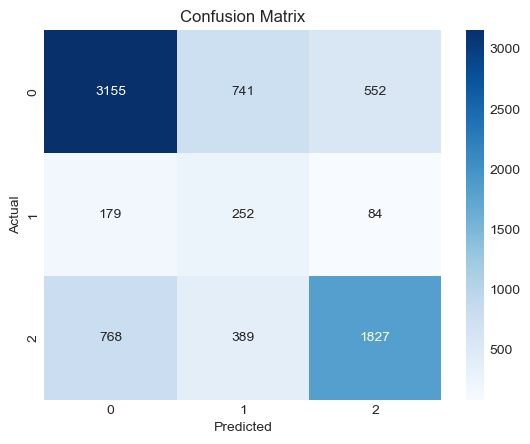

In [145]:
# Check confusion matrix
smote_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(smote_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [146]:
# Check classification
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      4448
           1       0.18      0.49      0.27       515
           2       0.74      0.61      0.67      2984

    accuracy                           0.66      7947
   macro avg       0.56      0.60      0.56      7947
weighted avg       0.72      0.66      0.68      7947



#### DECISION TREE WITH SMOTE

In [147]:
# Initialize Decision Tree
smote_dt = DecisionTreeClassifier(
    criterion='gini',     
    max_depth=None,       
    random_state=42
)

# Fit on SMOTE-resampled data
smote_dt.fit(x_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [148]:
# Predict
y_pred = smote_dt.predict(x_test)

# Evaluate model
train_accuracy = smote_dt.score(x_train_res, y_train_res) * 100
test_accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     74.44%


Decision Tree - Confusion Matrix:
 [[3471  364  613]
 [ 212  195  108]
 [ 557  177 2250]]


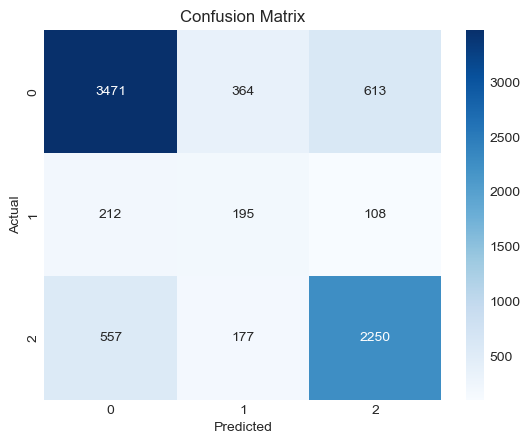

In [149]:
# Check confusion matrix
smote_matrix1 = confusion_matrix(y_test, y_pred)
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(smote_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [150]:
print("\nDecision Tree - Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      4448
           1       0.26      0.38      0.31       515
           2       0.76      0.75      0.76      2984

    accuracy                           0.74      7947
   macro avg       0.61      0.64      0.62      7947
weighted avg       0.76      0.74      0.75      7947



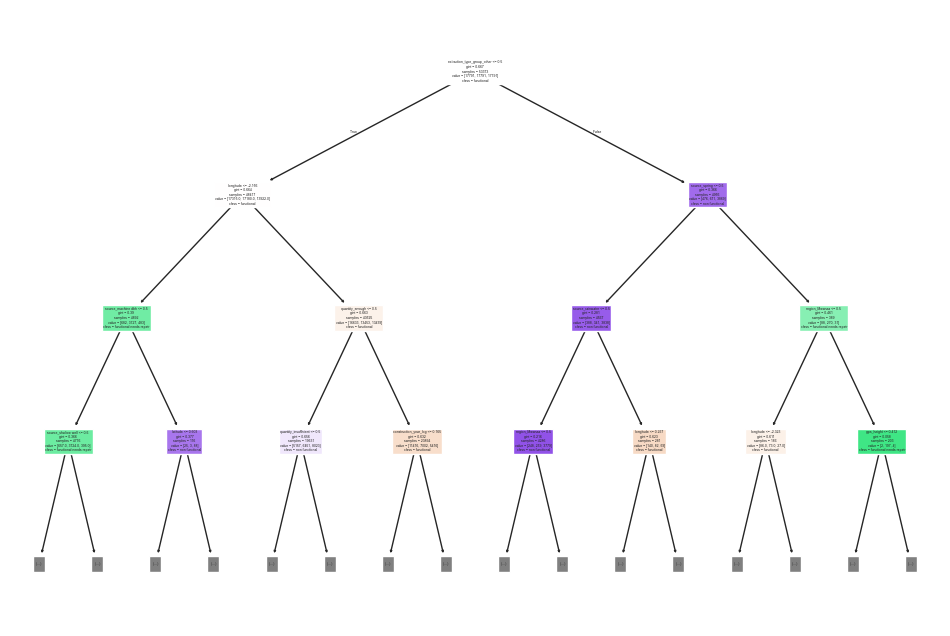

In [151]:
# Optional: Visualize tree (careful with size if dataset is big)
plt.figure(figsize=(12,8))
plot_tree(smote_dt, filled=True, feature_names=x_train.columns, class_names=le.classes_, max_depth=3)  
plt.show()

#### RANDOM FOREST WITH SMOTE

In [152]:
#instantiate the model
smote_rf = RandomForestClassifier()

#train the model
smote_rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [153]:
# Predict
y_pred = smote_rf.predict(x_test)

# Evaluate model
train_score = smote_rf.score(x_train_res, y_train_res) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"Training Accuracy: {train_score:.2f}%")
print(f"Test Accuracy:     {test_score:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     78.86%


Decision Tree - Confusion Matrix:
 [[3678  309  461]
 [ 206  219   90]
 [ 497  117 2370]]


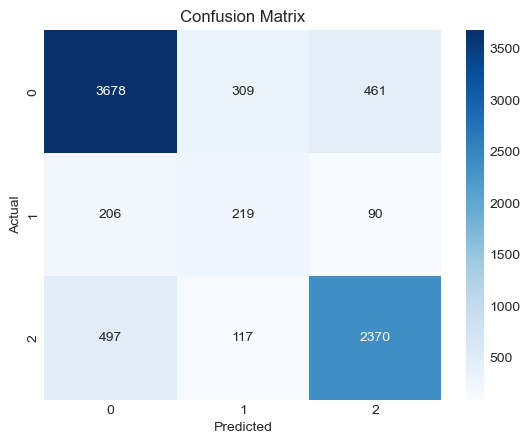

In [154]:
# Check confusion matrix
smote_matrix2 = confusion_matrix(y_test, y_pred)
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(smote_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [155]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      4448
           1       0.34      0.43      0.38       515
           2       0.81      0.79      0.80      2984

    accuracy                           0.79      7947
   macro avg       0.66      0.68      0.67      7947
weighted avg       0.80      0.79      0.79      7947



#### XGBOOST WITH SMOTE

In [156]:
# Instantiate model
smote_xgb = XGBClassifier(
    objective="multi:softmax",  
    num_class=len(np.unique(y_train_res)), 
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="mlogloss"     
)

# Fit
smote_xgb.fit(x_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1, num_class=3, ...)

In [157]:
# Predict
y_pred = smote_xgb.predict(x_test)

# Evaluate model
train_score = smote_xgb.score(x_train_res, y_train_res) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"Training Accuracy: {train_score:.2f}%")
print(f"Test Accuracy:     {test_score:.2f}%")

Training Accuracy: 86.98%
Test Accuracy:     75.93%


Decision Tree - Confusion Matrix:
 [[3472  531  445]
 [ 156  293   66]
 [ 512  203 2269]]


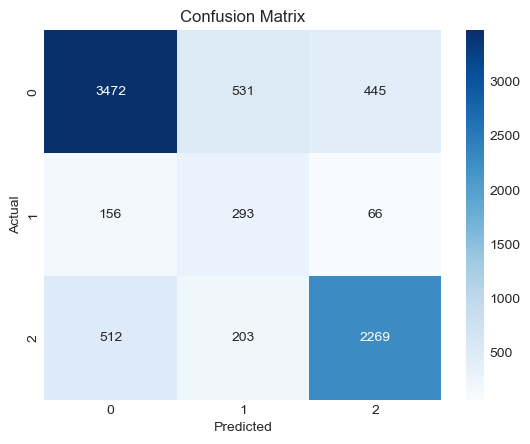

In [158]:
# Check confusion matrix
smote_matrix3 = confusion_matrix(y_test, y_pred)
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(smote_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [159]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      4448
           1       0.29      0.57      0.38       515
           2       0.82      0.76      0.79      2984

    accuracy                           0.76      7947
   macro avg       0.65      0.70      0.66      7947
weighted avg       0.79      0.76      0.77      7947



#### KNN WITH SMOTE

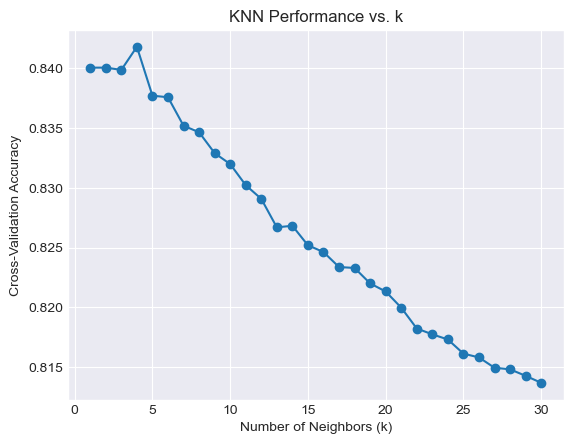

In [160]:
# Find the optimal neighbor to use
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", n_jobs=-1)
    scores = cross_val_score(knn, x_train_res, y_train_res, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Performance vs. k")
plt.show()

In [161]:
# Instantiate model
smote_knn = KNeighborsClassifier(n_neighbors=4, weights="distance", n_jobs=-1)

# Fit
smote_knn.fit(x_train_res, y_train_res)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [162]:
# Predict
y_pred = smote_knn.predict(x_test)

# Evaluate model
train_score = smote_knn.score(x_train_res, y_train_res) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"Training Accuracy: {train_score:.2f}%")
print(f"Test Accuracy:     {test_score:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     74.18%


Decision Tree - Confusion Matrix:
 [[3405  416  627]
 [ 191  226   98]
 [ 552  168 2264]]


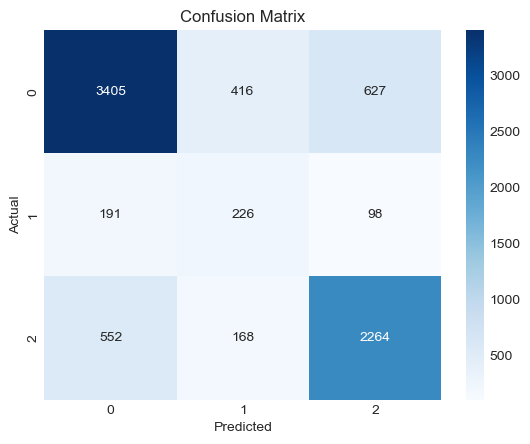

In [163]:
# Check confusion matrix
smote_matrix4 = confusion_matrix(y_test, y_pred)
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(smote_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [164]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      4448
           1       0.28      0.44      0.34       515
           2       0.76      0.76      0.76      2984

    accuracy                           0.74      7947
   macro avg       0.62      0.65      0.63      7947
weighted avg       0.76      0.74      0.75      7947



### HYPERPARAMETER TUNING

#### DECISION TREE WITH GRIDSEARCHCV

In [211]:
# Hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 7, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.005, 0.01, 0.05]
}

# Grid search
grid_dt = GridSearchCV(
    estimator=smote_dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_dt.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [5, 7, 10, 20]},
             scoring='accuracy', verbose=1)

In [213]:
print("Best Params:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)

Best Params: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score: 0.7971077314088953


In [214]:
# Recreate the model with the best parameters
dt_grid = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)

# Train the model
dt_grid.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [215]:
# Evaluate on test set
y_pred = dt_grid.predict(x_test)

train_score = grid_dt.score(x_train_res, y_train_res) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"Training Accuracy: {train_score:.2f}%")
print(f"Test Accuracy:     {test_score:.2f}%")

Training Accuracy: 91.34%
Test Accuracy:     73.00%


Decision Tree - Confusion Matrix:
 [[3430  369  649]
 [ 217  197  101]
 [ 563  169 2252]]


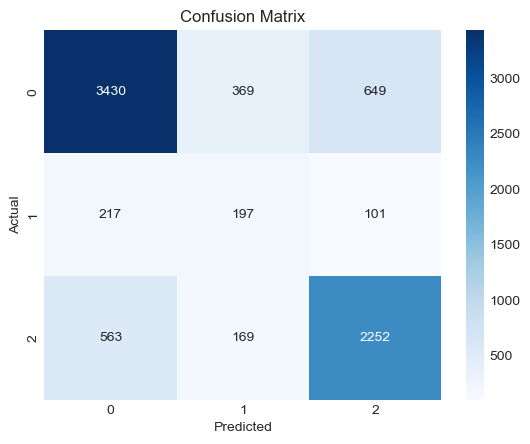

In [169]:
# Check confusion matrix
grid_matrix1 = confusion_matrix(y_test, y_pred)
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualise the confusion matrix
sns.heatmap(grid_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [170]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      4448
           1       0.27      0.38      0.32       515
           2       0.75      0.75      0.75      2984

    accuracy                           0.74      7947
   macro avg       0.61      0.64      0.62      7947
weighted avg       0.76      0.74      0.75      7947



#### RANDOM FOREST WITH GRIDSEARCH

In [171]:
# Gridsearch CV
# Parameters
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, None],
              "min_samples_split":[2, 5, 8, 10]
             }

#Instantiate gridsearch
grid_search = GridSearchCV(estimator=smote_rf, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='accuracy')

In [172]:
# Get the best parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

In [173]:
# Recreate the model with the best parameters
rf1 = RandomForestClassifier(criterion="gini", max_depth=None, min_samples_split=2)

# Train the model
rf1.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [174]:
# Check training score
train_accuracy = rf1.score(x_train_res, y_train_res) * 100

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display neatly
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 100.00%
Test Accuracy:     73.98%


In [175]:
# Predict
y_pred = rf1.predict(x_test)
result = {'Actual': y_test, 'Predicted': y_pred}
pd.DataFrame(result)[:7]

,Actual,Predicted
0,2,0
1,2,2
2,2,2
3,0,0
4,0,0
5,0,0
6,2,0


[[3694  303  451]
 [ 207  225   83]
 [ 498  119 2367]]


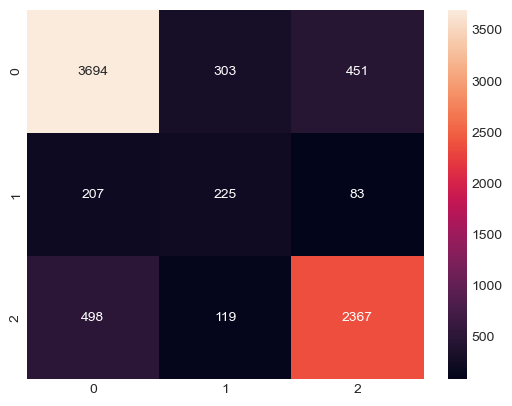

In [176]:
# Check confusion matrix
conf1 = confusion_matrix(y_test, y_pred)
print(conf1)

# Visualise it
sns.heatmap(conf1, annot=True, fmt=".0f");

In [177]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      4448
           1       0.35      0.44      0.39       515
           2       0.82      0.79      0.80      2984

    accuracy                           0.79      7947
   macro avg       0.67      0.69      0.68      7947
weighted avg       0.80      0.79      0.79      7947



#### RANDOM SEARCH CV

#### RANDOM FOREST WITH RANDOMSEARCHCV

In [178]:
# Parameter dictionary
param_dist = {"criterion": ["gini", "entropy"],
              "max_depth": randint(1, 10),  
              "min_samples_split":randint(2,20)
             }
# Instantiate the random search on using smote variables as estimator
random_search = RandomizedSearchCV(estimator=smote_rf, param_distributions=param_dist,\
                                  n_iter=10, cv=5, scoring="accuracy", random_state=42)

random_search.fit(x_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000234A1473620>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000234A454D450>},
                   random_state=42, scoring='accuracy')

In [179]:
# Check best params
random_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 5}

In [180]:
# Recreate the model# assume we got the below result
rf2 = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=5)

#train the model
rf2.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=8, min_samples_split=5)

In [181]:
# Check training score
train_accuracy = rf2.score(x_train_res, y_train_res) * 100

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 70.73%
Test Accuracy:     79.10%


In [182]:
# Predict
y_pred = rf2.predict(x_test)
result = {'Actual': y_test, 'Predicted': y_pred}
pd.DataFrame(result)[:7]

,Actual,Predicted
0,2,0
1,2,2
2,2,1
3,0,0
4,0,0
5,0,1
6,2,2


[[3195  744  509]
 [ 127  323   65]
 [ 685  416 1883]]


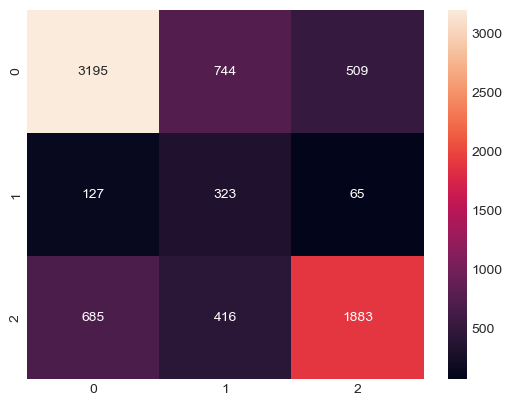

In [183]:
# Check confusion matrix
conf2 = confusion_matrix(y_test, y_pred)
print(conf2)

# Visualise it
sns.heatmap(conf2, annot=True, fmt=".0f");

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      4448
           1       0.22      0.63      0.32       515
           2       0.77      0.63      0.69      2984

    accuracy                           0.68      7947
   macro avg       0.59      0.66      0.59      7947
weighted avg       0.75      0.68      0.70      7947



In [ ]:
# Parameter dictionary
param_dist = {"criterion": ["gini", "entropy"],
              "max_depth": randint(1, 10),  
              "min_samples_split":randint(2,20)
             }
# Instantiate the random search on using weighted class variables as estimator
random_search = RandomizedSearchCV(estimator=Weighted_RF, param_distributions=param_dist,\
                                  n_iter=10, cv=5, scoring="accuracy", random_state=42)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000234B07BAE90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000234A149BCE0>},
                   random_state=42, scoring='accuracy')

In [186]:
# Check best params
random_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 5}

In [187]:
# Recreate the model
rf3 = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=5)

# Train the model
rf3.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=8, min_samples_split=5)

In [188]:
# Predict
y_pred = rf3.predict(x_test)

# Check training score
train_accuracy = rf3.score(x_train_res, y_train_res) * 100

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 70.38%
Test Accuracy:     67.66%


[[3148  758  542]
 [ 129  316   70]
 [ 639  432 1913]]


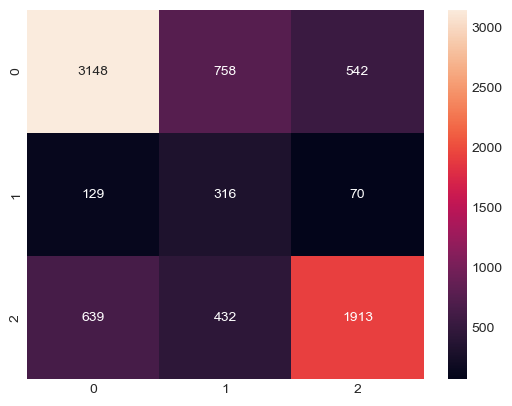

In [189]:
# Check confusion matrix
conf3 = confusion_matrix(y_test, y_pred)
print(conf3)

# Visualise it
sns.heatmap(conf3, annot=True, fmt=".0f");

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      4448
           1       0.21      0.61      0.31       515
           2       0.76      0.64      0.69      2984

    accuracy                           0.68      7947
   macro avg       0.59      0.65      0.59      7947
weighted avg       0.75      0.68      0.70      7947



#### XGBOOST WITH RANDOMSEARCHCV ON SMOTE

In [ ]:
# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized search
rand_search = RandomizedSearchCV(
    estimator=smote_xgb,
    param_distributions=param_dist,
    n_iter=50,         
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
rand_search.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           n_estimators=None, n_jobs=-1,
                                           num_class=3, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [192]:
# Best parameters and score
print("Best Params:", rand_search.best_params_)
print("Best CV Score:", rand_search.best_score_)

Best Params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best CV Score: 0.8710592562461084


In [193]:
# Recreate model
xgb_random = XGBClassifier(**rand_search.best_params_, 
                          objective='multi:softmax',
                          num_class=3,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='mlogloss')

xgb_random.fit(x_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=3, ...)

In [194]:
# Predict on test set
y_pred = xgb_random.predict(x_test)

# Check training score
train_accuracy = xgb_random.score(x_train_res, y_train_res) * 100

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 98.42%
Test Accuracy:     79.73%


[[3148  758  542]
 [ 129  316   70]
 [ 639  432 1913]]


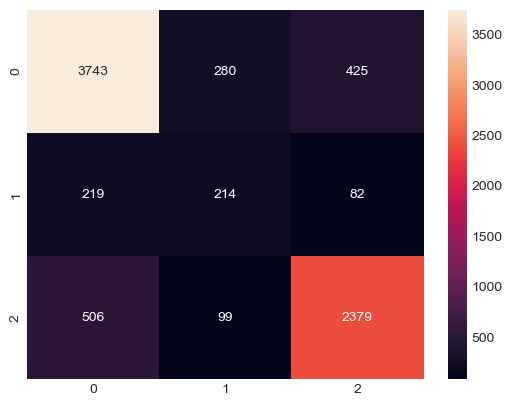

In [195]:
# Check confusion matrix
conf4 = confusion_matrix(y_test, y_pred)
print(conf3)

# Visualise it
sns.heatmap(conf4, annot=True, fmt=".0f");

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4448
           1       0.36      0.42      0.39       515
           2       0.82      0.80      0.81      2984

    accuracy                           0.80      7947
   macro avg       0.67      0.68      0.68      7947
weighted avg       0.80      0.80      0.80      7947



#### XGBOOST WITH RANDOMSEARCHCV ON WEIGHTED CLASS

In [197]:
# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized search
xgboost_rand = RandomizedSearchCV(
    estimator=Weighted_XGB,
    param_distributions=param_dist,
    n_iter=50,         
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
xgboost_rand.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=-1,
                                           num_class=3, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [198]:
# Best parameters and score
print("Best Params:", xgboost_rand.best_params_)
print("Best CV Score:", xgboost_rand.best_score_)

Best Params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best CV Score: 0.8124901683183893


In [199]:
# Recreate model
xgb_random = XGBClassifier(**xgboost_rand.best_params_, 
                          objective='multi:softmax',
                          num_class=3,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='mlogloss')

xgb_random.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=3, ...)

In [200]:
# Predict on test set
y_pred = xgboost_rand.predict(x_test)

# Check training score
train_accuracy = xgboost_rand.score(x_train_res, y_train_res) * 100

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy:     {test_accuracy:.2f}%")

Training Accuracy: 72.27%
Test Accuracy:     81.58%


[[3148  758  542]
 [ 129  316   70]
 [ 639  432 1913]]


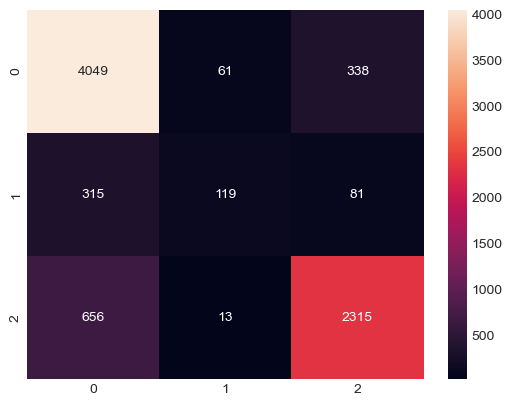

In [201]:
# Check confusion matrix
confm = confusion_matrix(y_test, y_pred)
print(conf3)

# Visualise it
sns.heatmap(confm, annot=True, fmt=".0f");

In [202]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      4448
           1       0.62      0.23      0.34       515
           2       0.85      0.78      0.81      2984

    accuracy                           0.82      7947
   macro avg       0.76      0.64      0.67      7947
weighted avg       0.81      0.82      0.80      7947

